In [39]:
# check whether we connected to GPU or not
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [40]:
# check whether we connected to GPU or not
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
from os import listdir
from os.path import isfile, join
from skimage.color import rgb2gray
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2


Found GPU at: /device:GPU:0


# Downloading and reading the data

In [41]:
!wget http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
!uncompress BSR_bsds500.tgz
!tar -xvf BSR_bsds500.tar
!ls

--2018-05-18 13:56:40--  http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www.eecs.berkeley.edu (www.eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1, 2620:12a:8000::1
Connecting to www.eecs.berkeley.edu (www.eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz [following]
--2018-05-18 13:56:40--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.183
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70763455 (67M) [application/x-tar]
Saving to: ‘BSR_bsds500.tgz’

BSR_bsds500.tgz     100%[===================>]  67.48M  20.3MB/s    in 4.2s    

2018-05-18 13:56:45 (16.1 MB/s) - ‘B

BSR/BSDS500/data/images/val/123074.jpg
BSR/BSDS500/data/images/val/306005.jpg
BSR/BSDS500/data/images/val/19021.jpg
BSR/BSDS500/data/images/val/271035.jpg
BSR/BSDS500/data/images/val/12084.jpg
BSR/BSDS500/data/images/val/260058.jpg
BSR/BSDS500/data/images/val/361010.jpg
BSR/BSDS500/data/images/val/62096.jpg
BSR/BSDS500/data/images/val/3096.jpg
BSR/BSDS500/data/images/val/126007.jpg
BSR/BSDS500/data/images/val/130026.jpg
BSR/BSDS500/data/images/val/253027.jpg
BSR/BSDS500/data/images/val/376043.jpg
BSR/BSDS500/data/images/val/143090.jpg
BSR/BSDS500/data/images/val/170057.jpg
BSR/BSDS500/data/images/val/385039.jpg
BSR/BSDS500/data/images/val/159008.jpg
BSR/BSDS500/data/images/val/134035.jpg
BSR/BSDS500/data/images/val/216081.jpg
BSR/BSDS500/data/images/val/89072.jpg
BSR/BSDS500/data/images/val/220075.jpg
BSR/BSDS500/data/images/val/223061.jpg
BSR/BSDS500/data/images/val/148026.jpg
BSR/BSDS500/data/images/val/33039.jpg
BSR/BSDS500/data/images/val/147091.jpg
BSR/BSDS500/data/images/val/1670

In [42]:
!ls

BSR  BSR_bsds500.tar  BSR_bsds500.tgz  datalab


In [43]:
import numpy as np
from os import listdir
from os.path import isfile, join

# get all the images files and boundary file
img_dir = "BSR/BSDS500/data/images/train/"
boundary_dir = "BSR/BSDS500/data/groundTruth/train/"
img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f)) and f.endswith(".jpg")]
boundary_files = [f for f in listdir(boundary_dir) if isfile(join(boundary_dir, f)) and f.endswith(".mat")]

num = len(boundary_files)

print("image files")
sorted_img_files=sorted(img_files)
print(sorted_img_files)
print(len(img_files))
print("boundary files")
sorted_boundary_files=sorted(boundary_files)
print(sorted_boundary_files)
print(len(boundary_files))

image files
['100075.jpg', '100080.jpg', '100098.jpg', '103041.jpg', '104022.jpg', '105019.jpg', '105053.jpg', '106020.jpg', '106025.jpg', '108041.jpg', '108073.jpg', '109034.jpg', '112082.jpg', '113009.jpg', '113016.jpg', '113044.jpg', '117054.jpg', '118020.jpg', '118035.jpg', '12003.jpg', '12074.jpg', '122048.jpg', '124084.jpg', '126039.jpg', '130034.jpg', '134008.jpg', '134052.jpg', '135037.jpg', '135069.jpg', '138032.jpg', '138078.jpg', '140055.jpg', '140075.jpg', '144067.jpg', '145014.jpg', '145053.jpg', '147021.jpg', '147062.jpg', '15004.jpg', '15088.jpg', '151087.jpg', '153077.jpg', '153093.jpg', '155060.jpg', '156079.jpg', '157036.jpg', '159029.jpg', '159045.jpg', '159091.jpg', '16052.jpg', '161062.jpg', '163014.jpg', '163062.jpg', '164074.jpg', '166081.jpg', '169012.jpg', '170054.jpg', '172032.jpg', '173036.jpg', '176019.jpg', '176035.jpg', '176039.jpg', '178054.jpg', '181018.jpg', '181079.jpg', '181091.jpg', '183055.jpg', '183087.jpg', '187003.jpg', '187029.jpg', '187039.jpg'

In [0]:
# get all the images files and boundary file
img_dir = "BSR/BSDS500/data/images/train/"
boundary_dir = "BSR/BSDS500/data/groundTruth/train/"
img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f)) and f.endswith(".jpg")]
boundary_files = [f for f in listdir(boundary_dir) if isfile(join(boundary_dir, f)) and f.endswith(".mat")]


Getting data from mat files:

In [0]:
def get_GT_images(sorted_boundary_files):
  images={}
  
  i=0

  for path in sorted_boundary_files:
    gTs_per_image={}
    path="BSR/BSDS500/data/groundTruth/train/"+path
    mat = scipy.io.loadmat(path)
    groundTruth = mat.get('groundTruth')
    label_num = groundTruth.size
    for M in range(label_num):
      segmentation = groundTruth[0][M]['Segmentation'][0][0]
      gTs_per_image[M]=segmentation
    images[i]=gTs_per_image
    i+=1
  return images

In [0]:

def get_GT_images_boundary(sorted_boundary_files):
  images={}
  
  i=0

  for path in sorted_boundary_files:
    gTs_per_image={}
    path="BSR/BSDS500/data/groundTruth/train/"+path
    mat = scipy.io.loadmat(path)
    groundTruth = mat.get('groundTruth')
    label_num = groundTruth.size
    for M in range(label_num):
      segmentation = groundTruth[0][M]['Boundaries'][0][0]
      gTs_per_image[M]=segmentation
    images[i]=gTs_per_image
    i+=1
  return images

In [0]:
images=get_GT_images(sorted_boundary_files)
boundaries=get_GT_images_boundary(sorted_boundary_files)

# Visualization


100075.mat


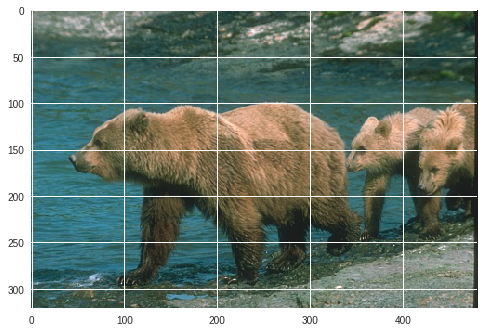

In [48]:

print(sorted_boundary_files[0])
x=img.imread("BSR/BSDS500/data/images/train/"+sorted_img_files[0])
plt.imshow(x)

100075.mat
photo and color segments:
boundaries of clusters:


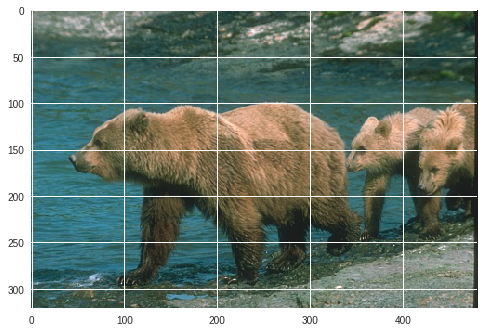

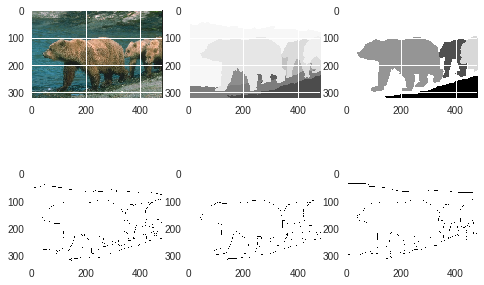

In [49]:
print(sorted_boundary_files[0])
x=img.imread("BSR/BSDS500/data/images/train/"+sorted_img_files[0])
plt.imshow(x)

f, axarr = plt.subplots(2,3)
print("photo and color segments:")
axarr[0,0].imshow(x)
axarr[0,1].imshow(images[0][0])
axarr[0,2].imshow(images[0][1])

print("boundaries of clusters:")
axarr[1,0].imshow(boundaries[0][0])
axarr[1,1].imshow(boundaries[0][1])
axarr[1,2].imshow(boundaries[0][2])


photo and color segments:
boundaries:


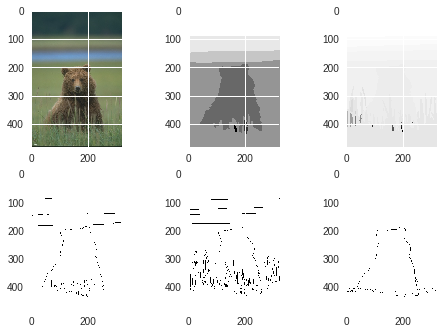

In [50]:

x=img.imread("BSR/BSDS500/data/images/train/"+sorted_img_files[1])

f, axarr = plt.subplots(2,3)
print("photo and color segments:")
axarr[0,0].imshow(x)
axarr[0,1].imshow(images[1][0])
axarr[0,2].imshow(images[1][1])

print("boundaries:")
axarr[1,0].imshow(boundaries[1][0])
axarr[1,1].imshow(boundaries[1][1])
axarr[1,2].imshow(boundaries[1][2])



In [0]:
def images_to_seg_colored(imgs,K):
  
  imgs_=[]
  for img in imgs:
    Z = img.reshape((-1,3))

    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    #print(label)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
   

    imgs_.append(res2)

  return imgs_
    


photo and color segments:


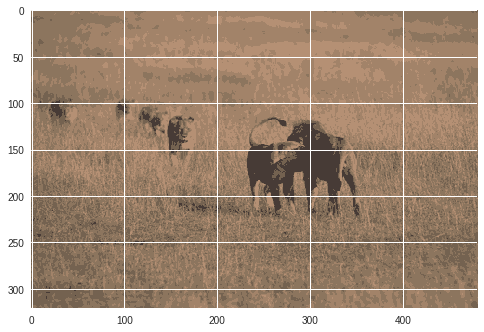

In [53]:
#K=5

image_matrix=img.imread("BSR/BSDS500/data/images/train/105019.jpg")
colored_seg_images=images_to_seg_colored([image_matrix],5)[0]


print("photo and color segments:")

plt.imshow(colored_seg_images)



# KMeans segmentation

In [0]:
def images_to_seg(imgs,K):
  
  imgs_gray=[]
  
  for img in imgs:
    Z = img.reshape((-1,3))

    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    #K = 8
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    #print(label)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
   
    #make images grayscale
    img_gray = rgb2gray(res2)

    '''
    plt.imshow(img_gray)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    '''
    imgs_gray.append(img_gray)

  return imgs_gray
    






# F-measure

\begin{bmatrix}
    *       & * & * & \dots &  \\
    \dots    & * &  & \dots & * \\
   * \\
    \dots      & * & * & \dots & *
\end{bmatrix}
\begin{bmatrix}
    $       &$ & \& & \dots &  \\
    \dots    & \# &  & \dots & $\\
   \& \\
    \dots      & \&& $& \dots & \#
\end{bmatrix}

Suppose that the first matrix is that for the image extracted using KMeans for certain number of clusters $K$. Also, say that the second matrix is the one that represents the ground truth segmentation image. Accordingly, to evaluate clustering efficiency, we follow these steps:


1.   If "$*$" were considered in same cluster in 1st matrix, **we keep track of their indices but in second matrix **
2.   After specifying the indices in 2nd matrix, we can now compute purity: for instance, in 2nd matrix, purity here is number of occurence of  "$\$$", as it represents the maximum frequent sample in cluster, divided by number of samples in cluster.
3.  For calculating recall, we divide the frequency of "$\$$" in our cluster by the frequency of "$\$$" in all clusters
4.  Now can compute the f-measure of this cluster $\displaystyle F_{i} = \left( \frac{2*\text{purity}_{i}*\text{recall}_{i}}{\text{purity}_{i}+\text{recall}_{i}} \right)$
5. The overall f-measure $F$ is average of sum of $F_{i}$ of each cluster



In [0]:
def f_measure(mat, seg, K, flag_seg):

    if flag_seg== True:
      img_KM = images_to_seg([mat], K)[0]
    else:
      img_KM = norm_cut_seg(mat, K)[0]

    purity = []
    recall = []
    Fi = []

    for i in range(len(np.unique(img_KM))):
      
        pos = np.where(img_KM == np.unique(img_KM)[i])
        relv_samp = [seg[i, j] for (i, j) in zip(pos[0], pos[1])]
        
        (unique_elements, counts_elements) = np.unique(relv_samp,
                return_counts=True)
        
        purity.append(np.amax(counts_elements) / len(relv_samp))
        
        (unique_elements1, counts_elements1) = np.unique(seg,
                return_counts=True)
        
        index = np.where(unique_elements1
                         == unique_elements[np.argmax(counts_elements)])
        
        recall.append(np.amax(counts_elements)
                      / counts_elements1[index[0][0]])
        
    for (j, k) in zip(purity, recall):
        Fi.append(2 * j * k / (j + k))
    F_total = np.sum(Fi) / len(Fi)
    print ('f-measure:', F_total)



In [25]:
'''Loop on every image and do f-measure for it with each of its ground truths for every K'''
i=0
K_number_=[3,5,7,9,11]


for image_name in sorted_img_files:
  path="BSR/BSDS500/data/images/train/"+image_name
  #the real image that you want:
  image_matrix=img.imread(path)
  
  print("For image number ",i)
  for j in range(len(images[i])):
    print("For segmentation number ",j)
    for k in K_number_: 
      print("For K == ",k)
      groundTruth=images[i][j]
      f_measure(image_matrix,groundTruth,k,True)
   
  i+=1

For image number  0
For segmentation number  0
For K ==  5
f-measure: 0.39392547461548866
For segmentation number  1
For K ==  5
f-measure: 0.371604714052863
For segmentation number  2
For K ==  5
f-measure: 0.3926421889360304
For segmentation number  3
For K ==  5
f-measure: 0.4302569066085892
For segmentation number  4
For K ==  5
f-measure: 0.3941043231360298
For segmentation number  5
For K ==  5
f-measure: 0.4030290494907332
For image number  1
For segmentation number  0
For K ==  5
f-measure: 0.6722186434213242
For segmentation number  1
For K ==  5
f-measure: 0.6928345923418505
For segmentation number  2
For K ==  5
f-measure: 0.370486555306699
For segmentation number  3
For K ==  5
f-measure: 0.6355899693805294
For segmentation number  4
For K ==  5
f-measure: 0.6420094651938324
For image number  2
For segmentation number  0
For K ==  5
f-measure: 0.44950105885101455
For segmentation number  1
For K ==  5
f-measure: 0.44130586489850343
For segmentation number  2
For K ==  5
f-m

KeyboardInterrupt: ignored

#Conditional Entropy

for K =5
for image0
for seg0


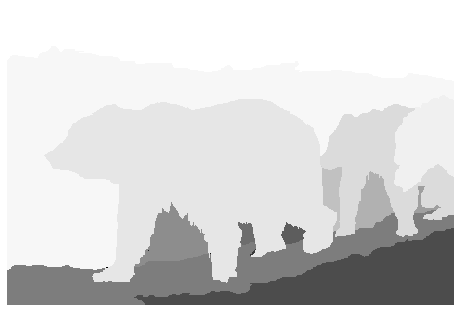

1.4305687177169877
for seg1


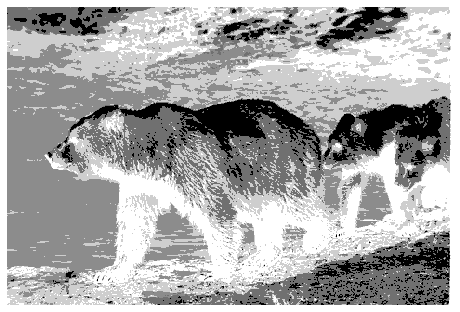

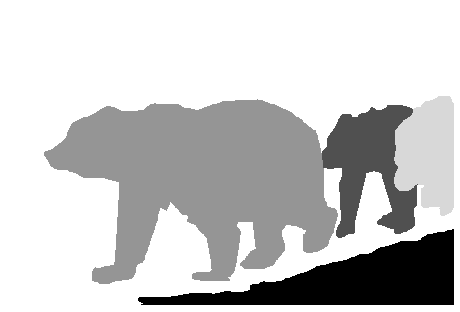

0.8684627895296808
for seg2


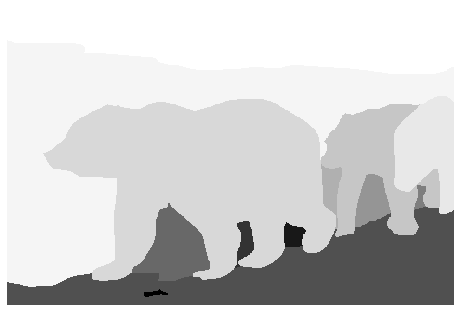

1.417150447804223
for seg3


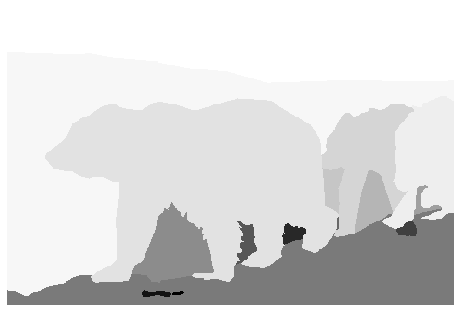

1.4110873448292631
for seg4


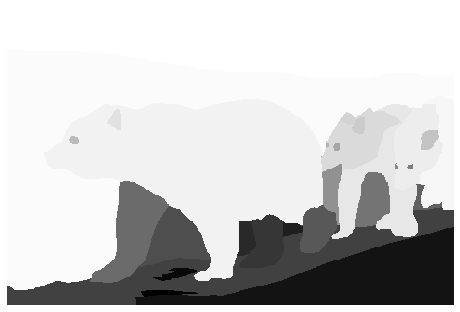

1.641921746636568
for seg5


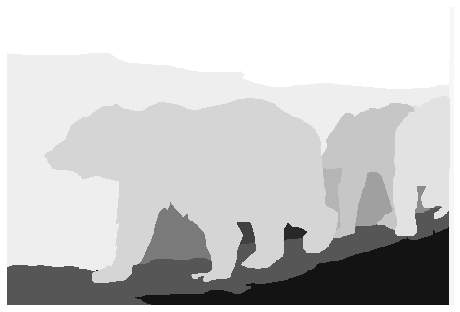

1.4462193996837083
averagee of image 0= 1.3692350743667383
for image1
for seg0


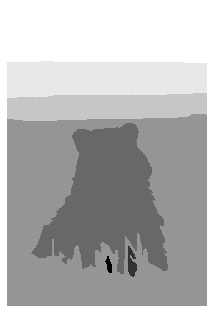

1.7392818943238262
for seg1


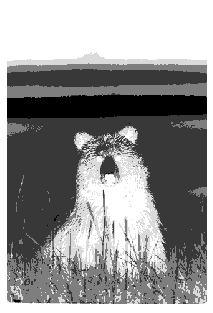

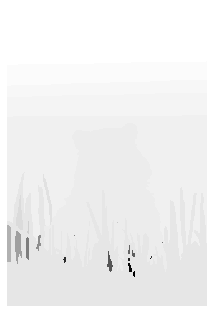

2.357962658244365
for seg2


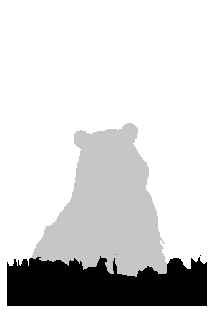

1.3908744874224679
for seg3


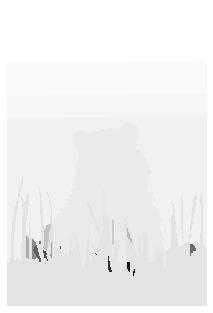

2.1160275517522553
for seg4


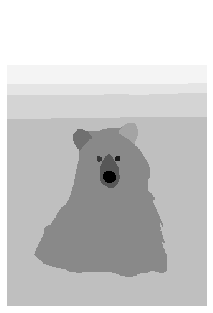

1.9483546718035352
averagee of image 1= 1.91050025270929
for image2
for seg0


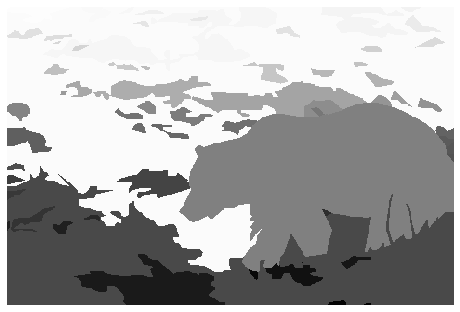

1.3365538207645342
for seg1


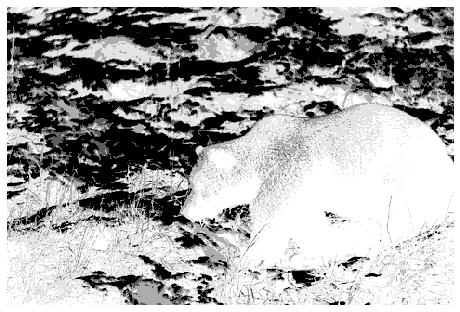

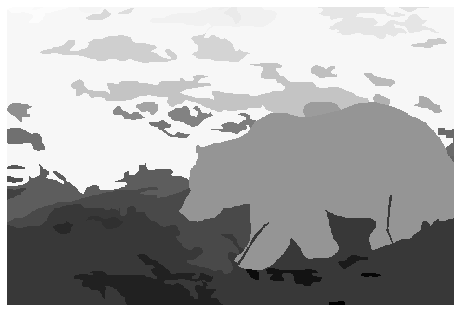

1.4462045222049356
for seg2


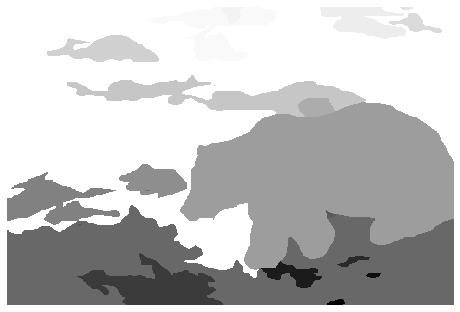

1.1816892713977438
for seg3


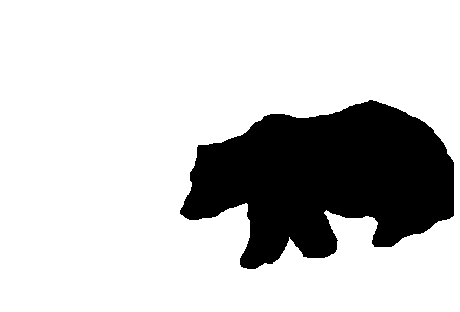

0.36442798086636735
for seg4


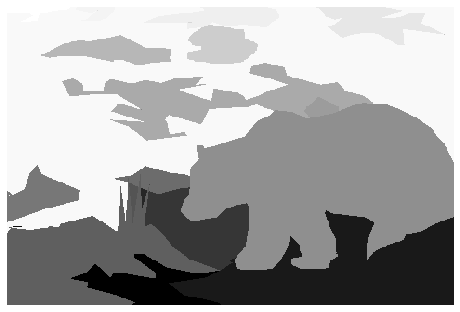

1.5167025827540965
averagee of image 2= 1.1691156355975356
for image3
for seg0


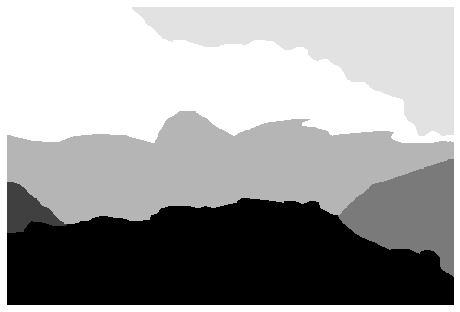

1.1545690230821648
for seg1


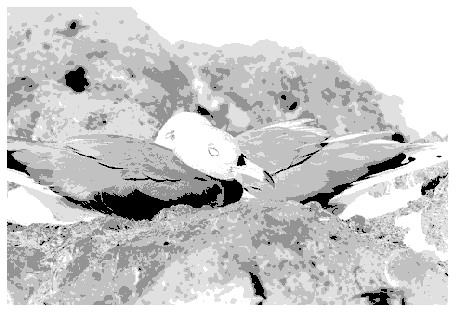

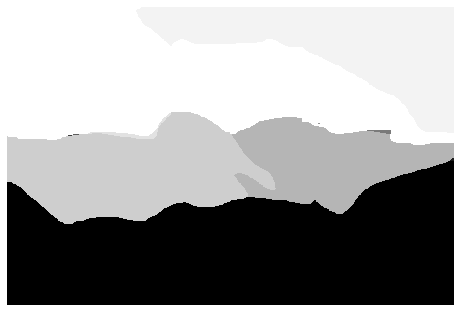

1.1637686222574044
for seg2


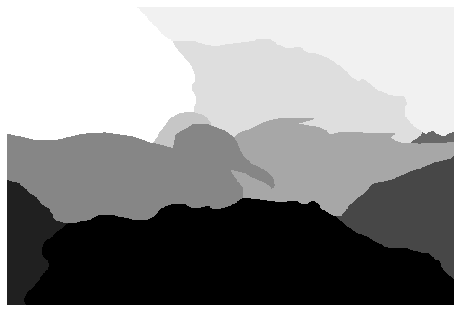

1.5646165481783787
for seg3


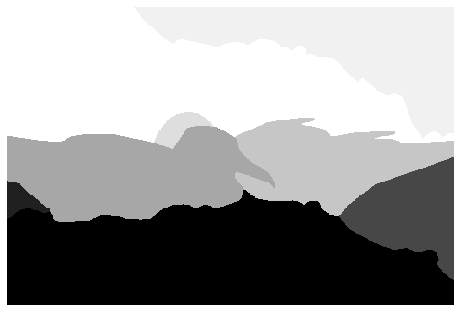

1.2978614610716264
for seg4


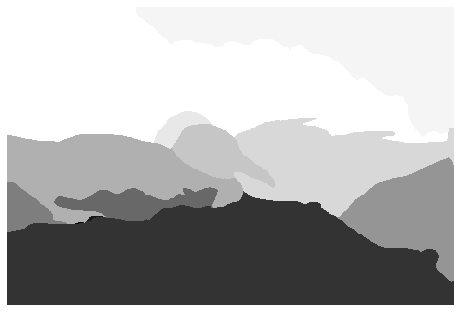

1.3693342923990894
for seg5


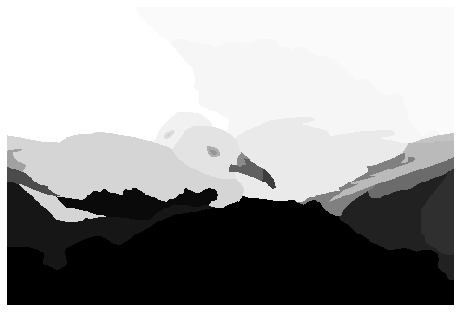

1.736344349039778
averagee of image 3= 1.381082382671407
for image4
for seg0


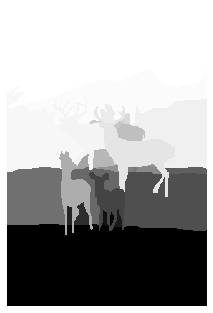

4.277687242275284
for seg1


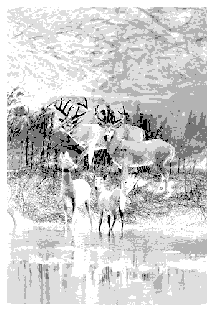

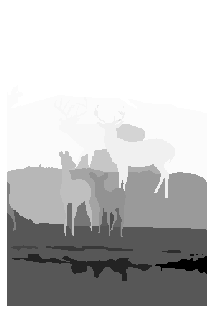

3.9944953551501396
for seg2


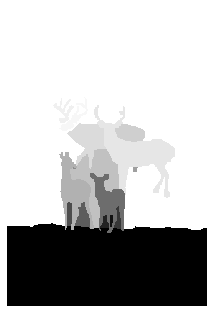

2.459284707103287
for seg3


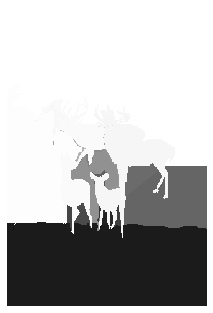

3.3858846307471073
for seg4


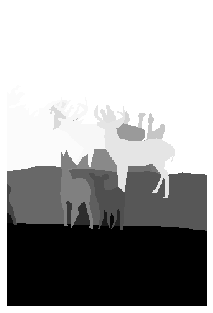

3.743460903689229
for seg5


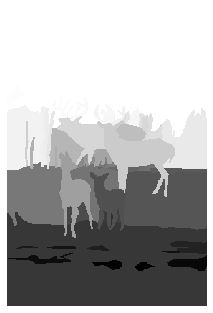

4.319424314132549
for seg6


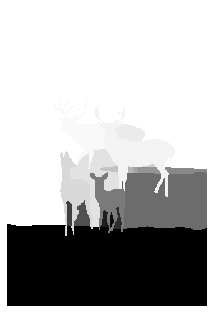

2.976068602484601
averagee of image 4= 3.593757965083171
for image5
for seg0


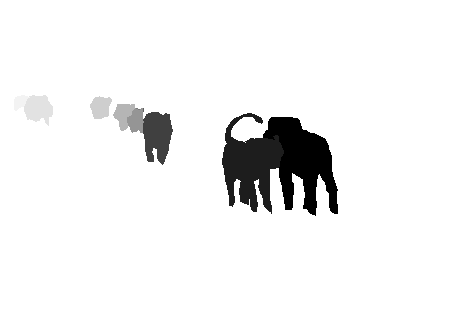

0.25712205599102655
for seg1


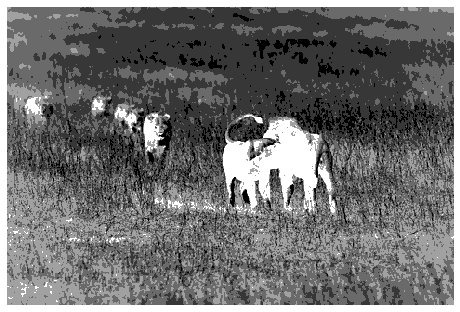

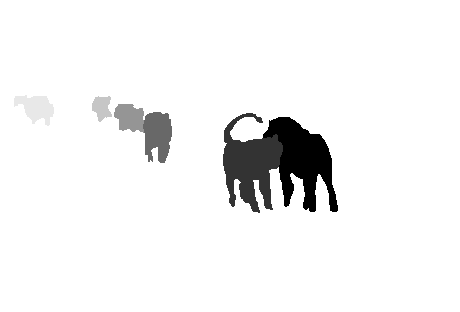

0.23732050891218612
for seg2


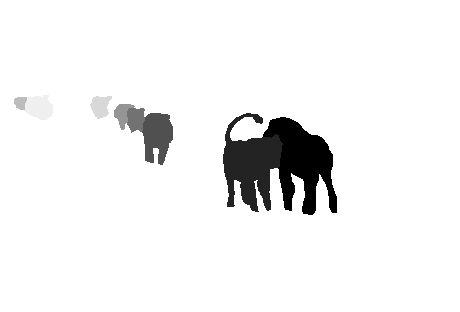

0.24609292766709115
for seg3


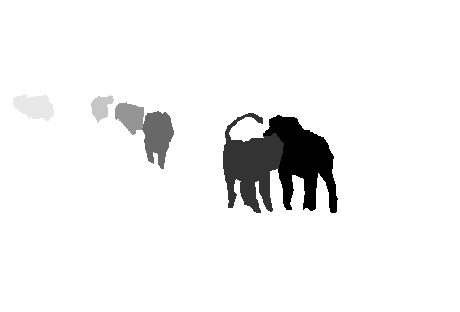

0.25192130839822585
for seg4


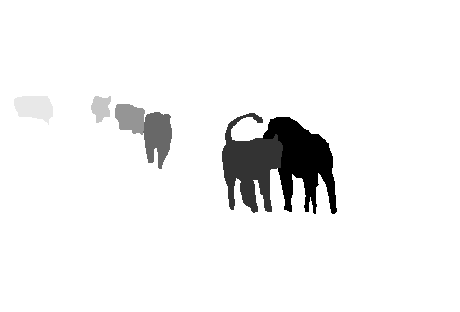

0.2507851508904494
for seg5


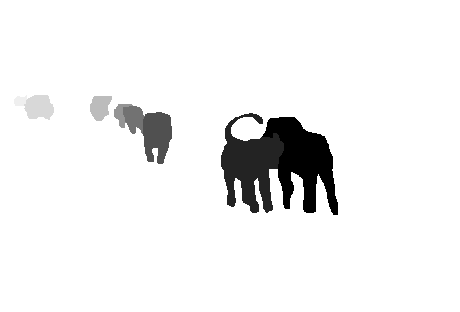

0.25849532166042627
averagee of image 5= 0.2502895455865675
for image6
for seg0


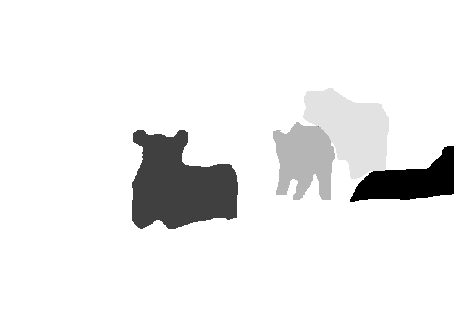

0.4438679349263433
for seg1


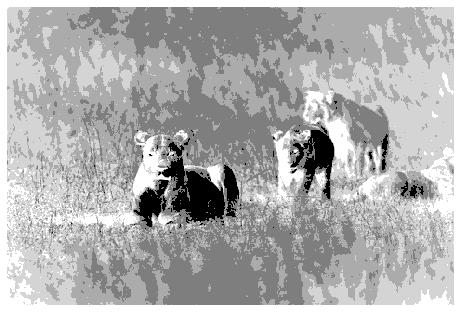

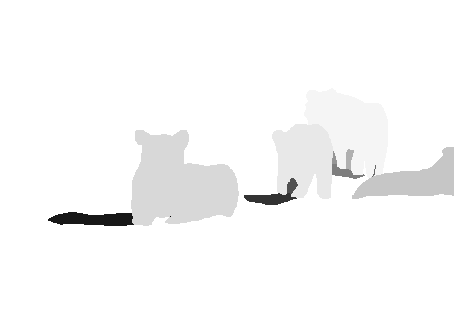

0.5032892542282623
for seg2


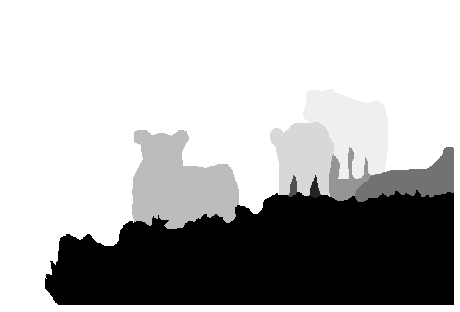

1.004242100839366
for seg3


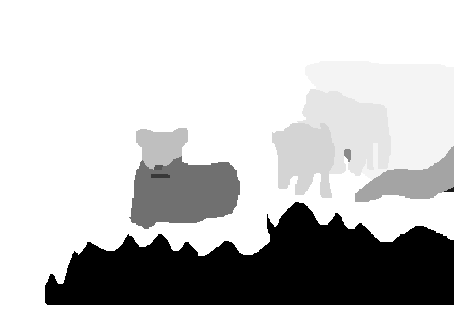

1.087231187578289
for seg4


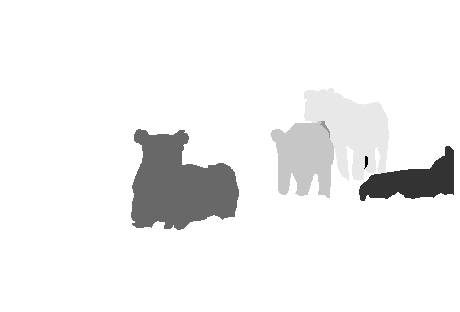

0.4372156159423489
averagee of image 6= 0.6951692187029218
for image7
for seg0


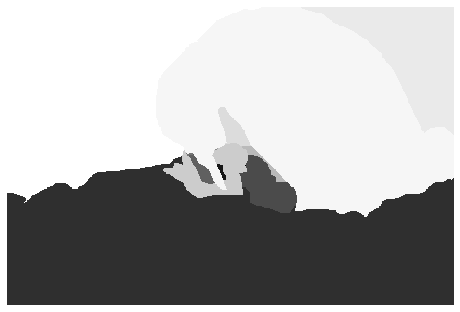

1.098441812097433
for seg1


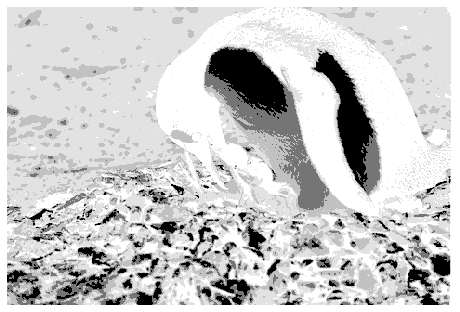

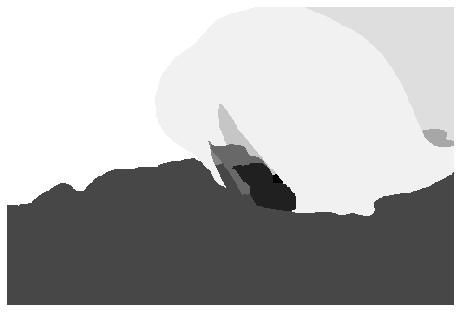

1.064578107700935
for seg2


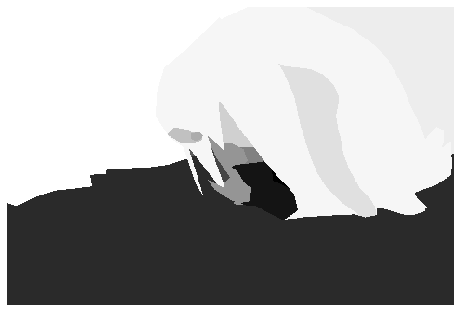

1.1968586215528578
for seg3


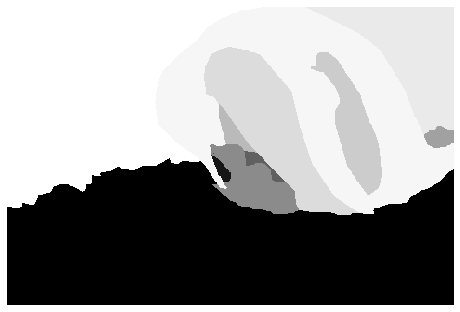

1.157889473681453
for seg4


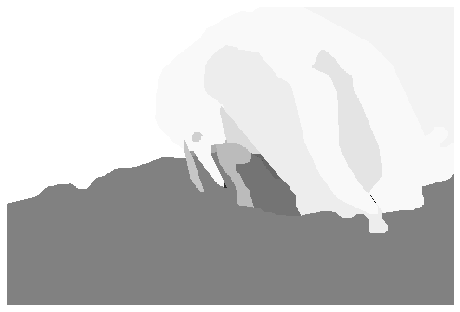

1.1735881349475237
averagee of image 7= 1.1382712299960407
for image8
for seg0


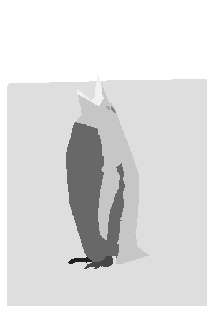

1.2249750129102566
for seg1


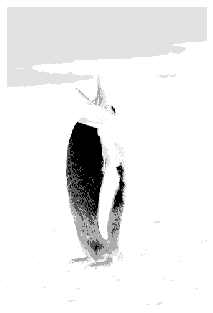

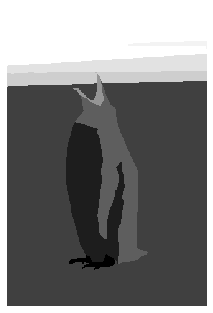

1.552510454704601
for seg2


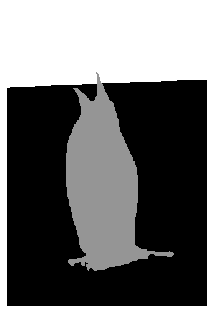

1.1090172339484263
for seg3


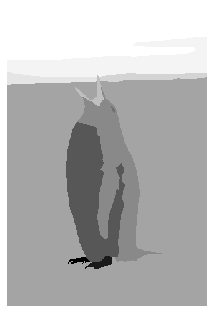

1.5088630624228998
for seg4


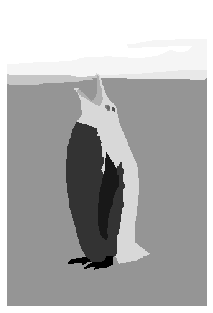

1.583461882889887
for seg5


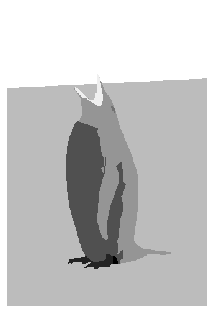

1.2296718208970823
averagee of image 8= 1.3680832446288589
for image9
for seg0


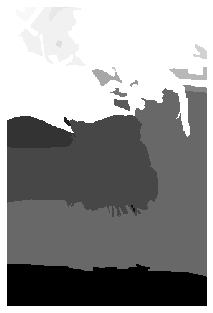

3.0823359478890433
for seg1


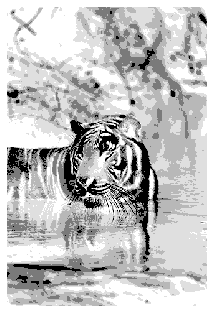

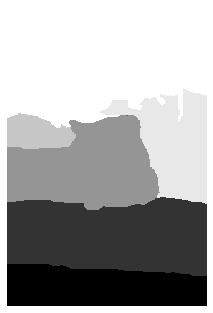

3.1801054422930912
for seg2


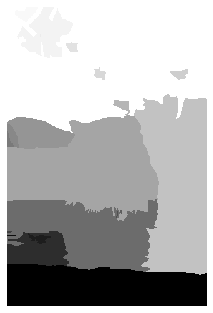

3.5476326100200586
for seg3


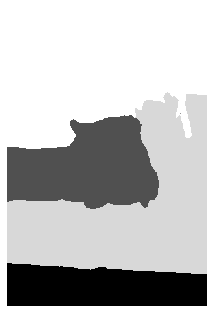

2.551614288778411
for seg4


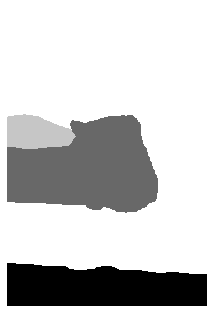

1.8158989158583831
averagee of image 9= 2.8355174409677972
for image10
for seg0


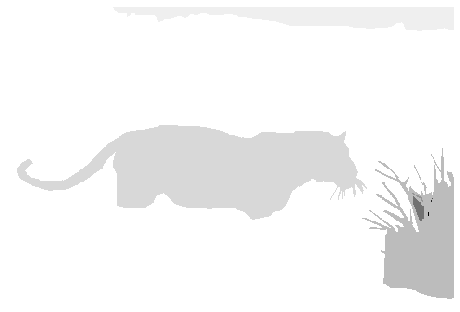

0.5300357295754188
for seg1


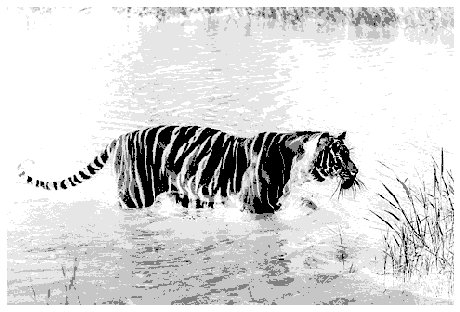

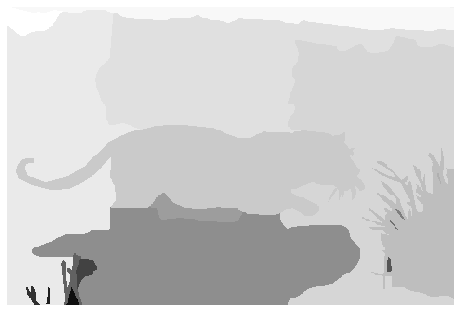

1.4476841889102765
for seg2


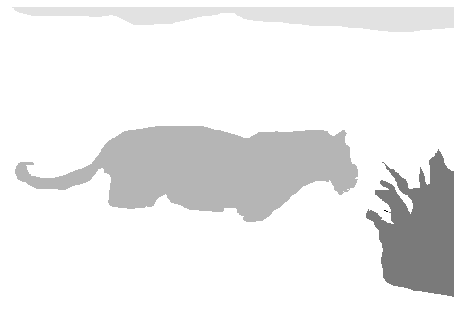

0.6164316049892445
for seg3


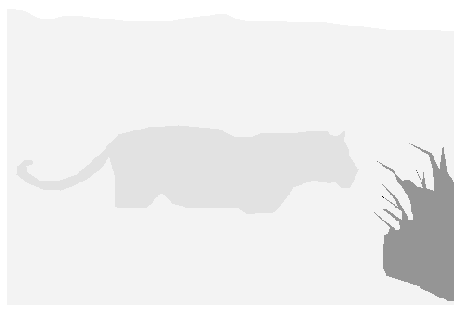

0.5616330524008935
for seg4


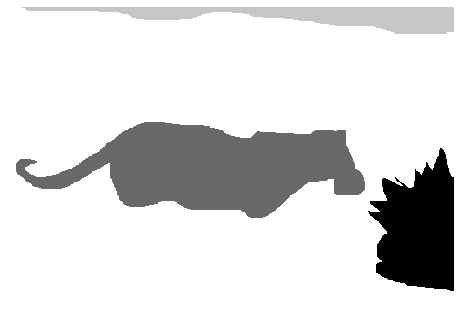

0.5947560222130062
averagee of image 10= 0.7501081196177679
for image11
for seg0


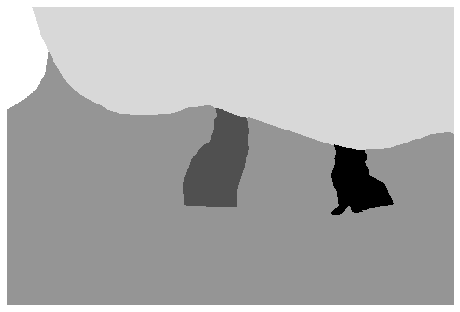

0.8495661693903953
for seg1


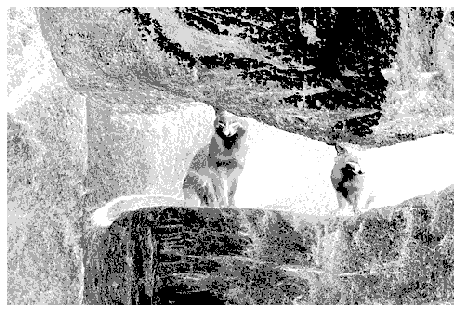

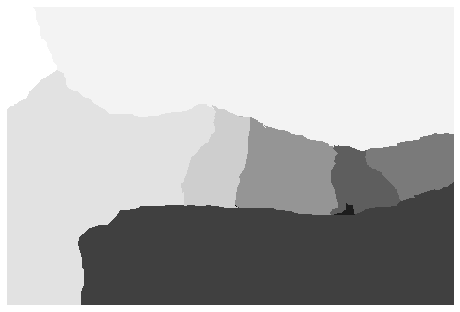

1.206721168724656
for seg2


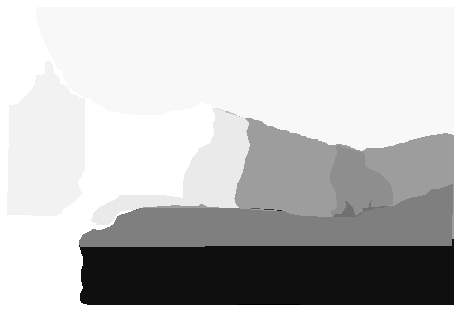

1.4294696455200504
for seg3


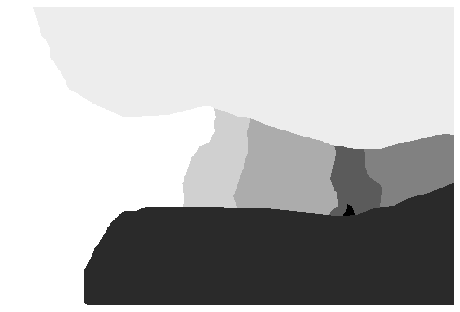

1.1411526685522502
for seg4


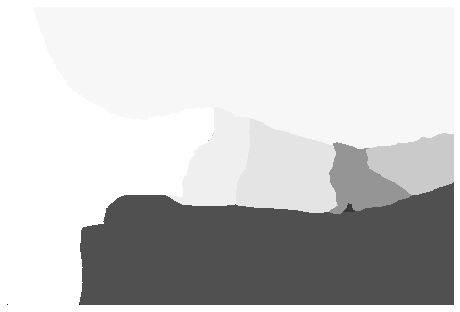

1.162545588005293
averagee of image 11= 1.157891048038529
for image12
for seg0


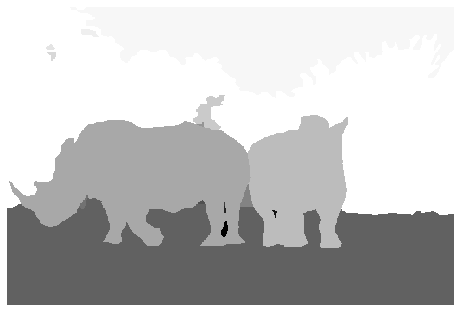

0.947513761594162
for seg1


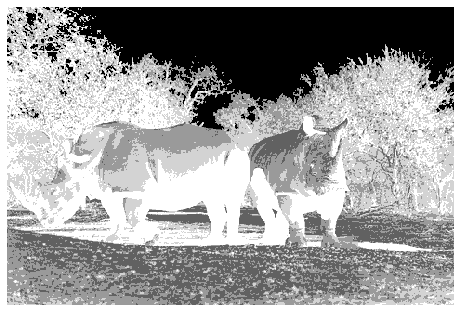

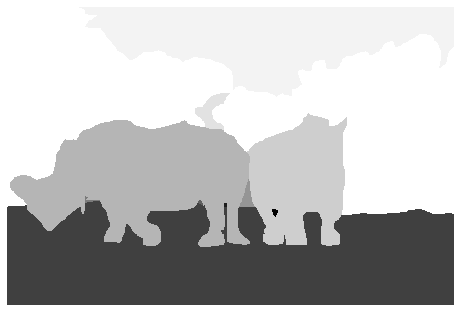

0.9445408398175386
for seg2


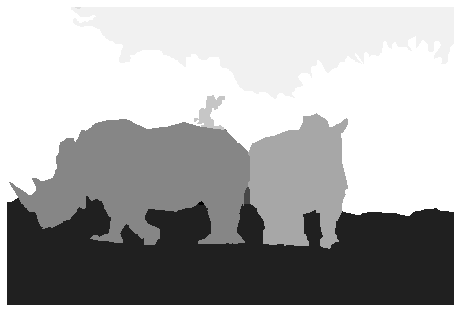

0.9272196736161376
for seg3


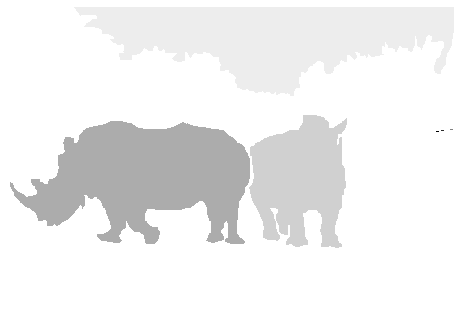

0.632910517458944
for seg4


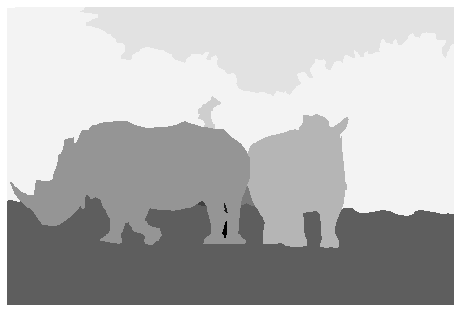

0.9382888509896398
averagee of image 12= 0.8780947286952843
for image13
for seg0


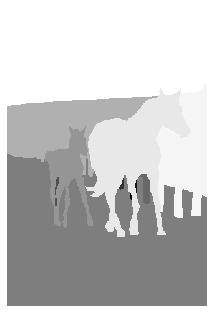

2.4578534297453625
for seg1


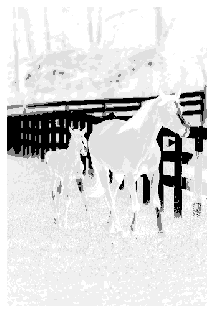

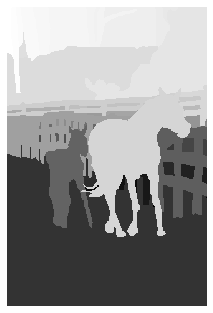

3.9575100537544468
for seg2


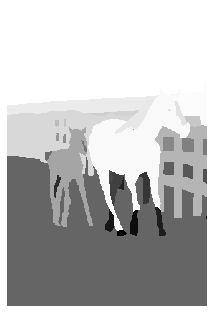

2.9137387023793884
for seg3


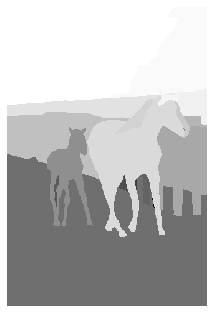

3.101070157207885
for seg4


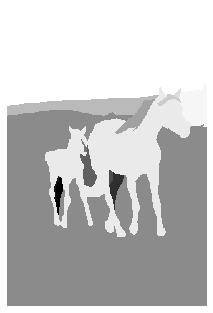

2.278324164942446
averagee of image 13= 2.941699301605906
for image14
for seg0


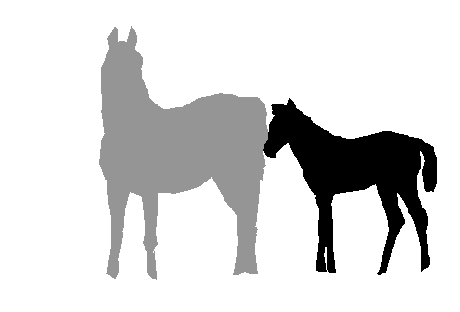

0.3926241127417641
for seg1


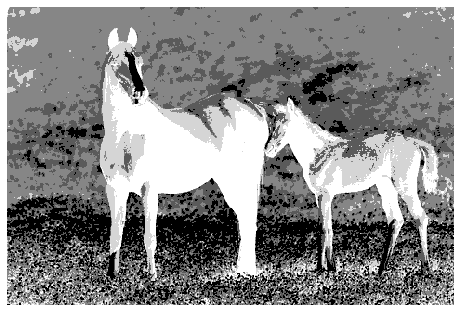

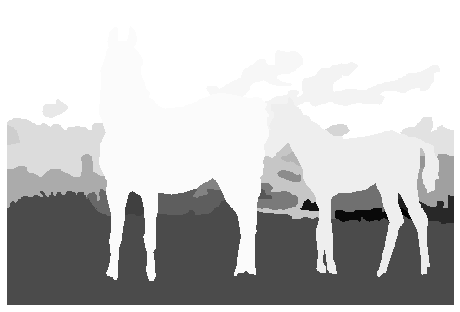

1.391668188783885
for seg2


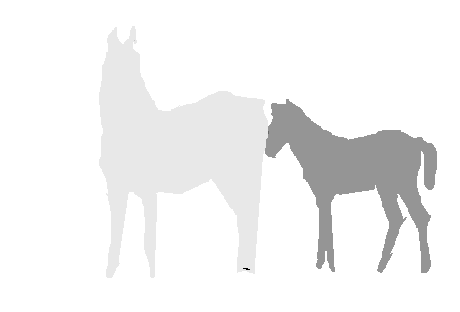

0.4006961514708256
for seg3


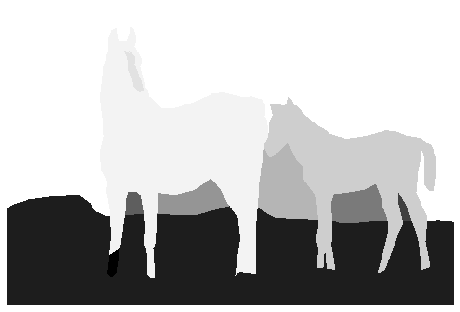

0.9730782294465585
for seg4


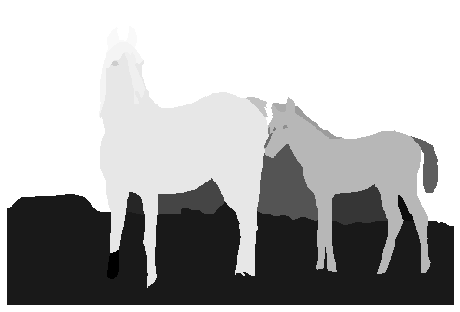

1.0387388209663624
for seg5


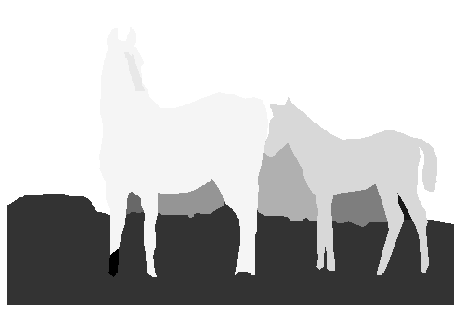

0.9727906465941397
averagee of image 14= 0.8615993583339225
for image15
for seg0


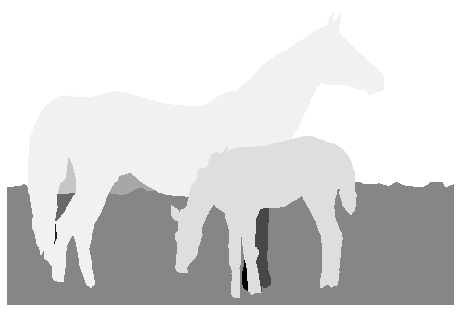

0.8095914317701982
for seg1


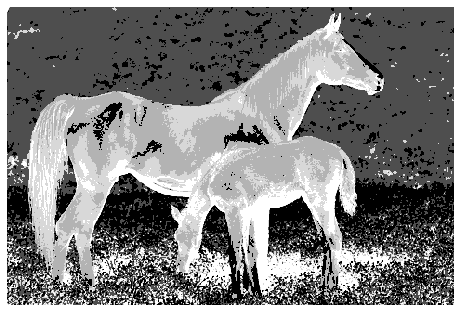

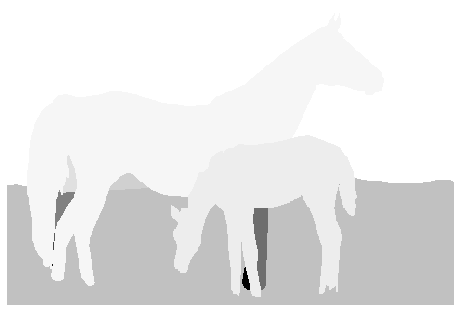

0.8160290332029128
for seg2


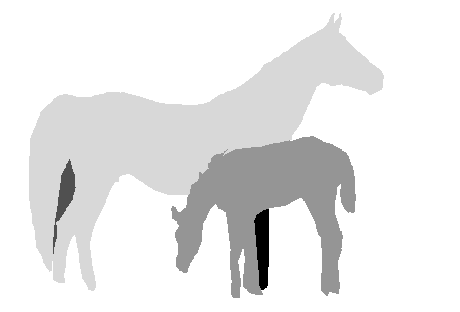

0.48417082158458713
for seg3


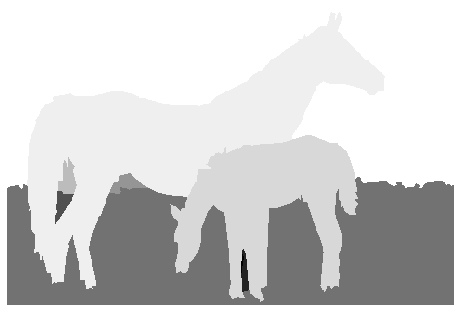

0.8032596317219312
for seg4


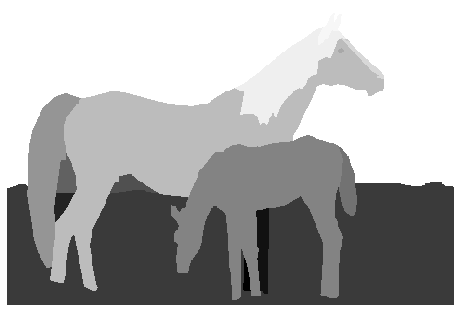

1.0256744888996716
for seg5


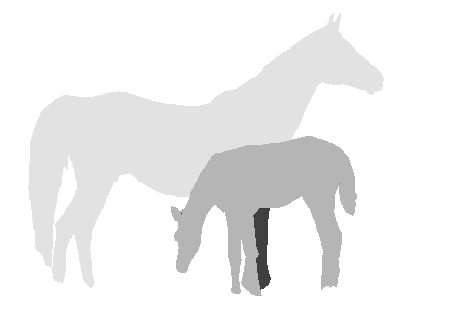

0.447671328373915
averagee of image 15= 0.7310661225922027
for image16
for seg0


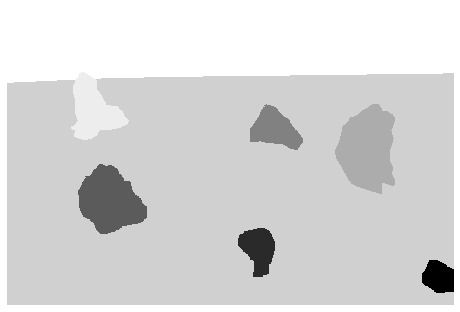

0.621646077505546
for seg1


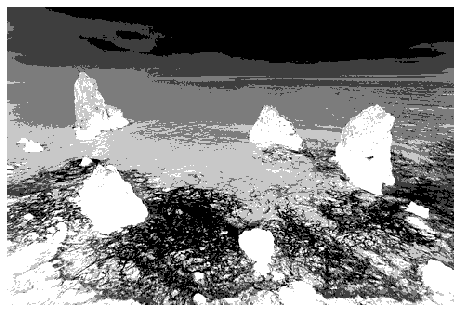

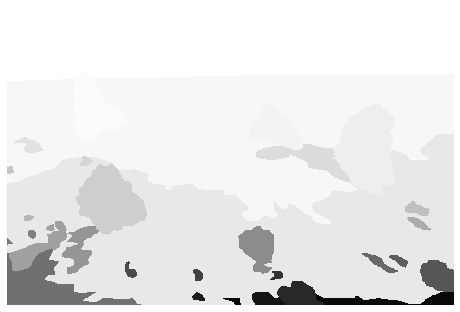

1.2212271476599459
for seg2


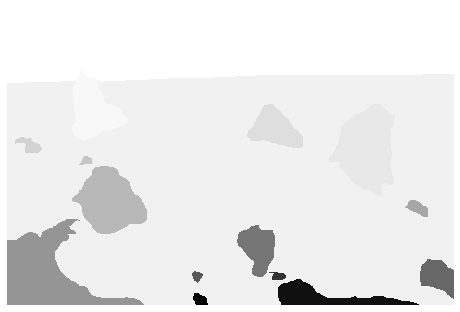

0.810609801535674
for seg3


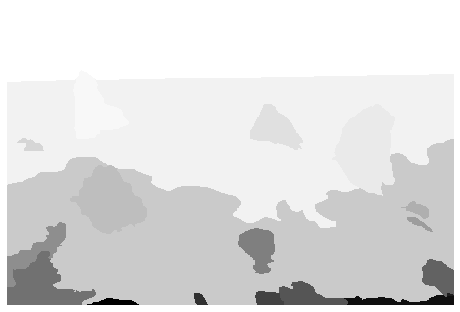

1.1161169471942665
for seg4


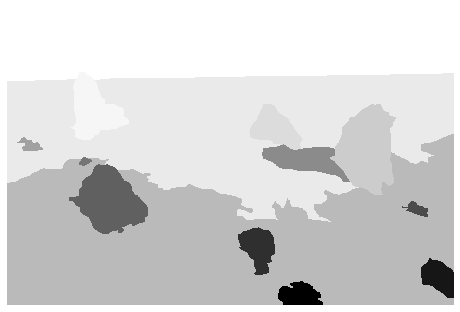

1.0536569230918718
for seg5


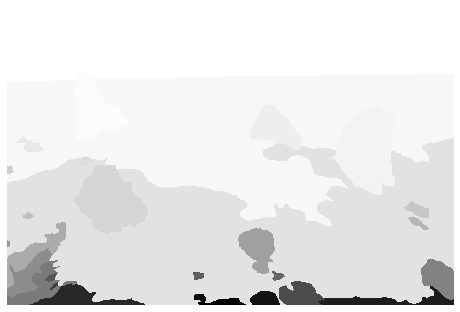

1.1530368899179675
averagee of image 16= 0.996048964484212
for image17
for seg0


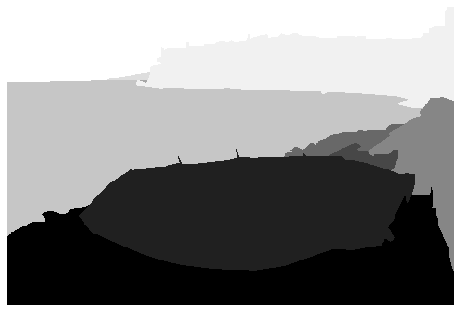

1.2844022463820124
for seg1


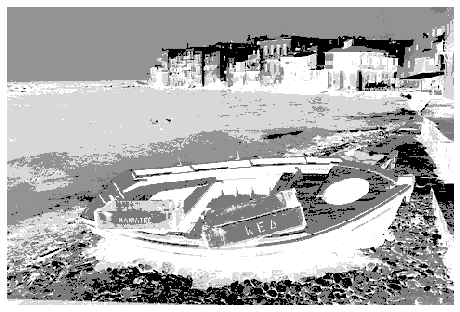

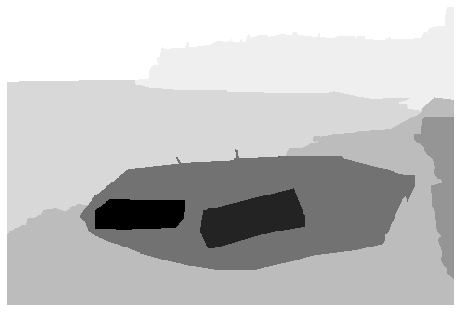

1.287324109951981
for seg2


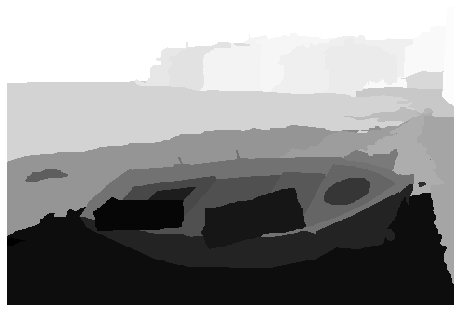

2.0076438231612745
for seg3


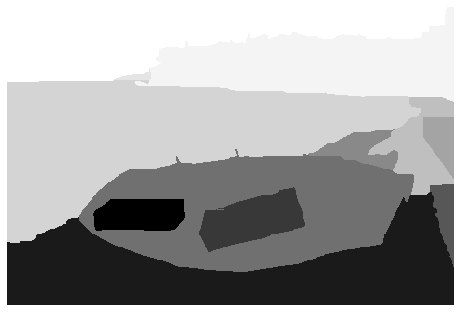

1.4141225068068062
for seg4


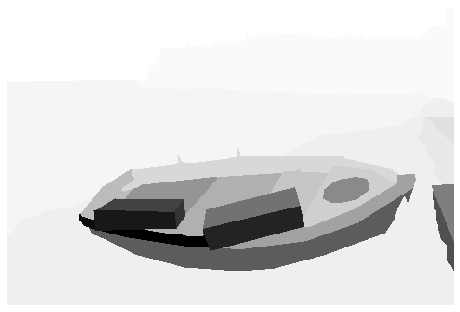

1.6272189570666131
for seg5


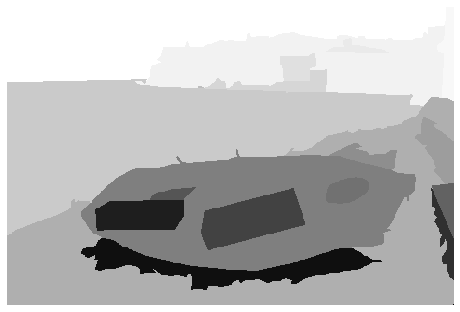

1.486954926301989
averagee of image 17= 1.5179444282784458
for image18
for seg0


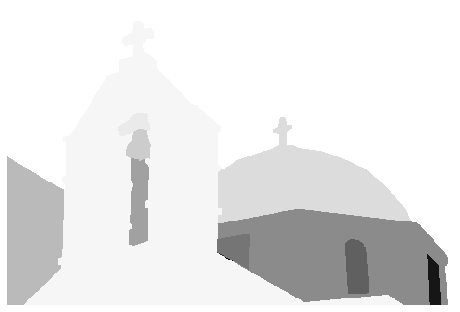

0.624847096306594
for seg1


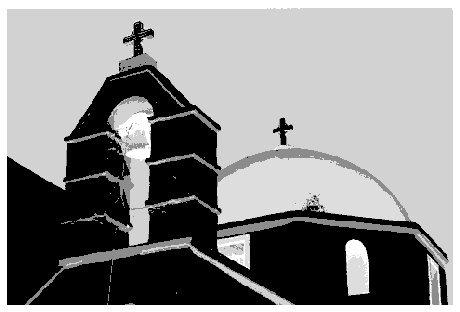

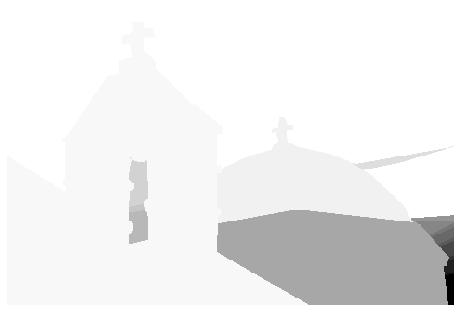

0.5655558288191371
for seg2


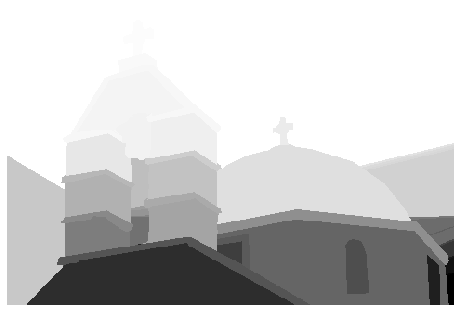

1.4410551676537873
for seg3


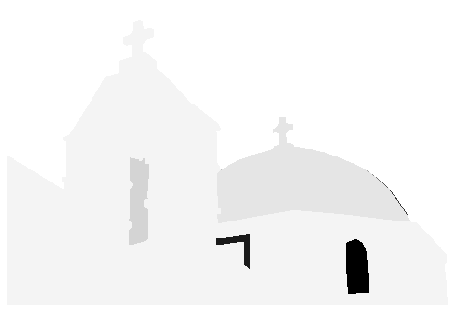

0.235223096116368
for seg4


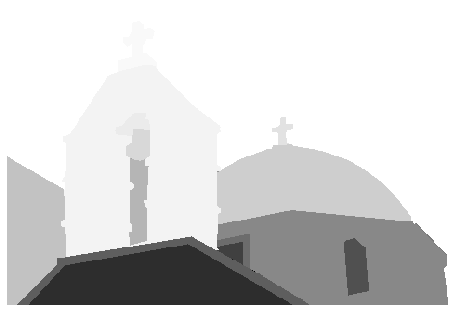

0.8615795247288779
averagee of image 18= 0.745652142724953
for image19
for seg0


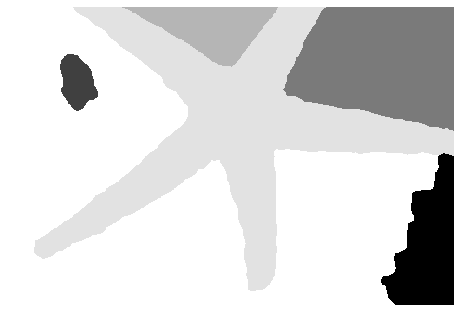

0.7101497559134918
for seg1


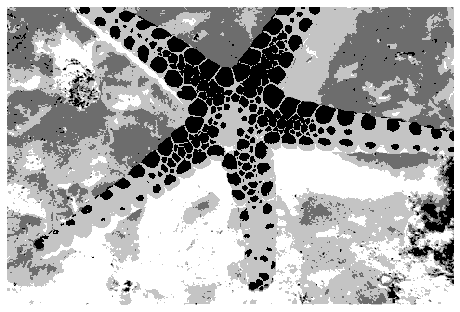

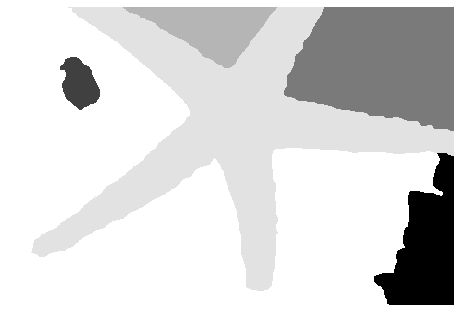

0.7157339367112004
for seg2


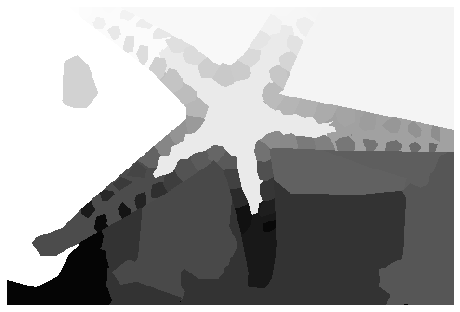

2.093074566383095
for seg3


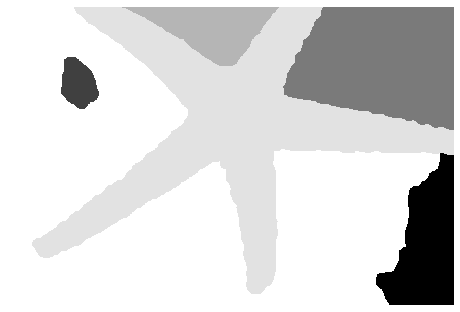

0.7273751065853971
for seg4


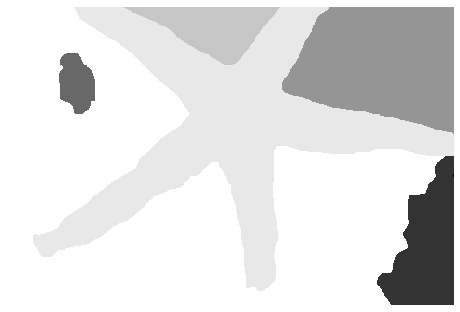

0.7457715448789112
averagee of image 19= 0.9984209820944191
for image20
for seg0


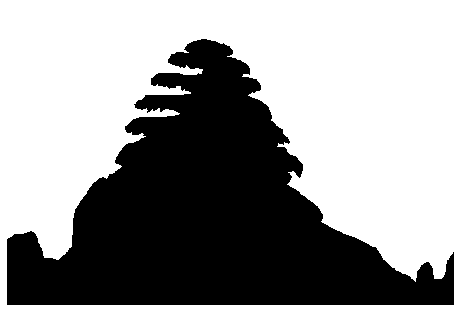

0.43799735767750436
for seg1


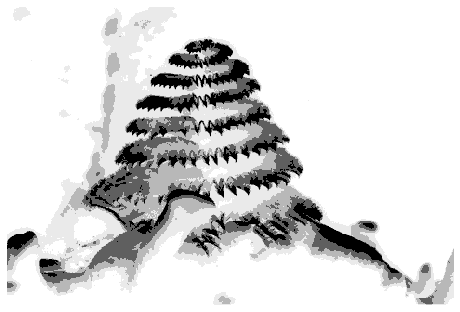

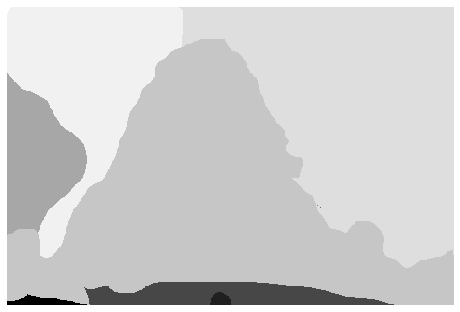

0.9399846222166949
for seg2


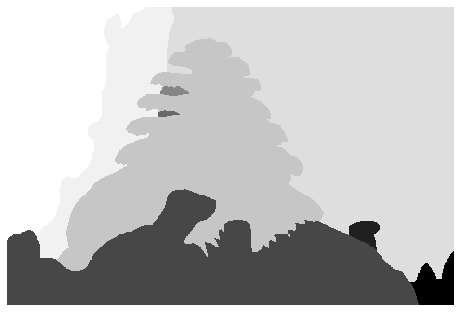

1.0872052604702906
for seg3


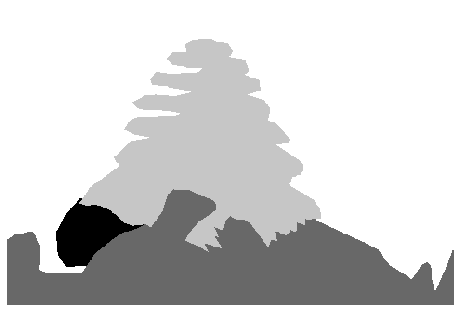

0.7124972393490836
for seg4


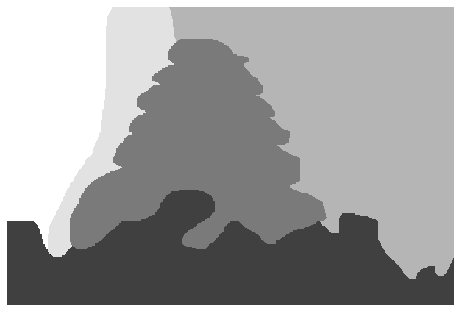

1.043135328744301
averagee of image 20= 0.8441639616915749
for image21
for seg0


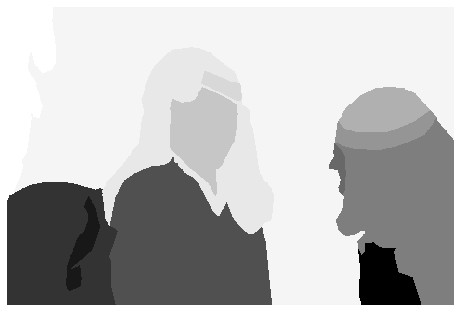

1.3697678782847635
for seg1


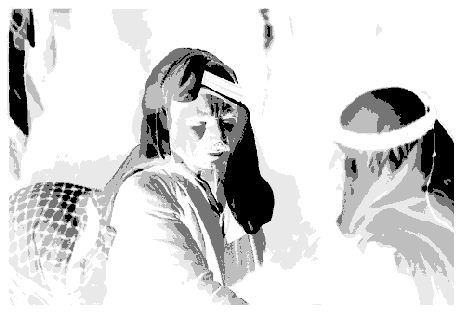

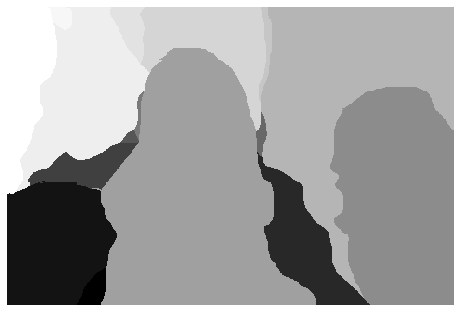

1.6693535404863504
for seg2


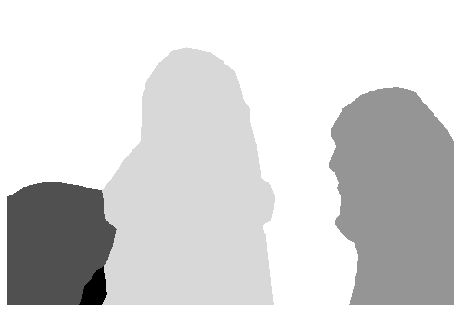

1.0080884634209963
for seg3


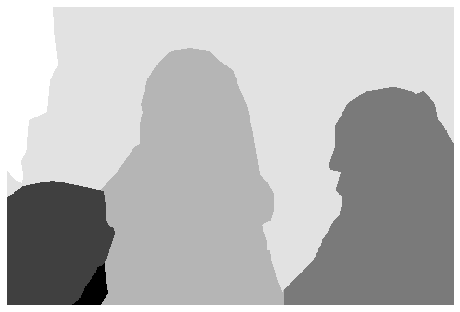

1.1622705879197546
for seg4


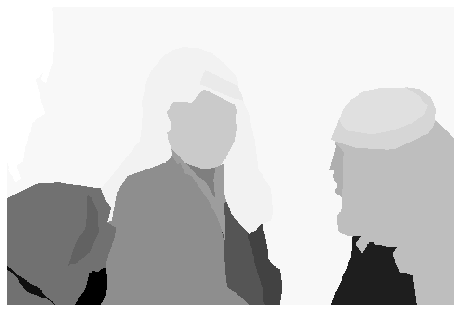

1.540848067815493
averagee of image 21= 1.3500657075854716
for image22
for seg0


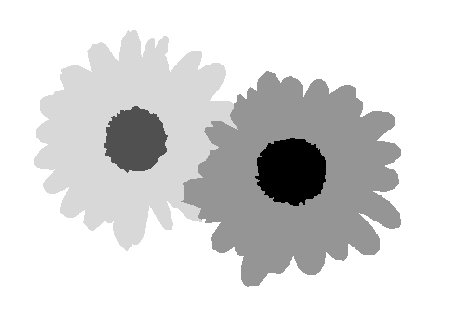

0.5765258287529431
for seg1


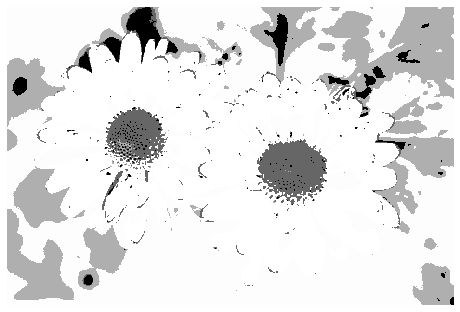

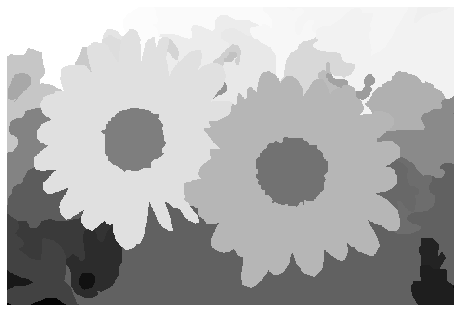

1.8652470866440183
for seg2


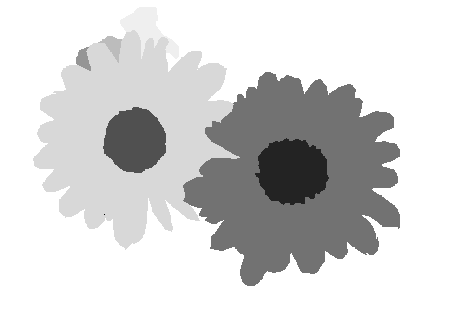

0.6208575955021923
for seg3


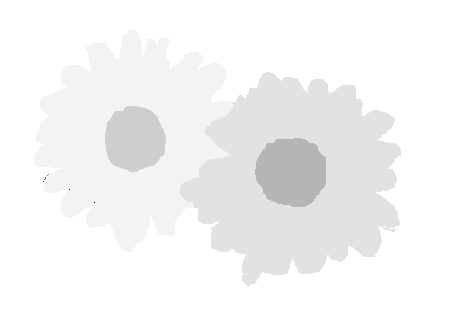

0.5987585511805348
for seg4


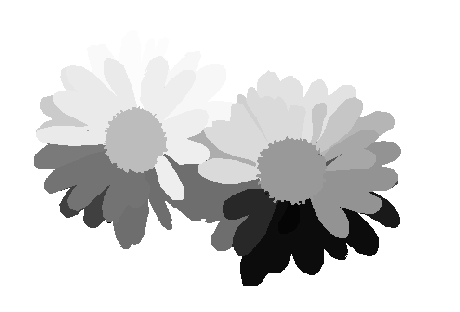

1.3284062007609512
averagee of image 22= 0.9979590525681278
for image23
for seg0


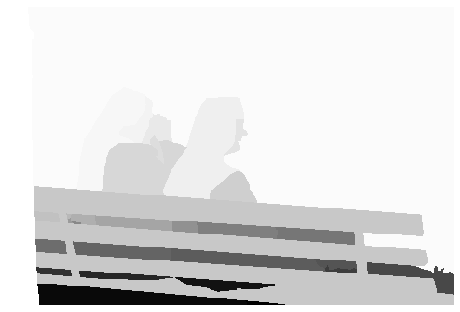

0.9994365237975453
for seg1


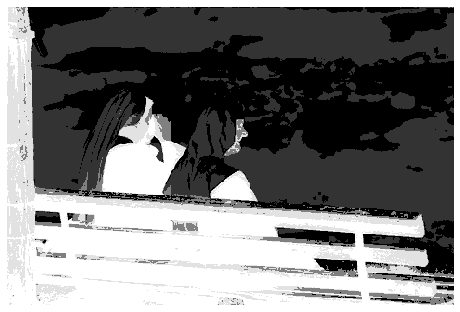

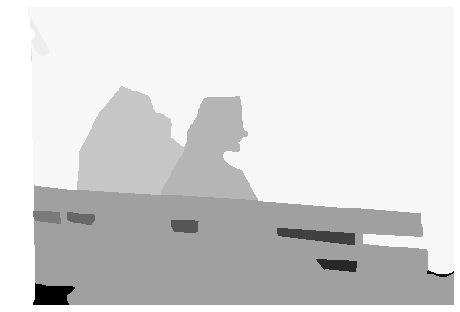

0.7035586452735756
for seg2


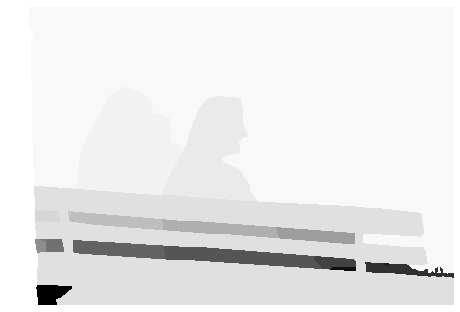

0.868494301893659
for seg3


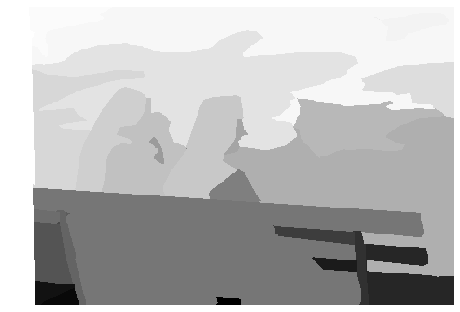

1.6305923384170316
for seg4


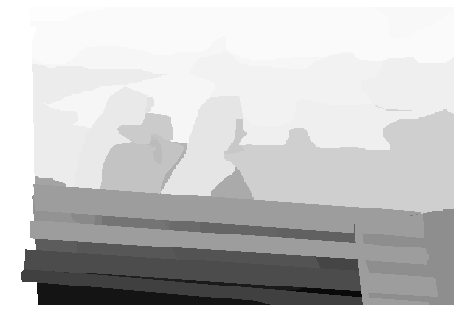

1.9877496873436604
averagee of image 23= 1.2379662993450942
for image24
for seg0


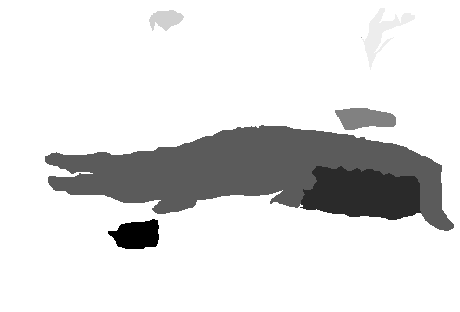

0.6448913871613556
for seg1


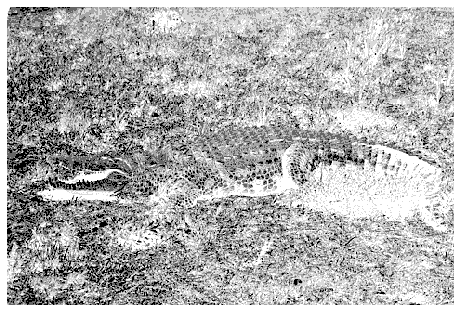

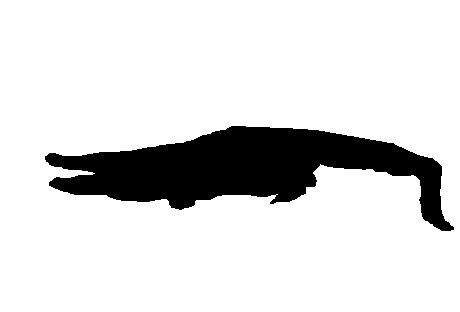

0.39885704179049786
for seg2


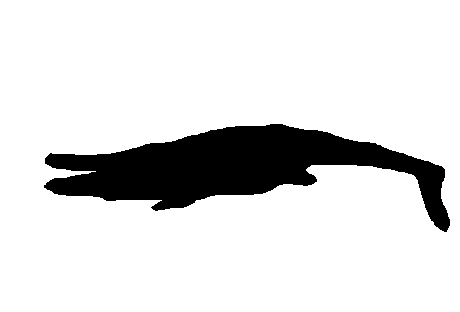

0.3896731832430931
for seg3


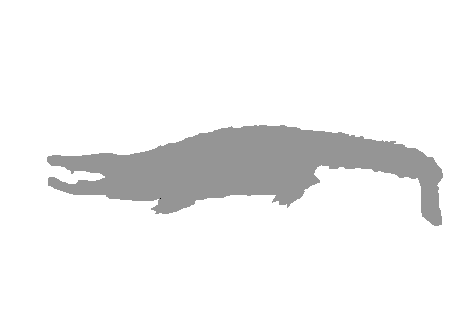

0.399566919308653
for seg4


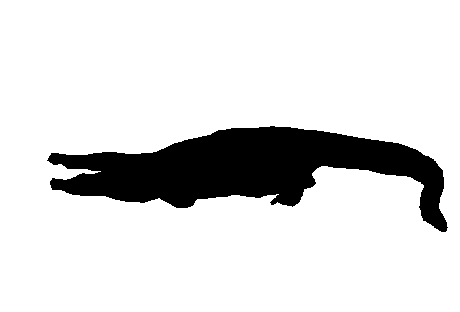

0.39873069870050876
averagee of image 24= 0.44634384604082167
for image25
for seg0


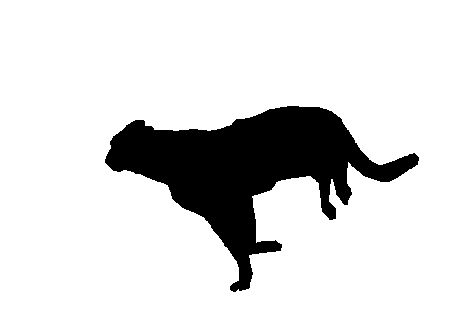

0.31110829741693313
for seg1


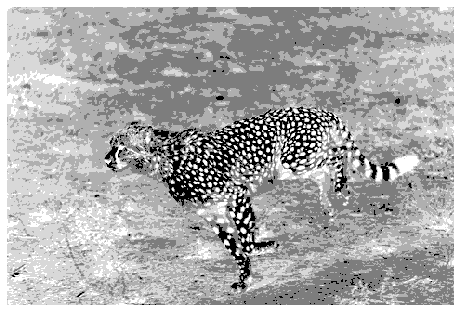

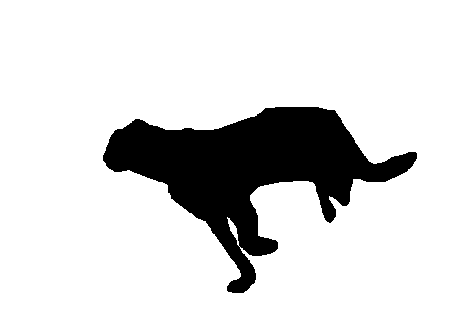

0.32779557761003125
for seg2


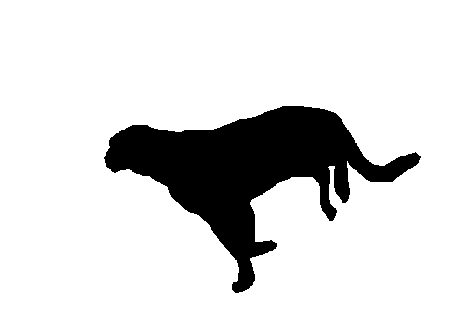

0.31214102934957894
for seg3


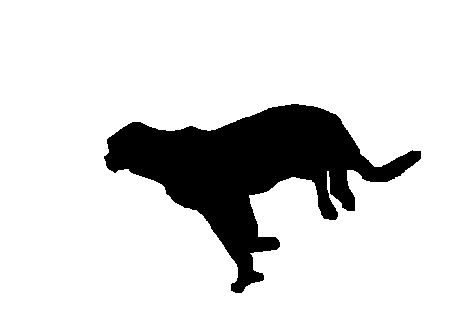

0.3244617246895813
for seg4


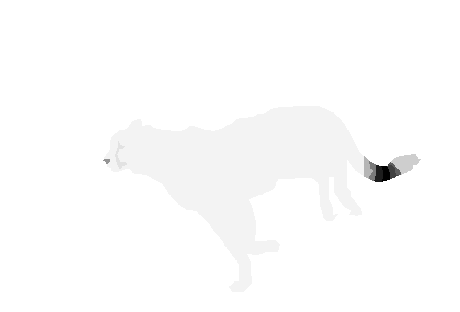

0.35234499694464905
averagee of image 25= 0.3255703252021548
for image26
for seg0


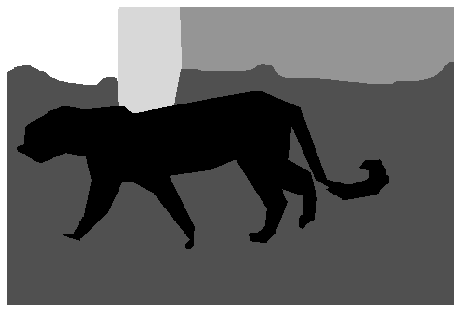

0.8726556388358088
for seg1


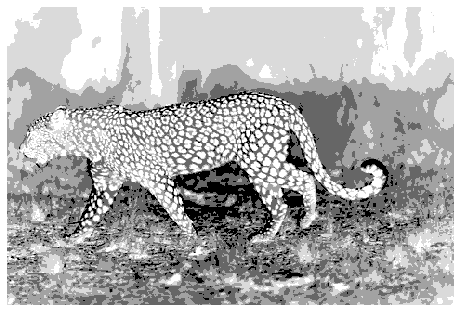

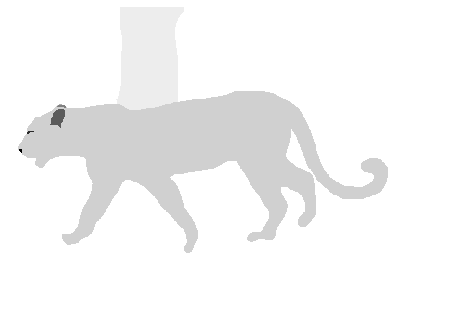

0.590429476121579
for seg2


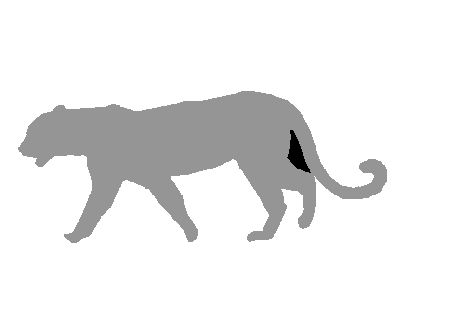

0.45691731741803926
for seg3


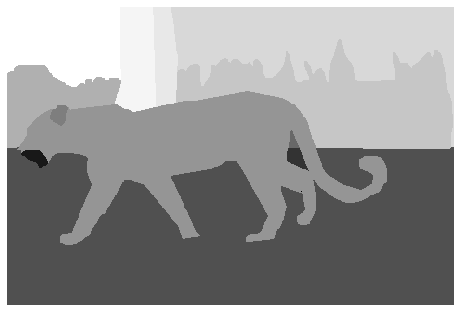

1.3006001880035447
for seg4


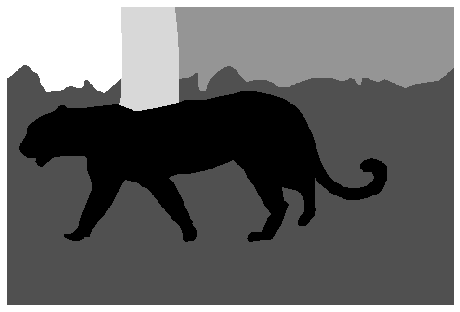

0.8864887141625019
averagee of image 26= 0.8214182669082947
for image27
for seg0


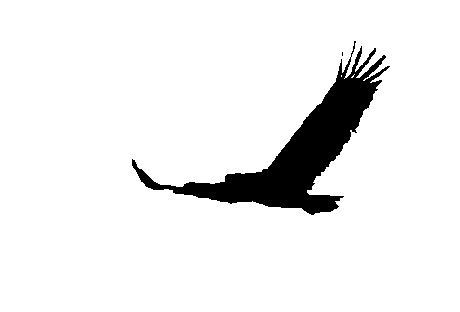

0.08453703120936278
for seg1


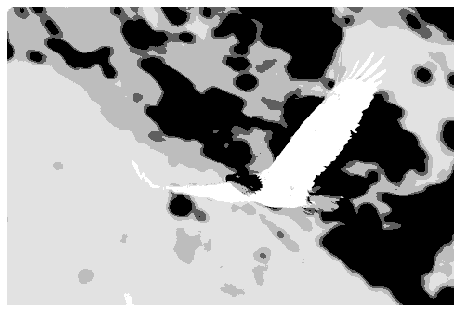

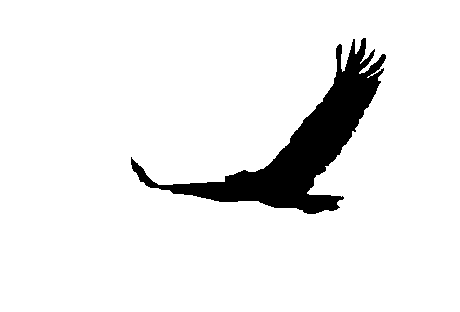

0.1017023076422987
for seg2


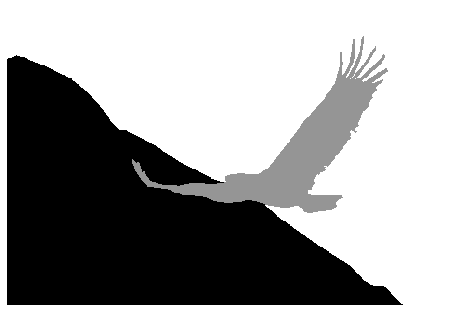

0.3540231546779704
for seg3


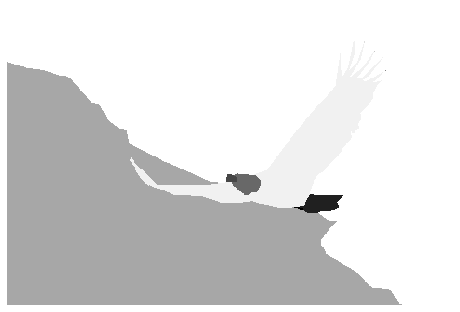

0.37857951482306396
for seg4


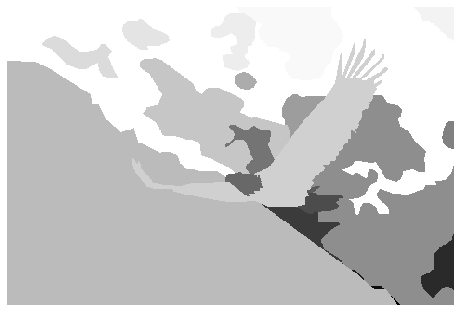

0.9552931306476429
averagee of image 27= 0.3748270278000677
for image28
for seg0


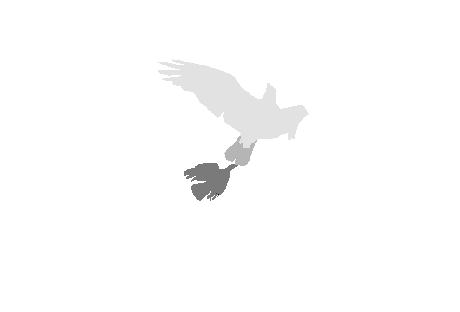

0.05848070631302201
for seg1


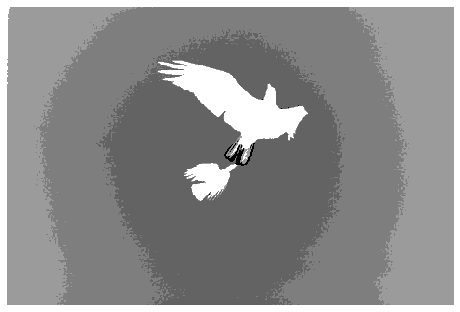

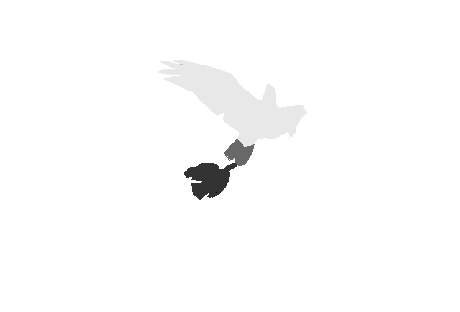

0.0637451964316296
for seg2


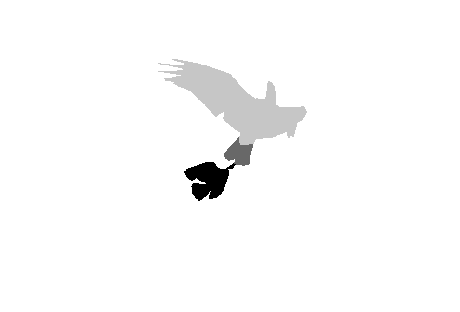

0.06049639661779165
for seg3


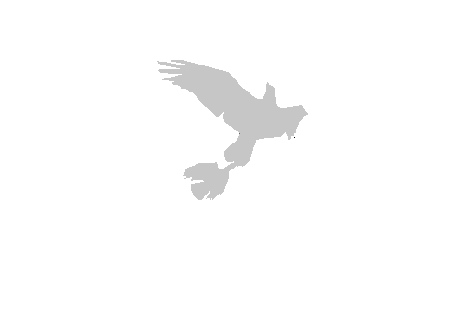

0.03504391532359687
for seg4


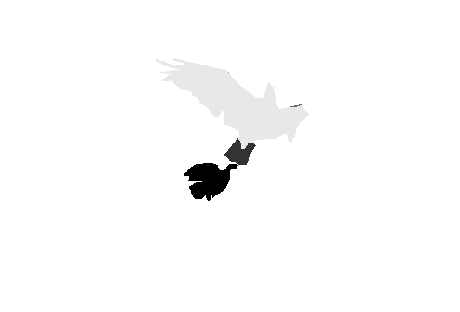

0.06929613173205176
averagee of image 28= 0.057412469283618386
for image29
for seg0


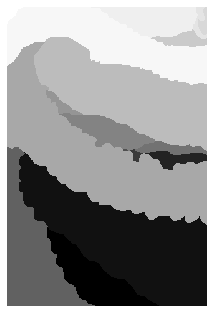

4.050438992735148
for seg1


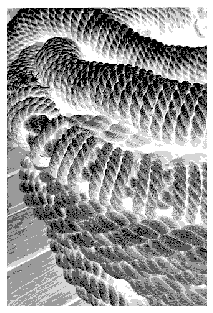

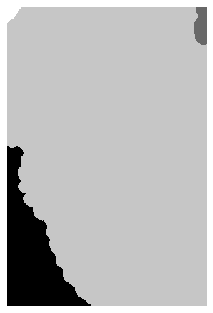

0.6922923362280775
for seg2


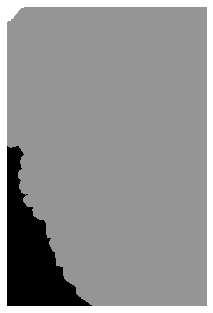

0.6190583748374139
for seg3


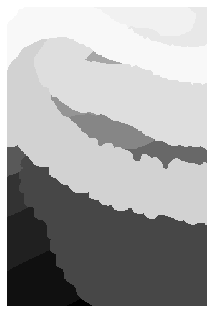

3.9761046371497977
for seg4


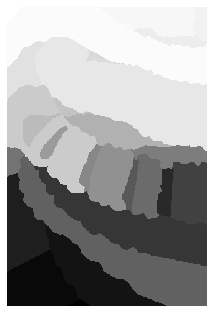

5.469486803239586
averagee of image 29= 2.9614762288380043
for image30
for seg0


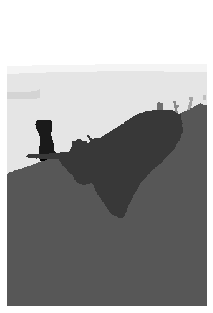

1.3658297522904235
for seg1


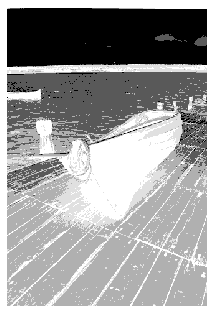

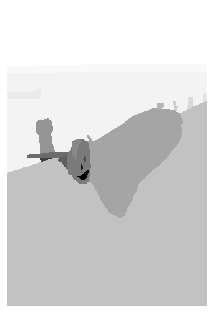

1.5236773989061116
for seg2


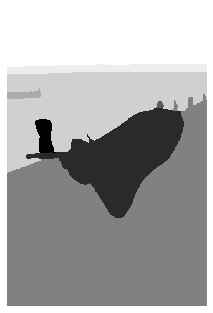

1.3412993544879157
for seg3


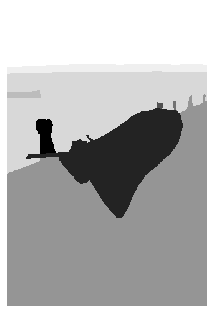

1.3412426848893386
for seg4


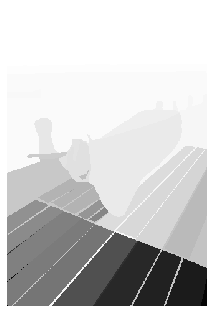

4.19659102151939
for seg5


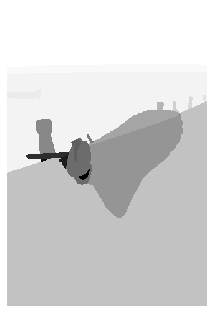

1.5769594204165573
averagee of image 30= 1.8909332720849559
for image31
for seg0


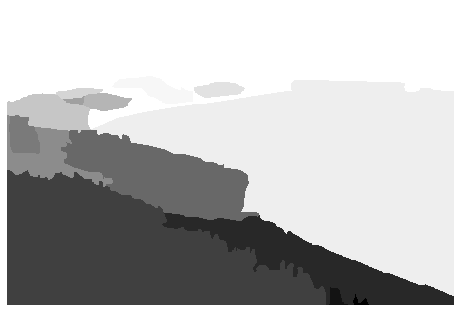

1.148609193174594
for seg1


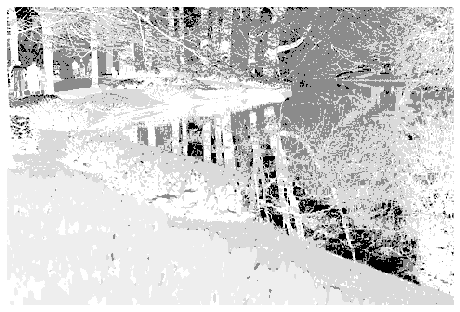

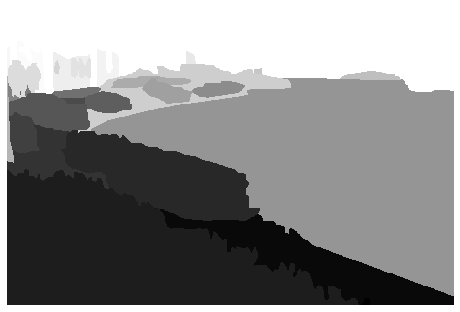

1.3715323512045672
for seg2


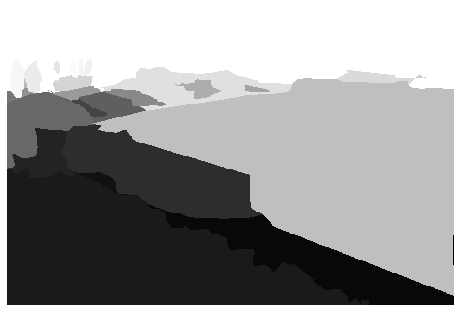

1.303494445314777
for seg3


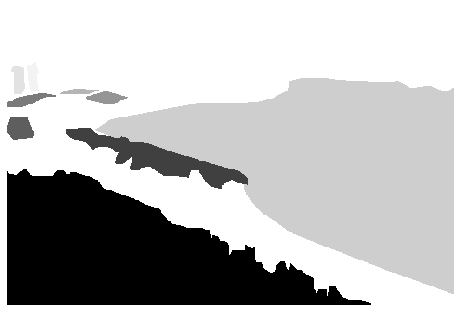

0.77370234237107
for seg4


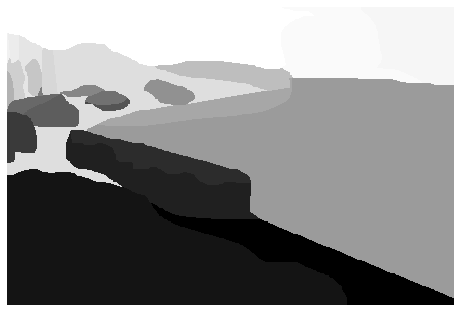

1.6355912376821353
averagee of image 31= 1.2465859139494286
for image32
for seg0


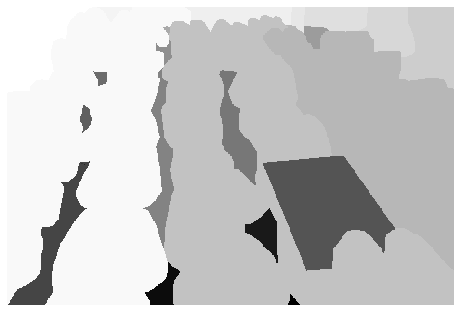

1.3095640802261088
for seg1


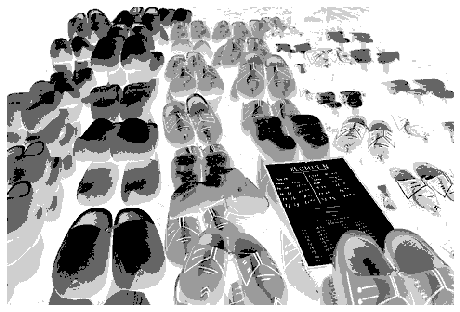

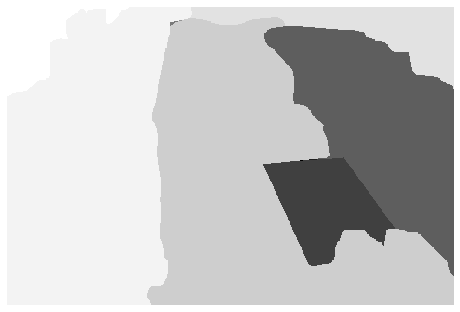

1.055296201291112
for seg2


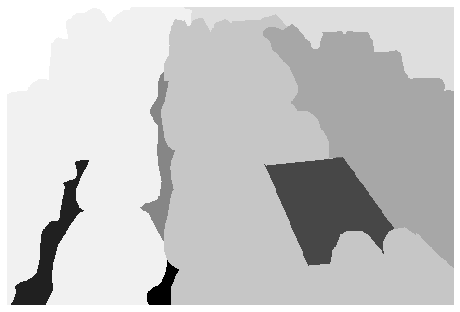

1.133625377655057
for seg3


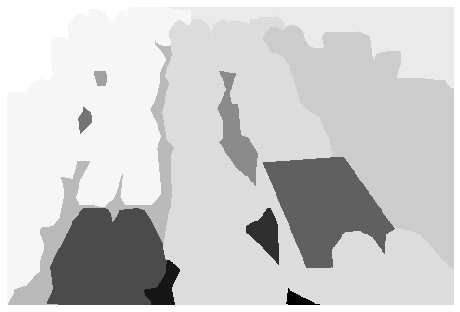

1.348508808237689
for seg4


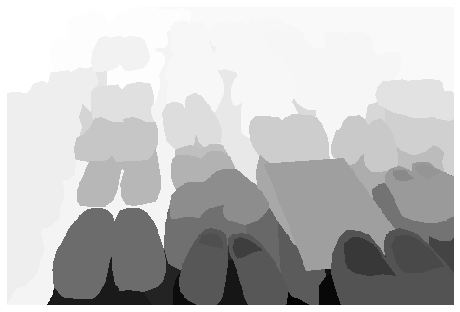

2.6375627062692044
averagee of image 32= 1.4969114347358343
for image33
for seg0


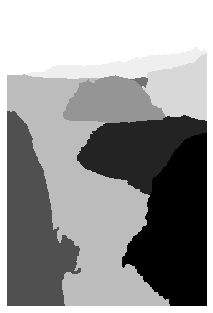

2.5574107249768487
for seg1


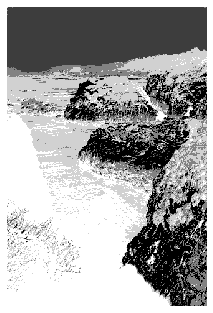

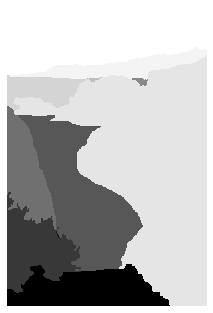

2.109491375275951
for seg2


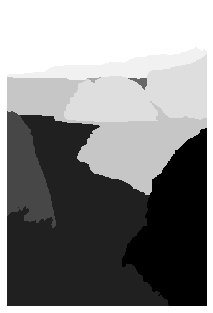

2.247439725818209
for seg3


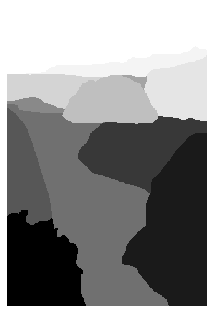

2.9796060879874866
for seg4


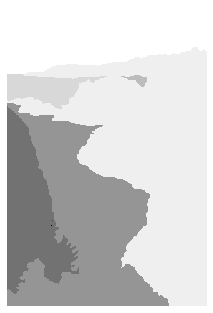

1.4282513363386318
for seg5


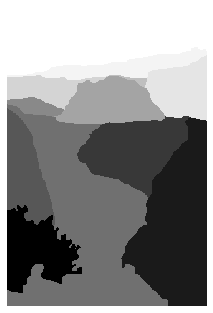

2.9093665901947885
for seg6


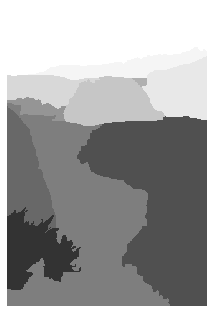

2.531076714325036
averagee of image 33= 2.394663222130993
for image34
for seg0


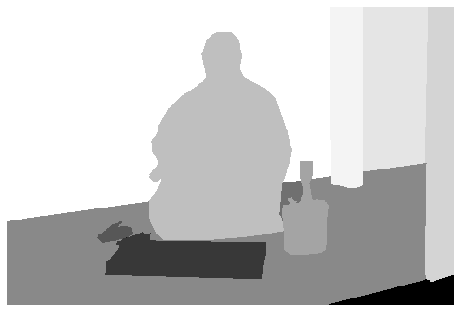

1.4449303865588632
for seg1


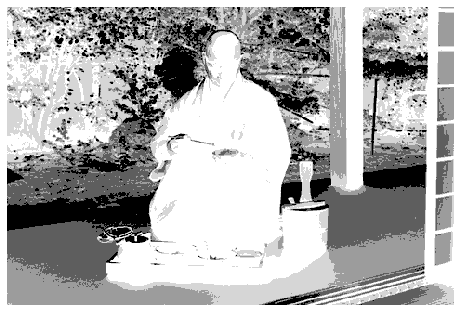

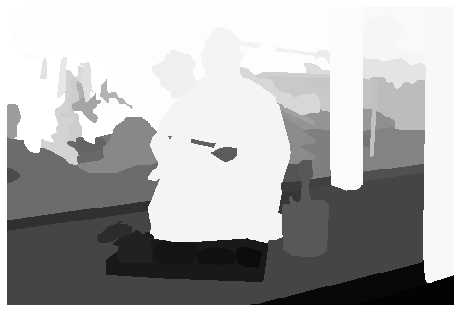

2.3629184712317226
for seg2


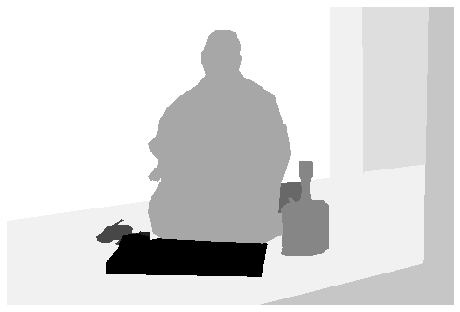

1.368451530692419
for seg3


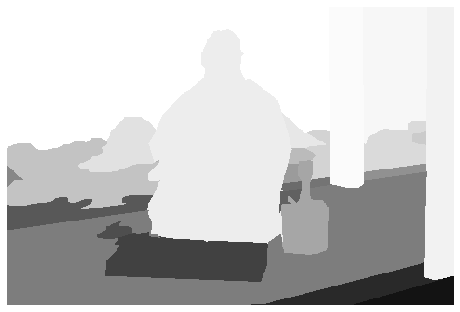

1.8474233243977984
for seg4


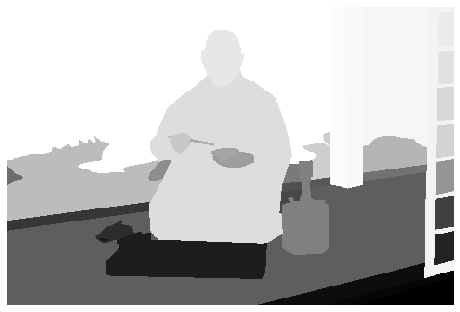

1.8809773198705946
averagee of image 34= 1.7809402065502795
for image35
for seg0


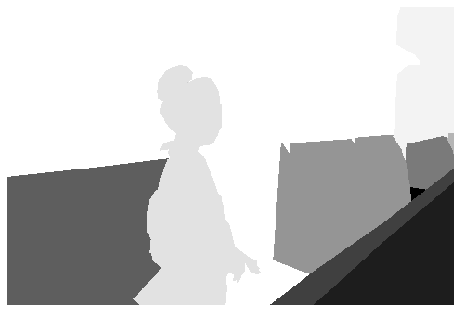

1.3838867731703175
for seg1


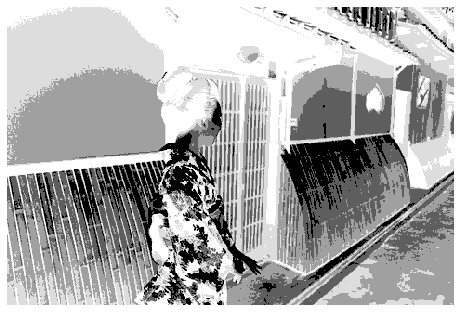

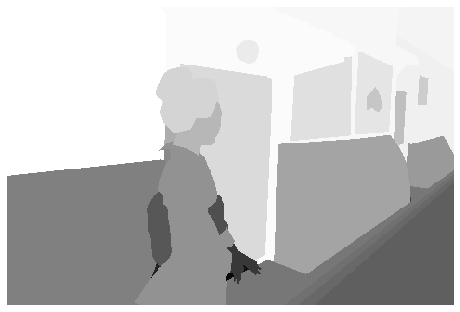

2.1334622705705555
for seg2


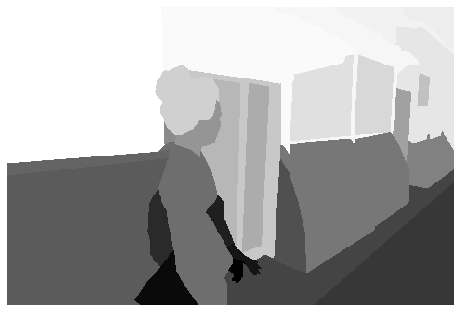

2.2658983693414587
for seg3


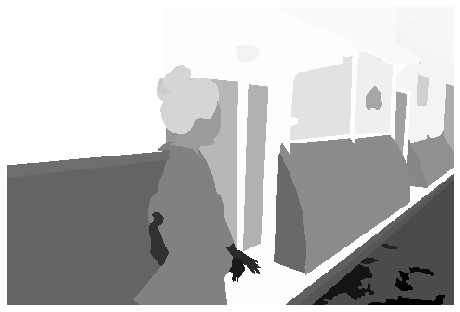

2.2063371758593346
for seg4


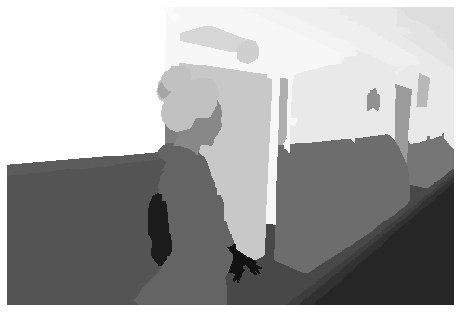

2.128216731120221
averagee of image 35= 2.0235602640123775
for image36
for seg0


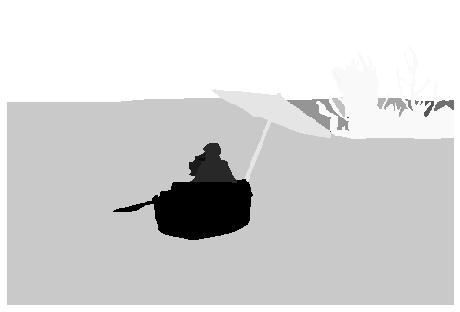

0.5428604212815656
for seg1


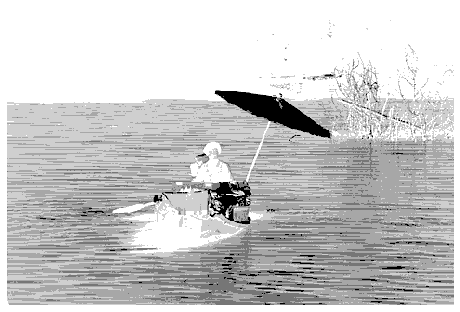

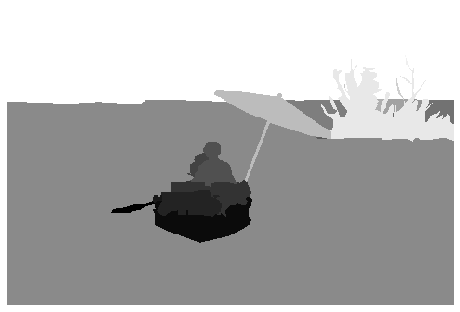

0.5684991085541221
for seg2


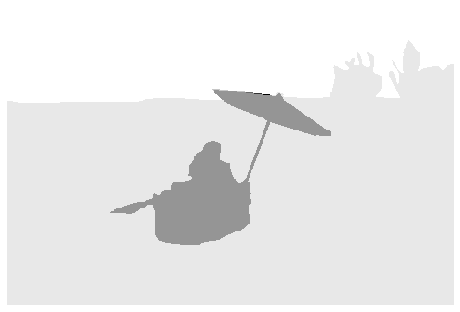

0.3286695089451784
for seg3


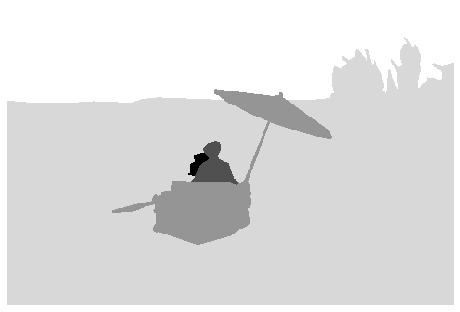

0.3508749476425147
for seg4


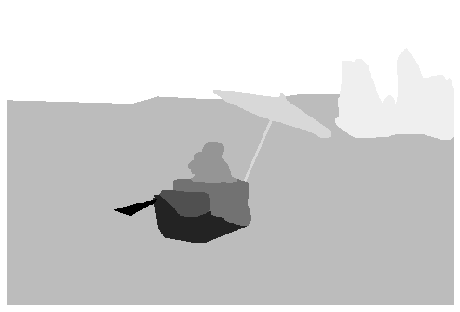

0.5384650520886668
averagee of image 36= 0.4658738077024095
for image37
for seg0


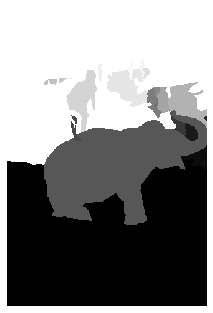

2.3989700947804096
for seg1


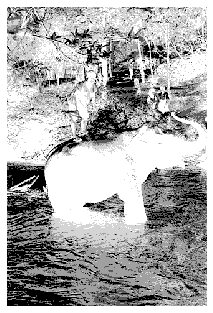

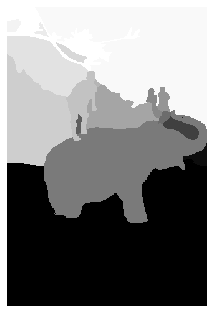

3.313045425809569
for seg2


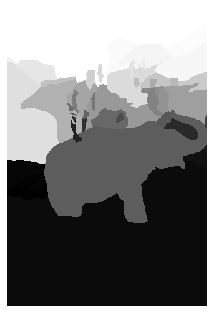

4.104035877252388
for seg3


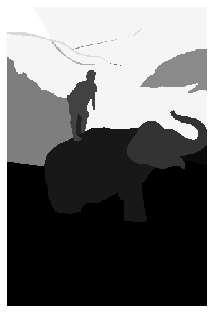

2.96701469430988
for seg4


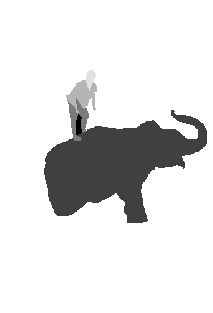

0.9098868903994919
averagee of image 37= 2.7385905965103476
for image38
for seg0


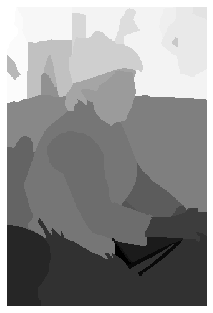

5.466699995119047
for seg1


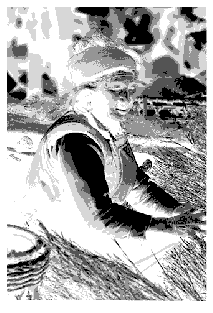

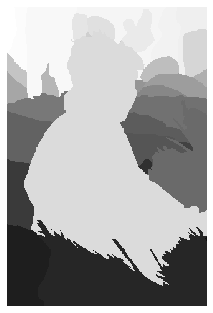

4.7036085101157745
for seg2


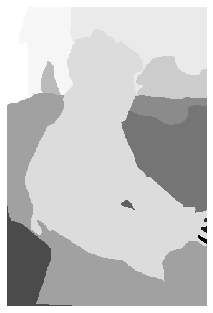

3.687433169840979
for seg3


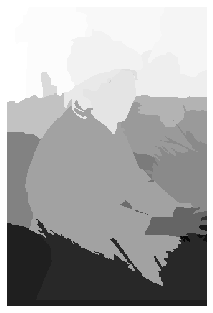

5.018535069304165
for seg4


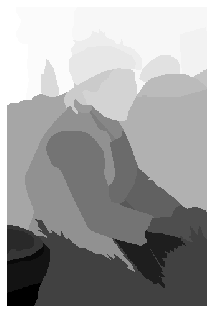

5.538712876600696
for seg5


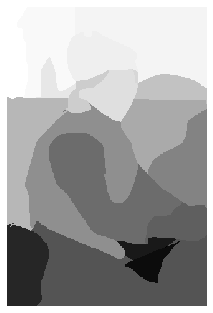

5.186317097468534
averagee of image 38= 4.933551119741533
for image39
for seg0


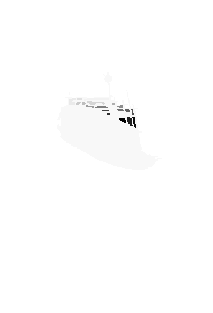

0.4334669823684871
for seg1


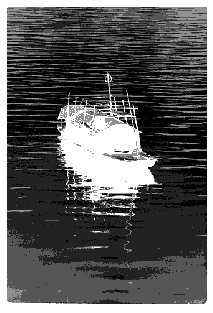

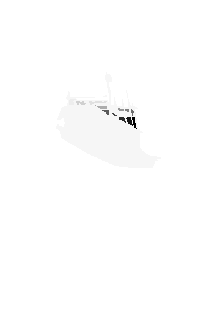

0.42442980506698735
for seg2


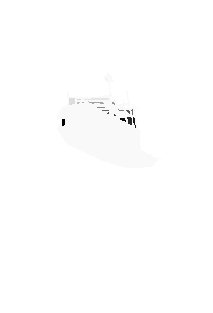

0.43583970767335556
for seg3


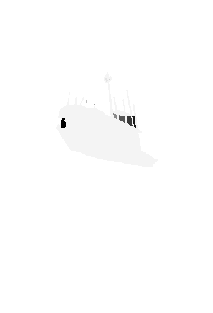

0.3512691984537567
for seg4


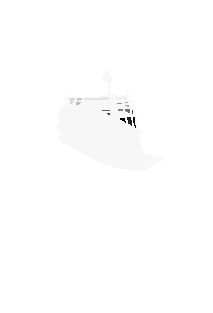

0.4684446519025657
averagee of image 39= 0.4226900690930305
for image40
for seg0


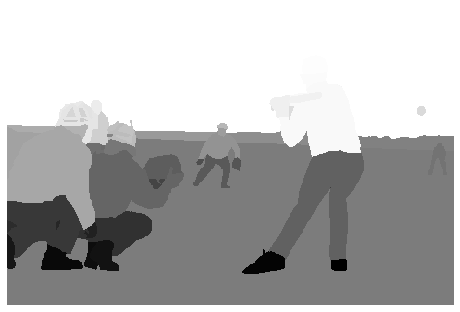

1.3209364210501617
for seg1


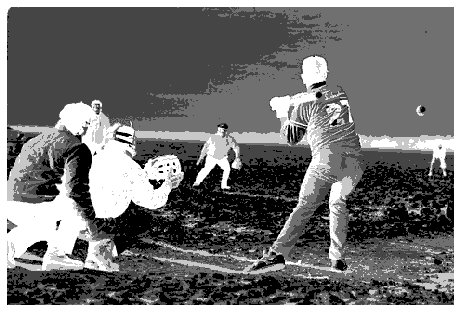

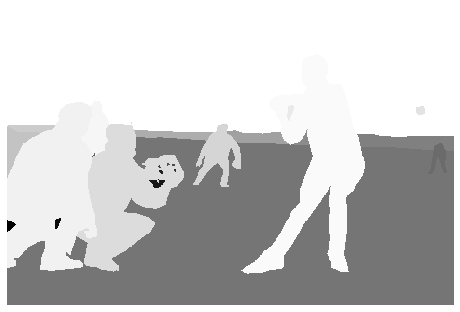

1.097353064520675
for seg2


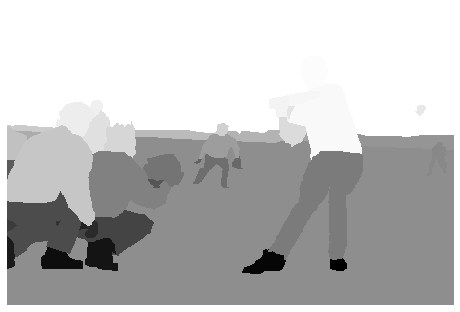

1.3172756653198539
for seg3


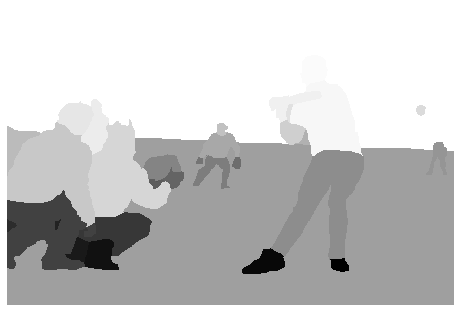

1.2648747389770374
for seg4


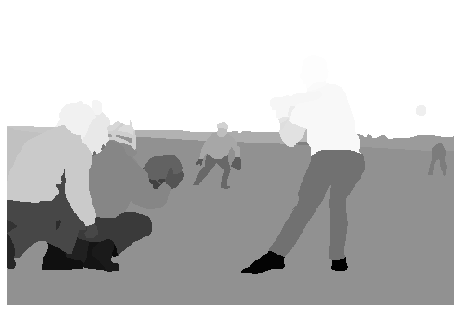

1.331629627158588
averagee of image 40= 1.266413903405263
for image41
for seg0


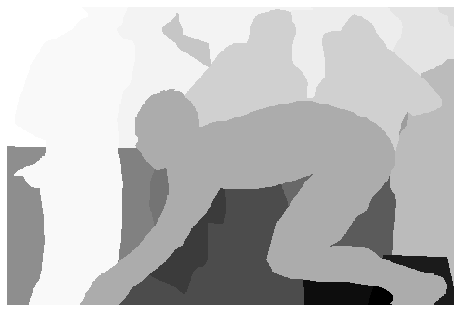

1.7347104863175433
for seg1


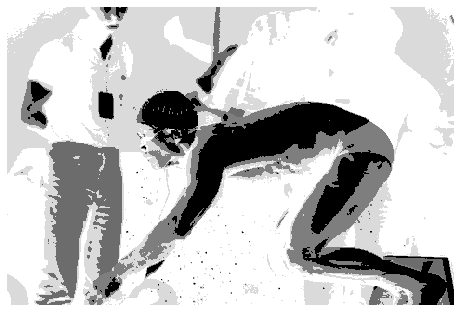

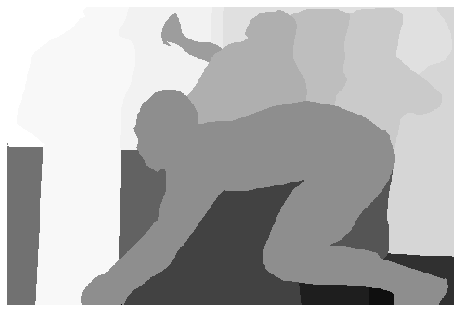

1.749641078583789
for seg2


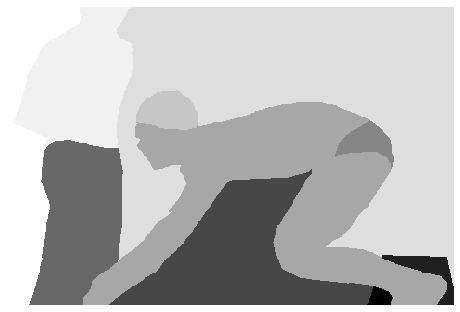

1.188445554255591
for seg3


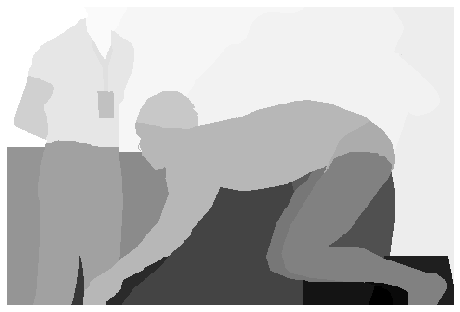

1.9424303073014368
for seg4


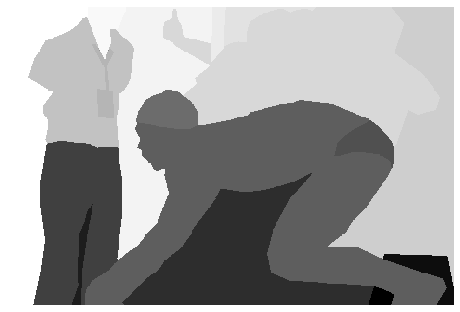

1.6323563965845467
averagee of image 41= 1.6495167646085815
for image42
for seg0


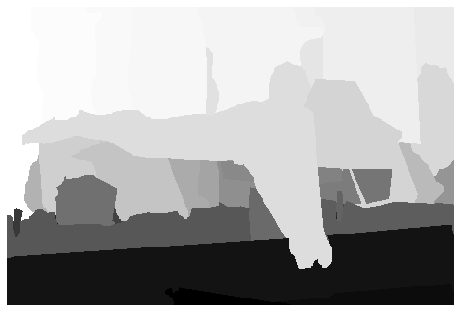

2.3110400164250464
for seg1


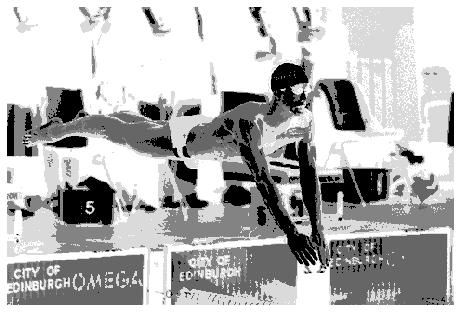

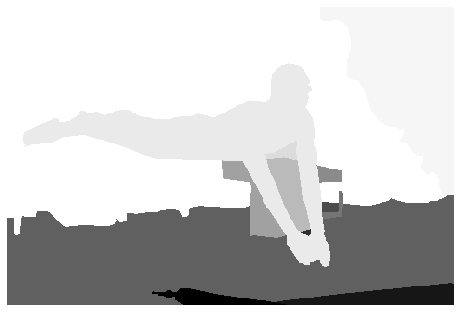

1.1052429961667982
for seg2


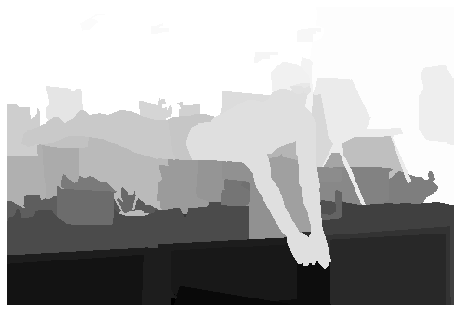

2.3017641307506334
for seg3


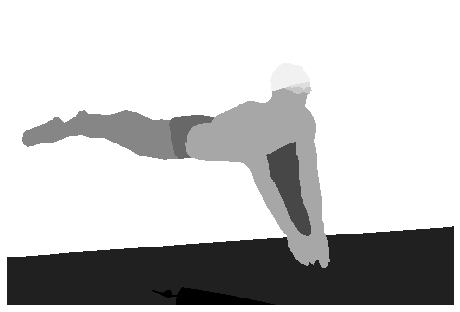

0.7711990899981308
for seg4


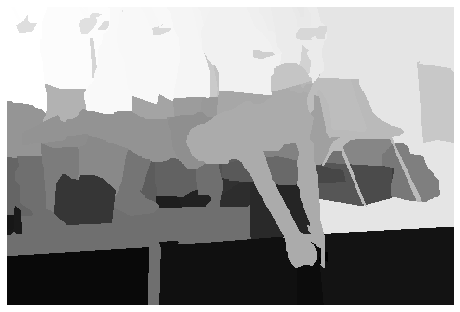

2.737507599346795
averagee of image 42= 1.8453507665374809
for image43
for seg0


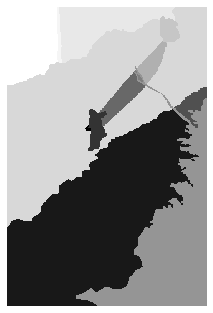

2.341892828386893
for seg1


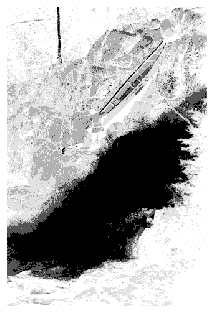

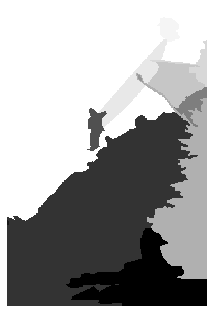

2.2538567679412784
for seg2


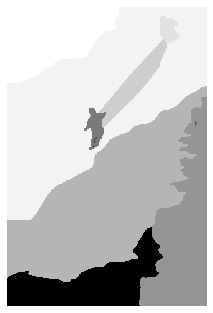

2.1495121803516213
for seg3


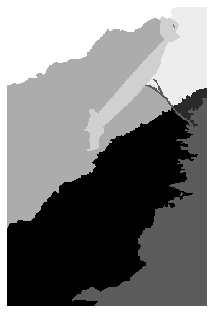

2.3811741040017536
for seg4


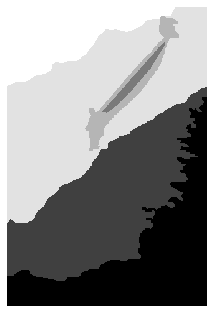

1.824388328561268
for seg5


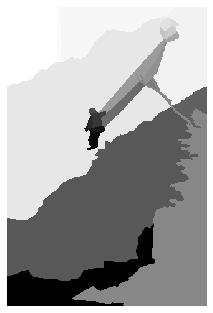

2.8155551455989394
for seg6


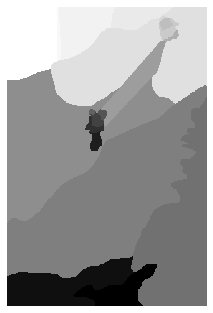

3.0587576545817807
averagee of image 43= 2.403591001346219
for image44
for seg0


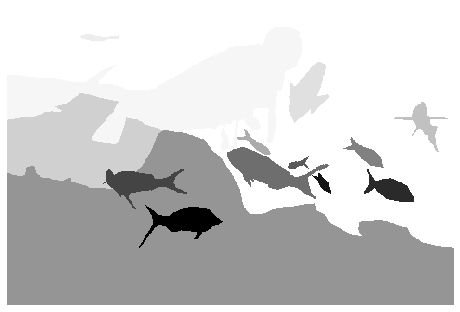

0.8321051104768824
for seg1


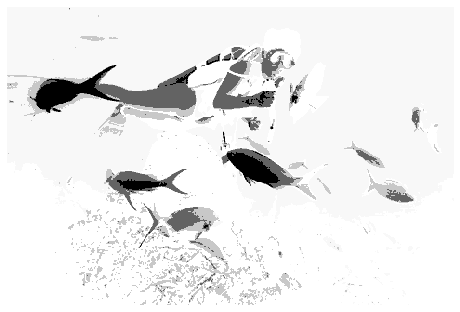

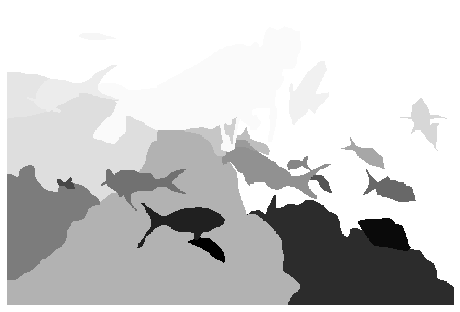

1.2903845132071066
for seg2


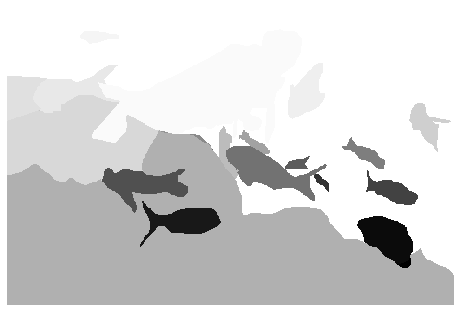

1.004677509475802
for seg3


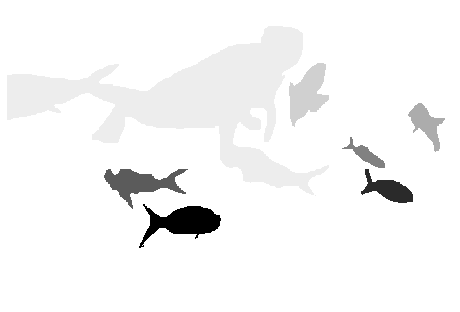

0.46224537793205256
for seg4


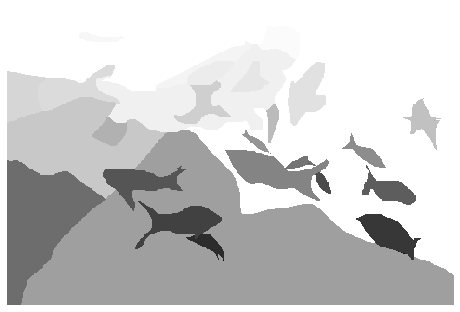

1.248142212503747
averagee of image 44= 0.9675109447191181
for image45
for seg0


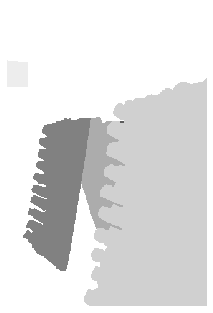

1.6679061143614904
for seg1


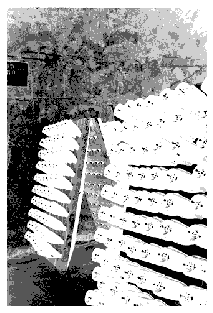

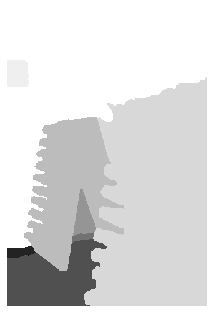

2.0514683862515164
for seg2


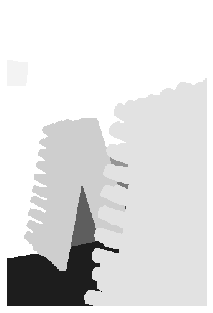

2.0483095106123925
for seg3


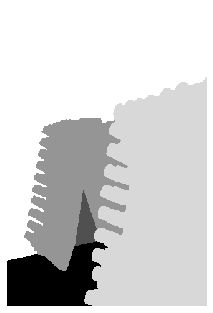

1.8873500567097854
for seg4


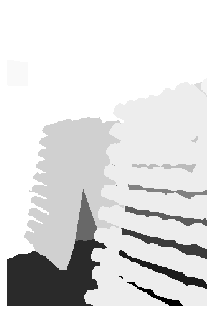

2.2449505803142245
for seg5


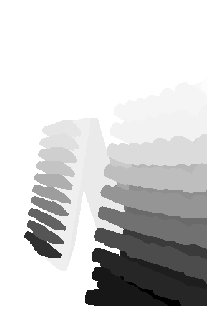

3.747036129063403
averagee of image 45= 2.274503462885469
for image46
for seg0


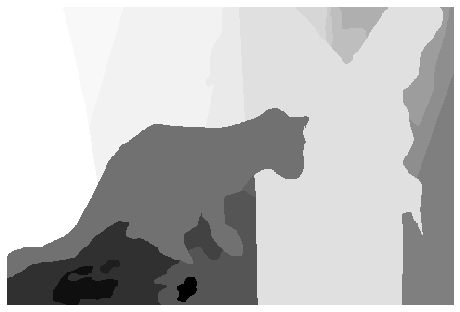

1.8856451894727717
for seg1


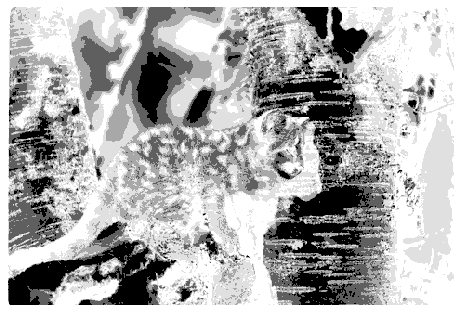

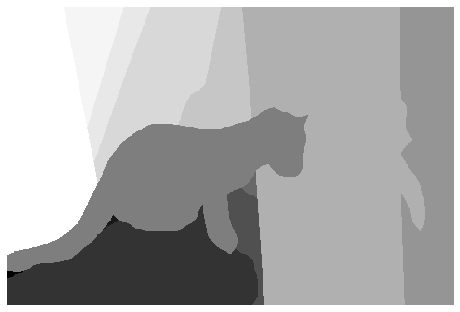

1.7683934006817486
for seg2


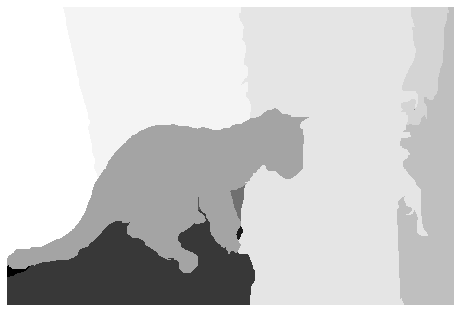

1.5816618048189626
for seg3


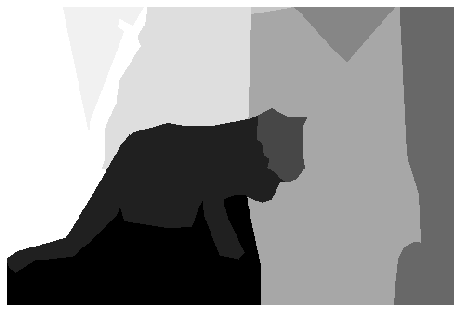

1.7344450864829328
for seg4


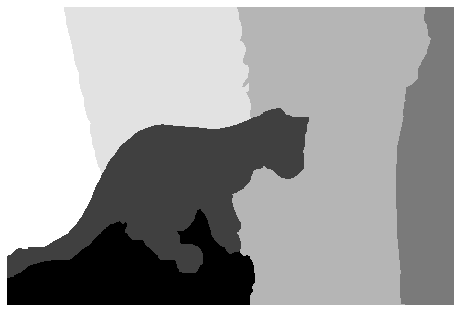

1.5223862217448618
for seg5


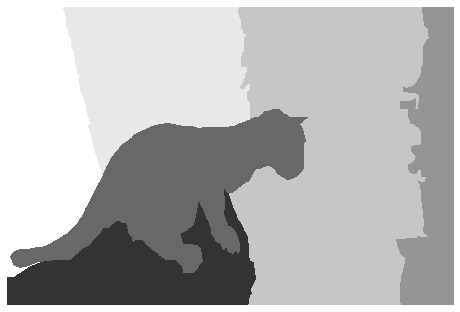

1.5125977013757428
averagee of image 46= 1.6675215674295034
for image47
for seg0


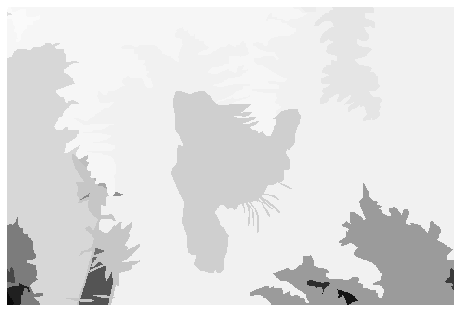

1.5118147265285045
for seg1


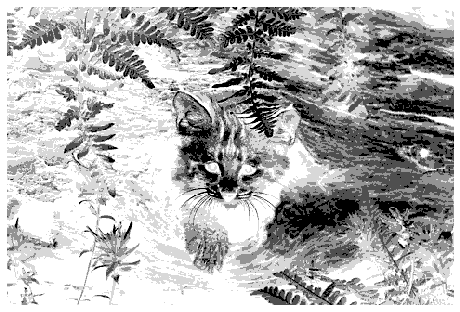

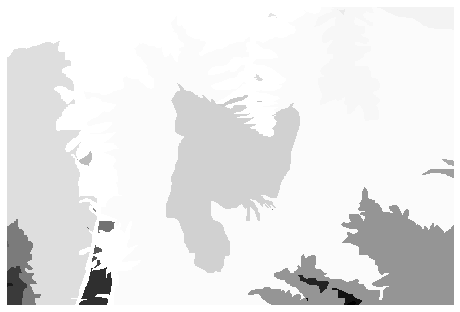

1.5119856578699171
for seg2


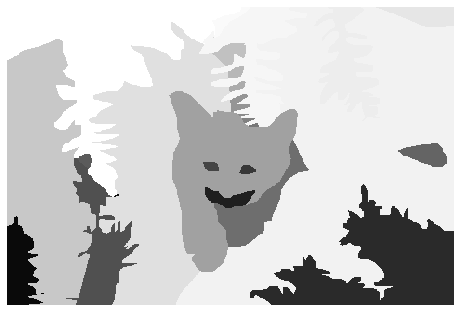

1.8884634456453253
for seg3


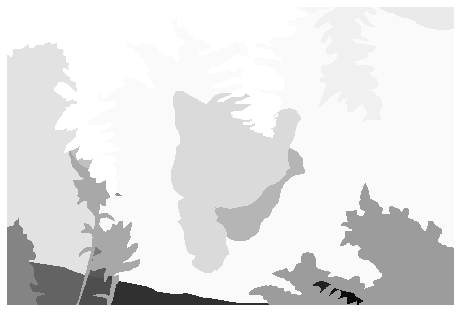

1.6761898961581723
for seg4


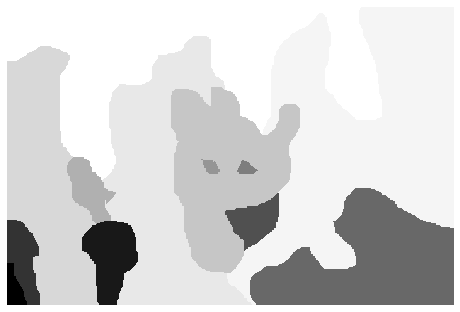

1.7085631446812026
averagee of image 47= 1.6594033741766243
for image48
for seg0


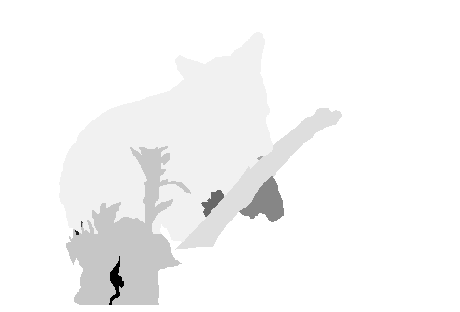

0.6028462496899698
for seg1


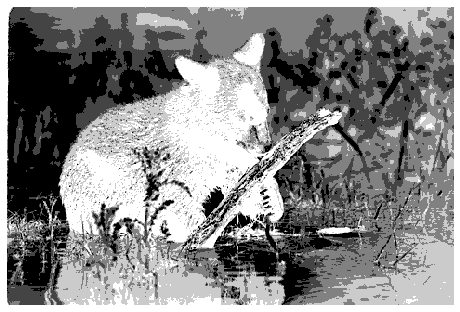

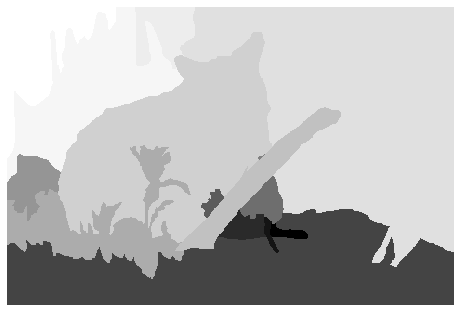

1.425360623051411
for seg2


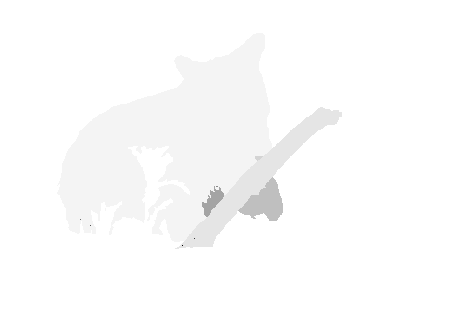

0.3996171665520261
for seg3


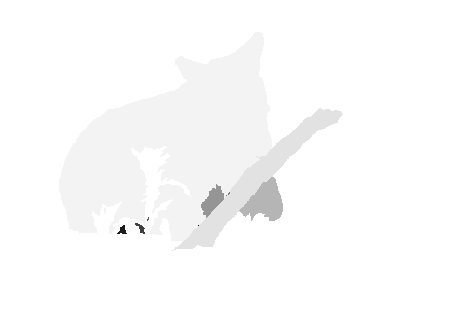

0.39659902576939204
for seg4


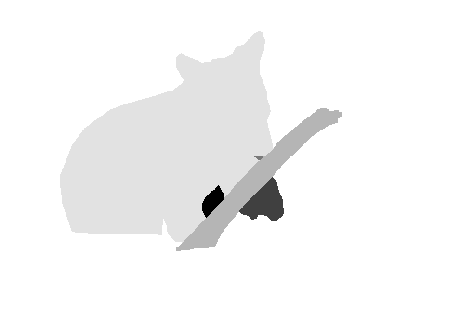

0.44661286730144867
for seg5


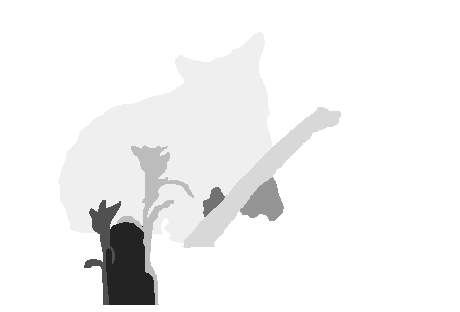

0.6070254202567569
averagee of image 48= 0.6463435587701674
for image49
for seg0


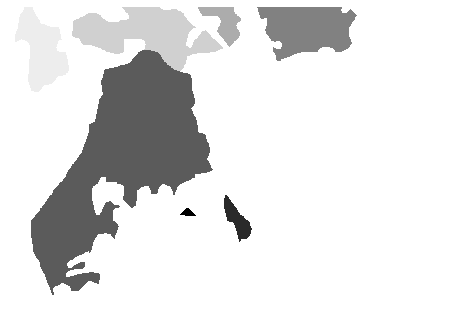

0.6723772715459322
for seg1


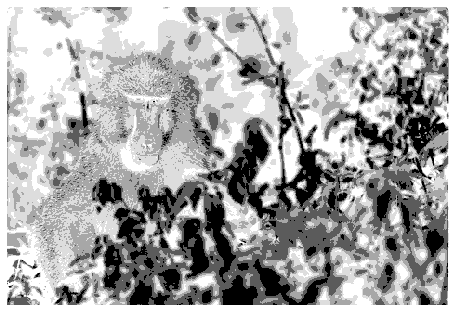

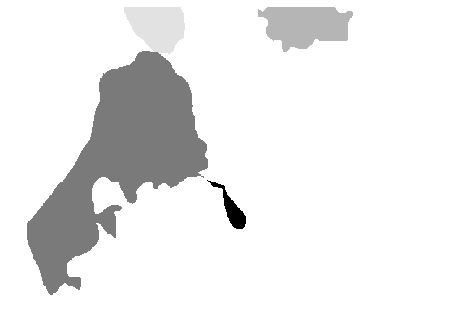

0.5051763487671317
for seg2


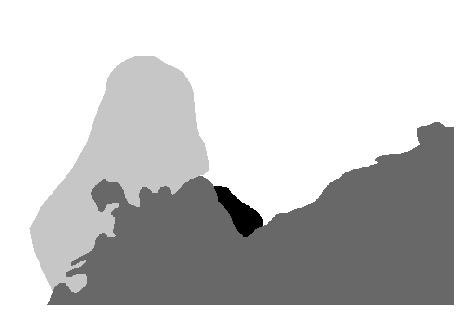

0.8551587832761172
for seg3


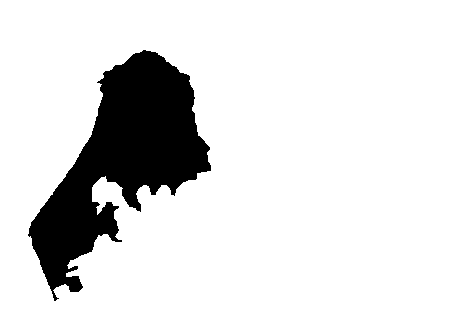

0.3420294674712455
for seg4


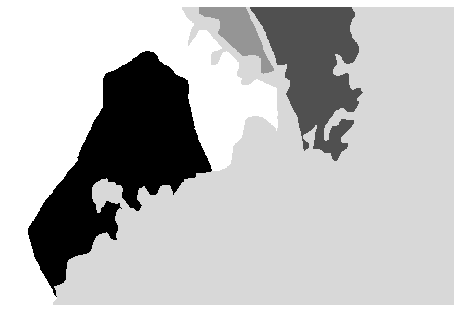

0.951062302517577
for seg5


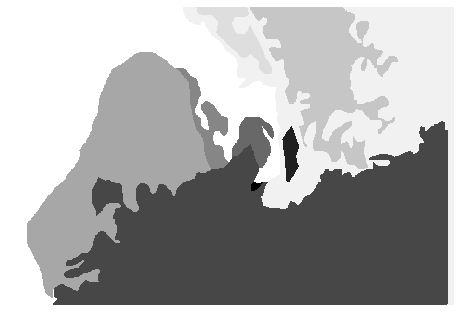

1.3444618144770157
averagee of image 49= 0.7783776646758365
for image50
for seg0


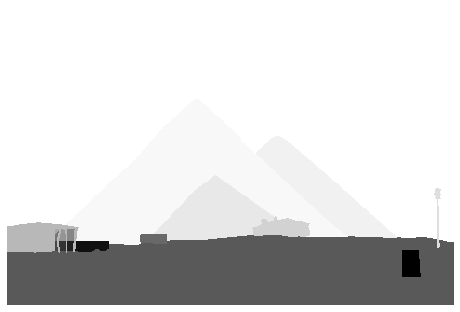

0.5453361897432898
for seg1


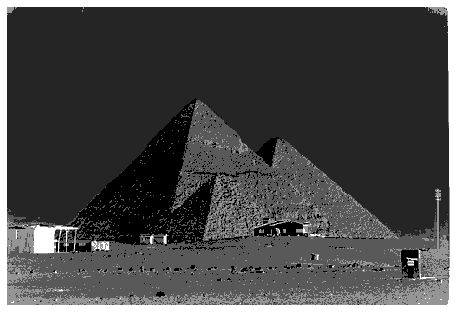

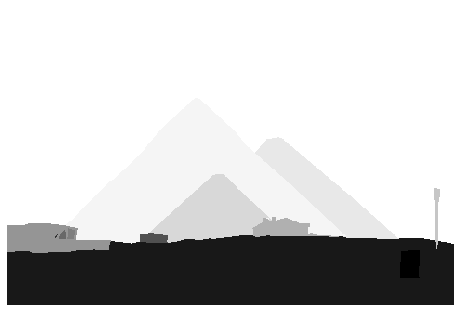

0.5367707521426405
for seg2


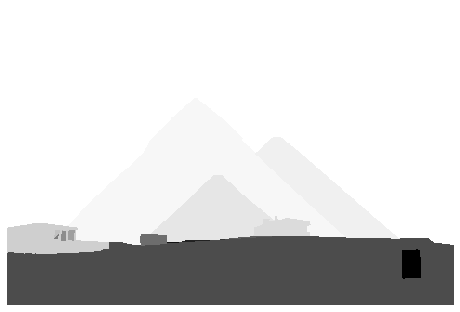

0.5383610255950699
for seg3


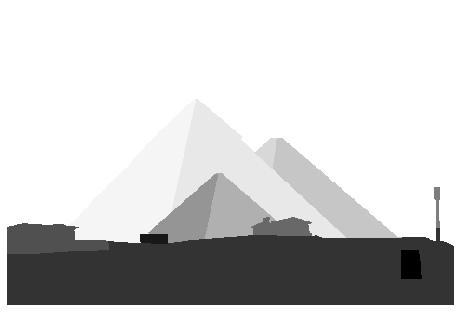

0.5894057345713917
for seg4


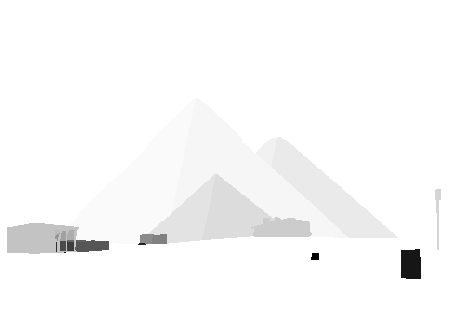

0.566474991002872
averagee of image 50= 0.5552697386110528
for image51
for seg0


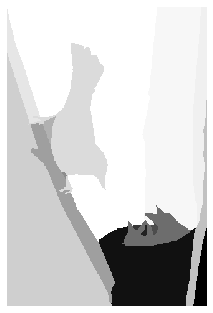

3.2270616255614
for seg1


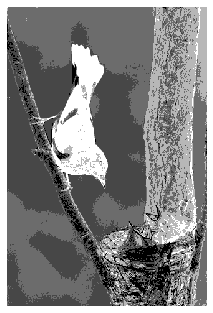

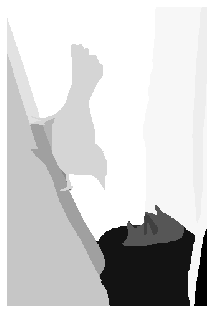

3.1103622795580192
for seg2


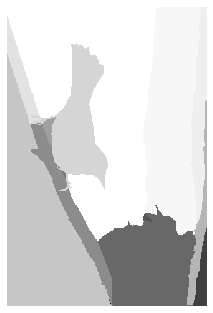

3.0688544597516785
for seg3


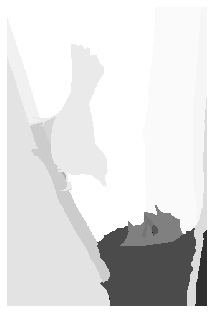

3.2086039330143725
for seg4


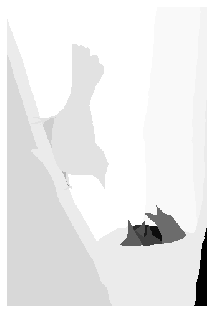

2.8339422964452203
for seg5


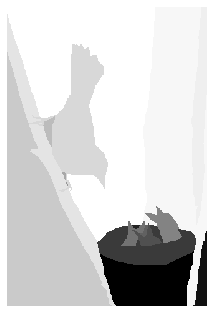

3.1768218285383907
averagee of image 51= 3.1042744038115138
for image52
for seg0


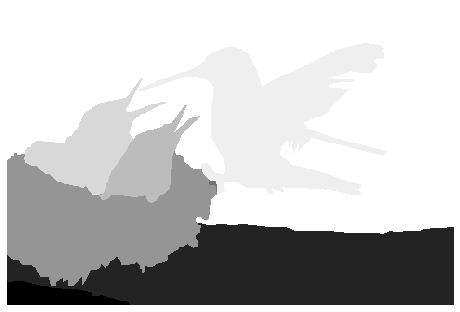

1.0372197726205632
for seg1


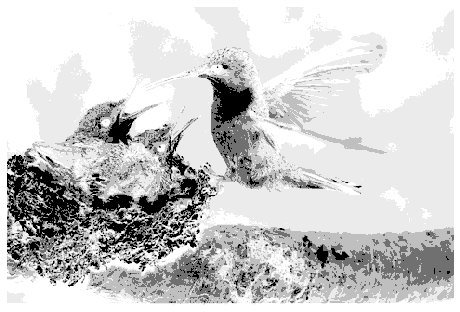

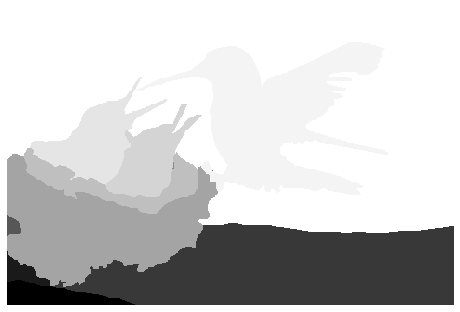

1.1283022025501668
for seg2


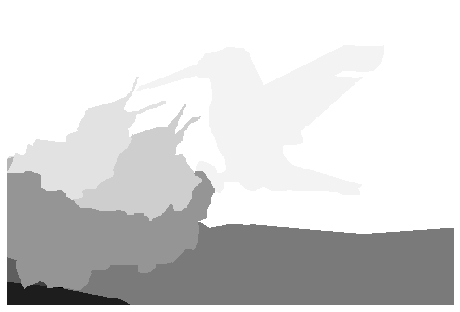

1.105092939863286
for seg3


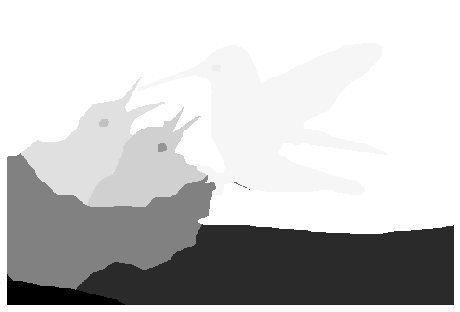

1.090674238116595
for seg4


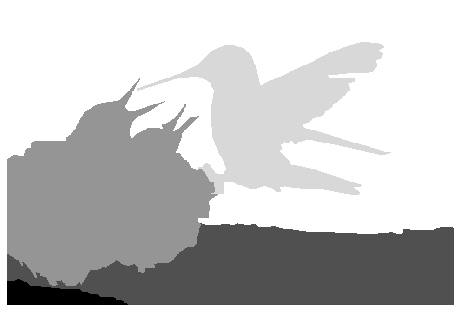

0.8758130940418555
averagee of image 52= 1.047420449438493
for image53
for seg0


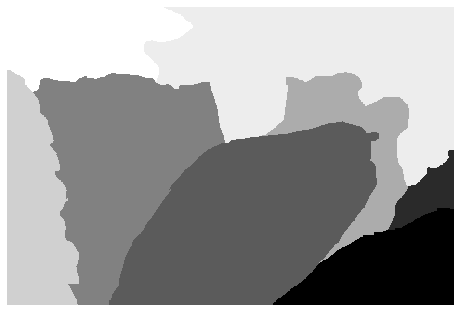

1.375917789020973
for seg1


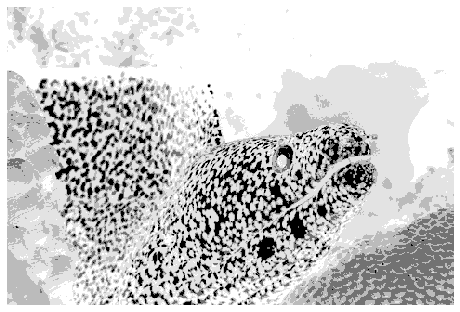

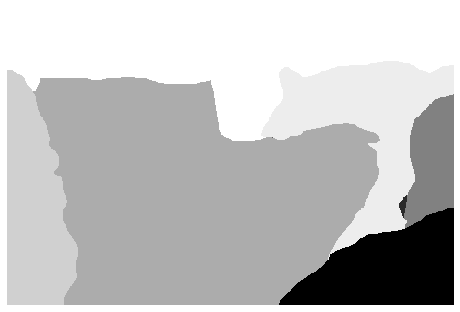

1.0321813542047633
for seg2


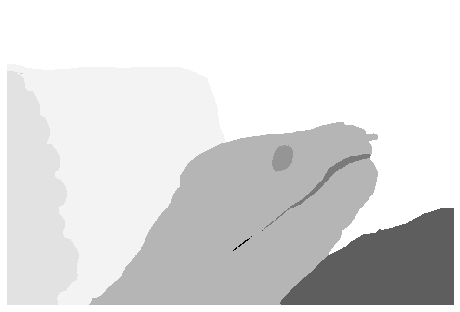

1.1315992135969781
for seg3


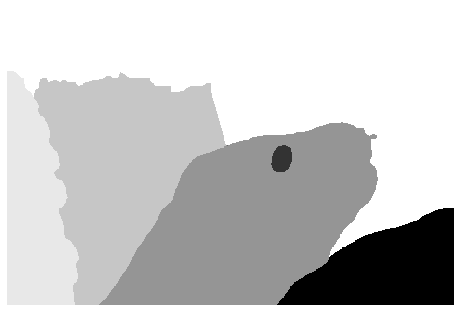

1.0751813717490692
for seg4


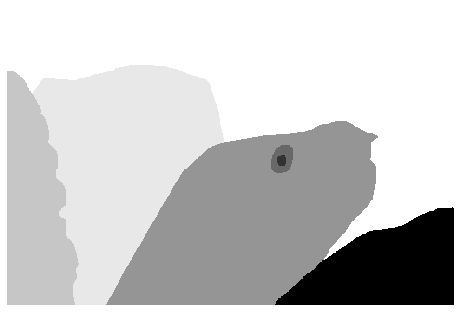

1.104373971780949
averagee of image 53= 1.1438507400705464
for image54
for seg0


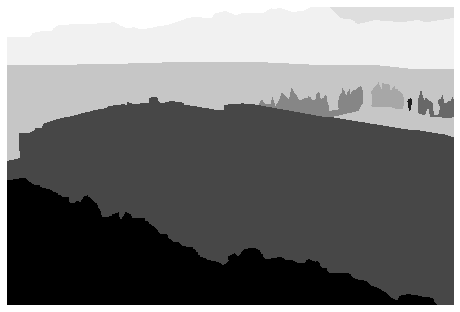

1.174380016941305
for seg1


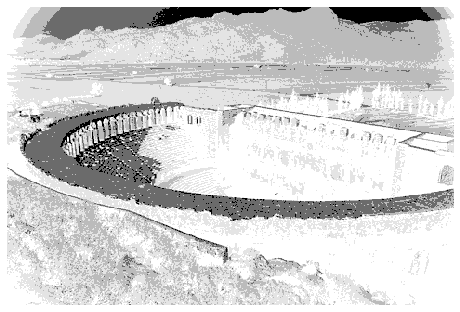

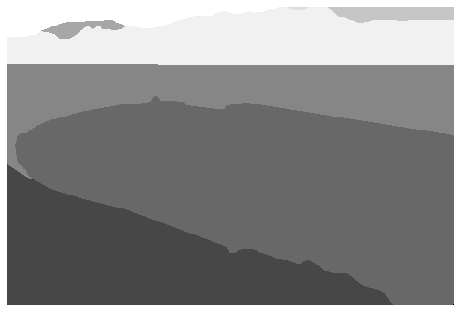

1.132213946626624
for seg2


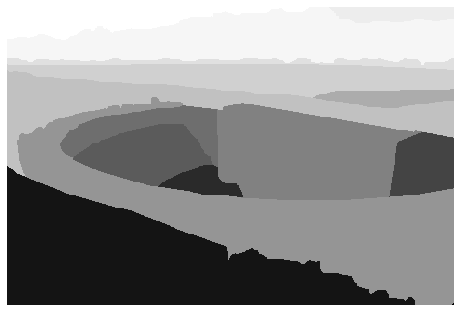

1.7986841495638493
for seg3


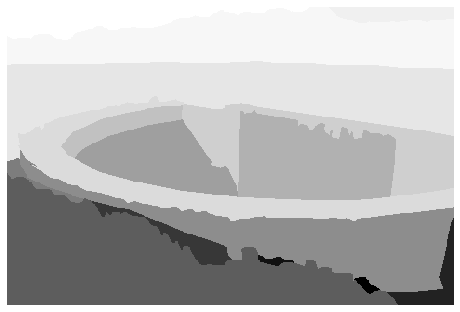

1.7476579821481244
for seg4


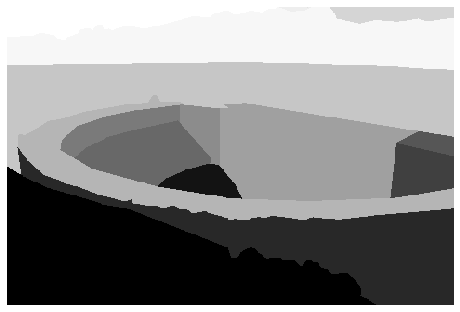

1.6863510042430934
for seg5


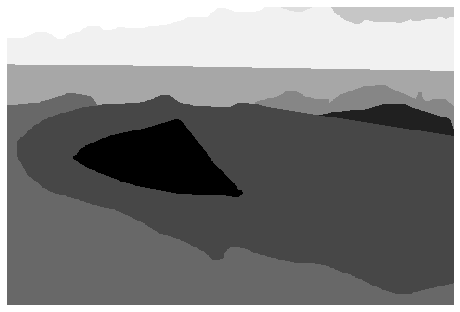

1.364237866599262
averagee of image 54= 1.483920827687043
for image55
for seg0


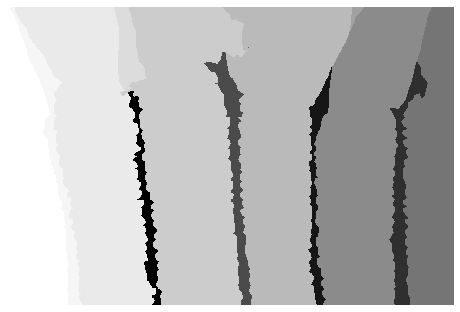

1.8214022242227885
for seg1


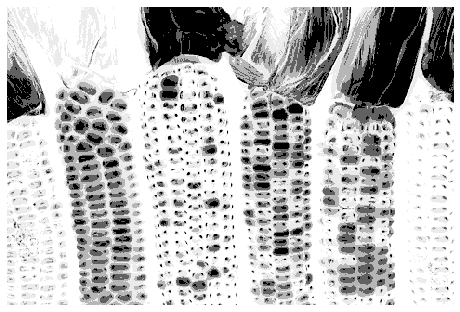

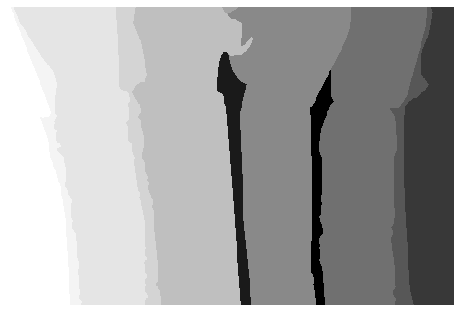

1.8259794716588185
for seg2


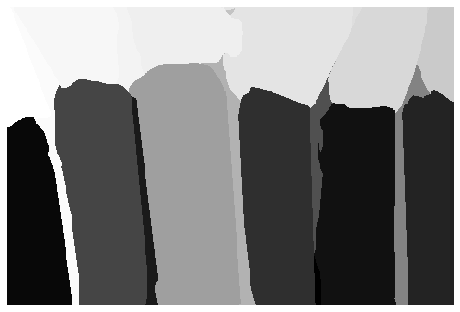

2.1588260297555446
for seg3


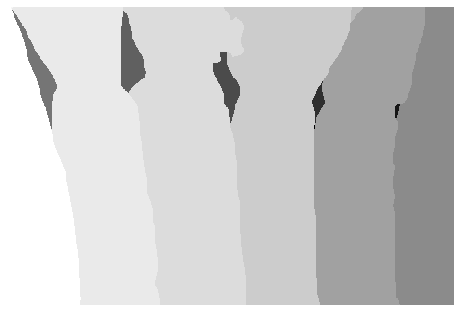

1.6982873549203337
for seg4


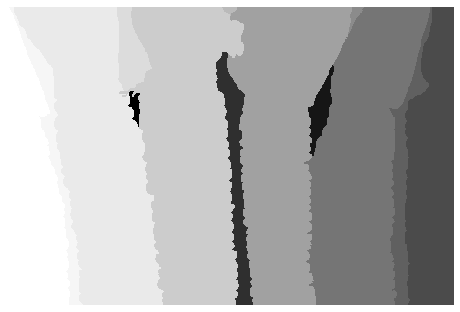

1.8184574722123767
for seg5


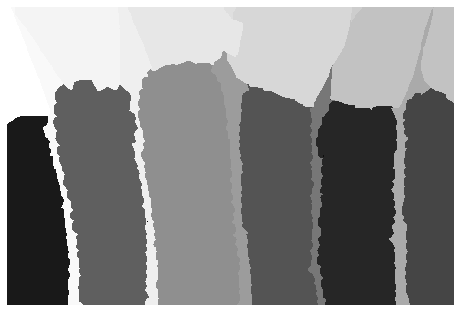

2.0928704571010996
for seg6


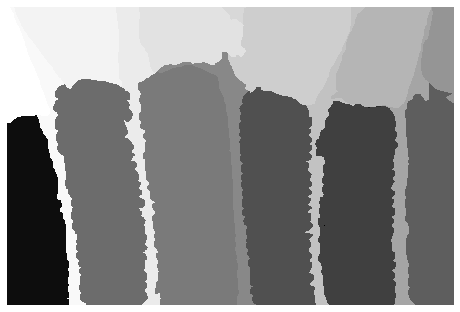

2.134394040464058
for seg7


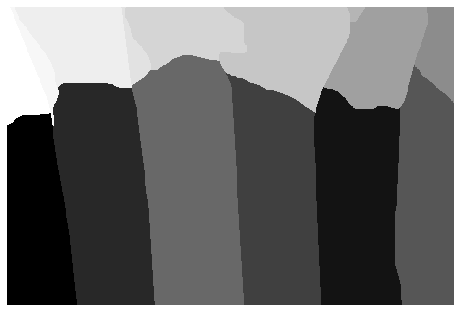

2.0122341397710515
for seg8


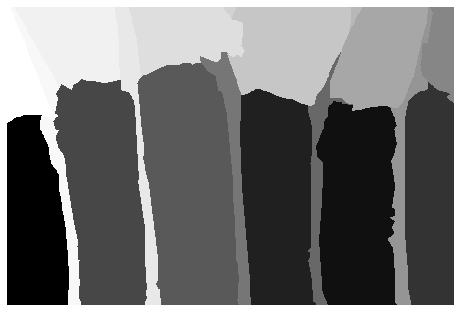

2.1503407796441505
averagee of image 55= 1.9680879966389133
for image56
for seg0


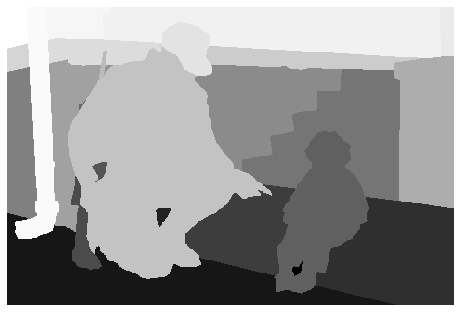

1.9220155533773131
for seg1


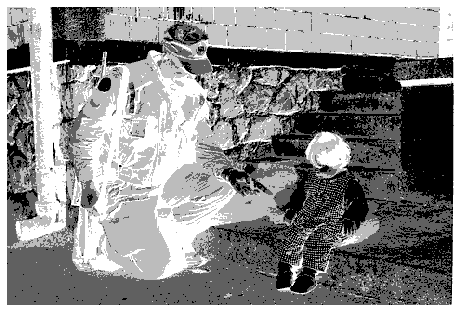

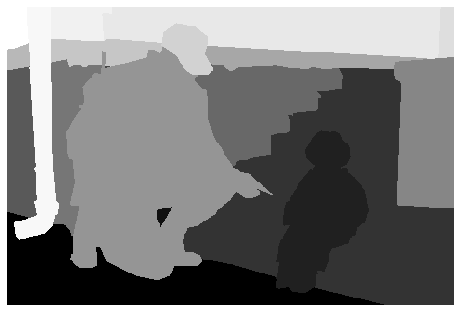

1.6614611280685665
for seg2


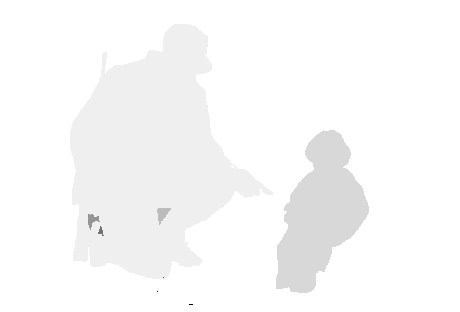

0.5881796789712078
for seg3


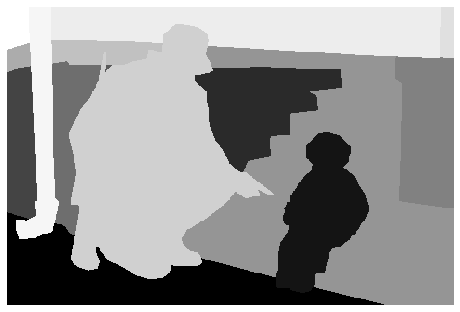

1.5472880461258192
for seg4


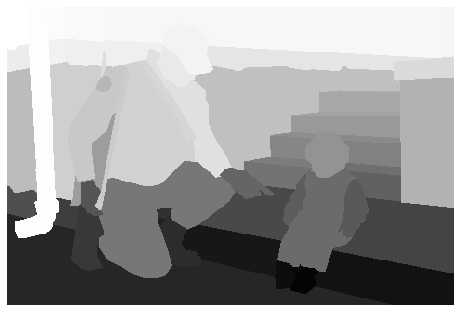

2.604122490695109
averagee of image 56= 1.6646133794476028
for image57
for seg0


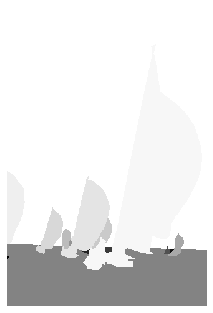

1.2069750819983258
for seg1


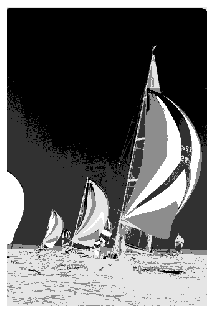

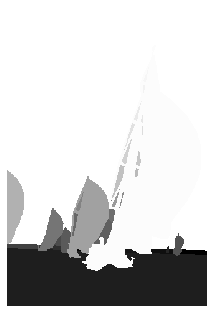

1.4972444861603666
for seg2


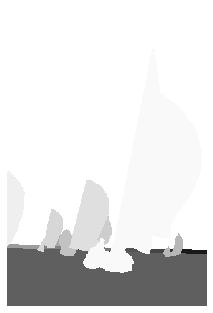

1.3030712302741791
for seg3


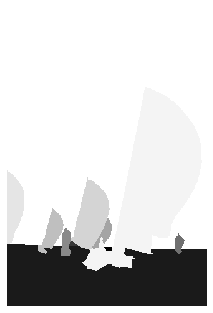

1.1973712014129667
for seg4


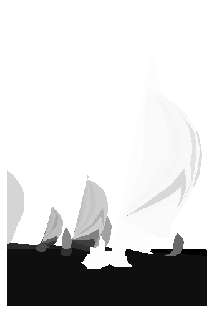

1.7473169766106915
for seg5


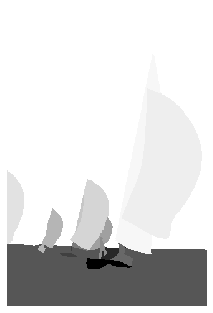

1.3467193011248657
averagee of image 57= 1.3831163795968993
for image58
for seg0


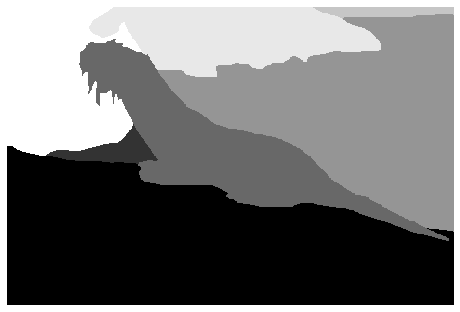

1.1983933996144656
for seg1


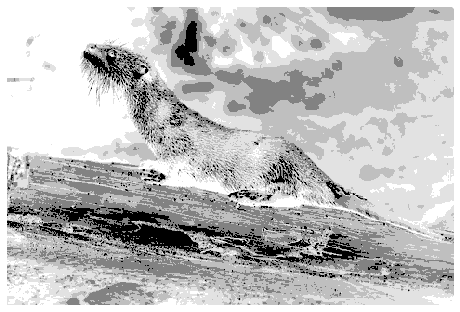

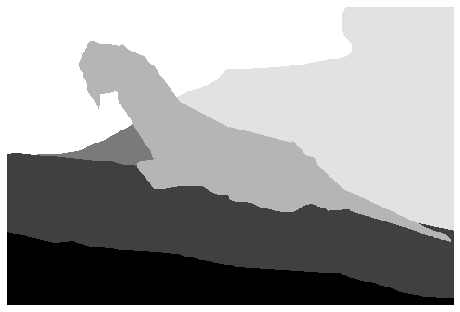

1.3239456251197015
for seg2


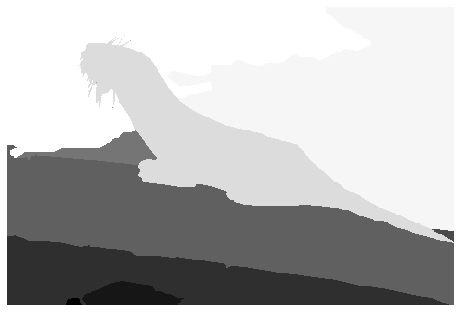

1.3499512529782667
for seg3


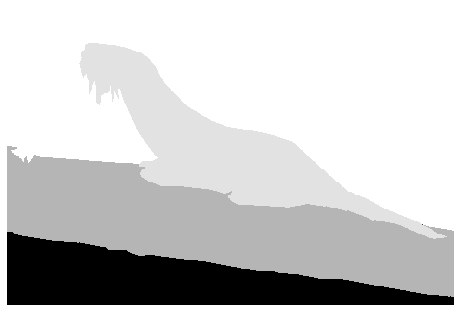

1.0348908293470547
for seg4


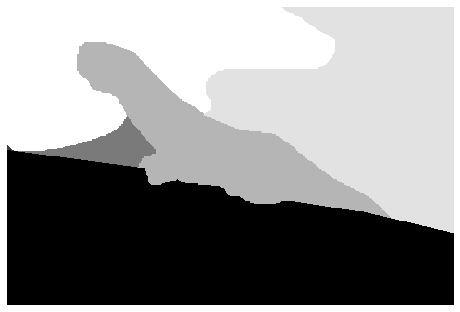

1.1294149893056284
averagee of image 58= 1.2073192192730233
for image59
for seg0


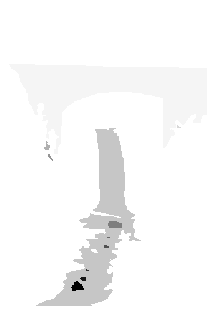

1.3348654896103194
for seg1


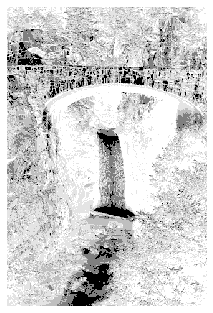

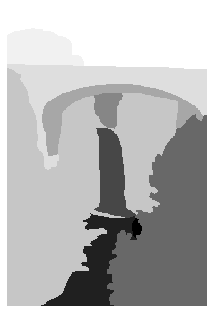

3.569969523900966
for seg2


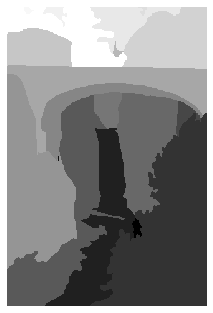

4.5426409837378605
for seg3


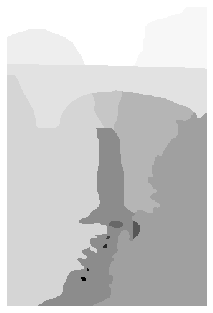

3.873556793314811
for seg4


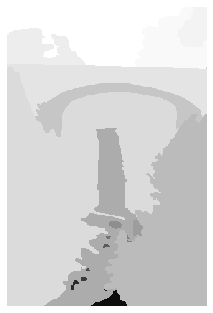

3.6462062998449354
for seg5


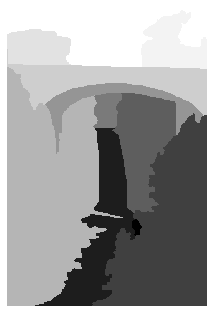

3.91073004164978
for seg6


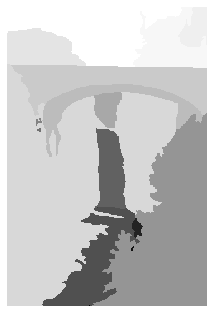

3.807336287266339
averagee of image 59= 3.526472202760716
for image60
for seg0


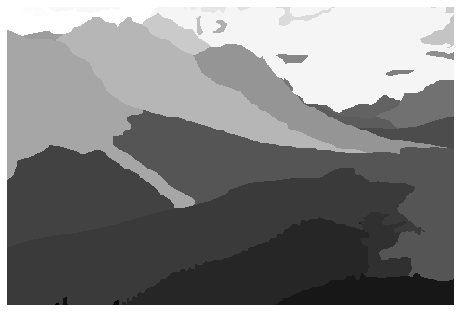

1.4392180612614451
for seg1


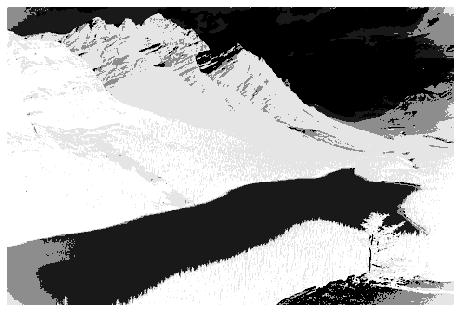

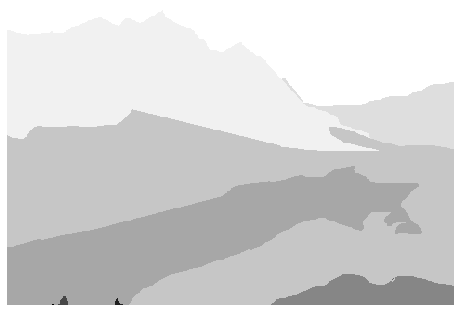

0.7778722169581849
for seg2


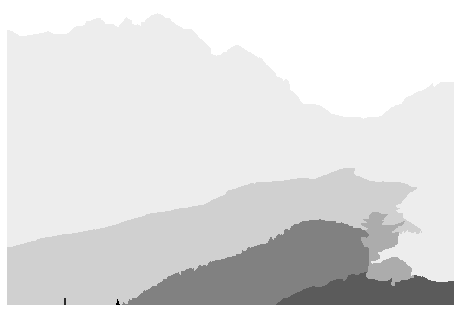

0.6285110608690341
for seg3


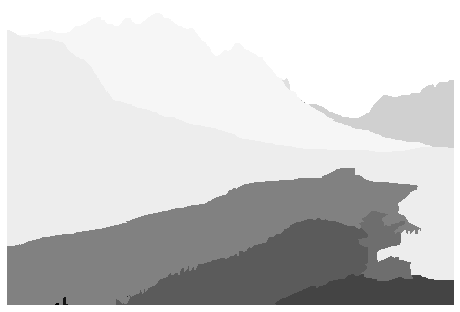

0.8732912326505364
for seg4


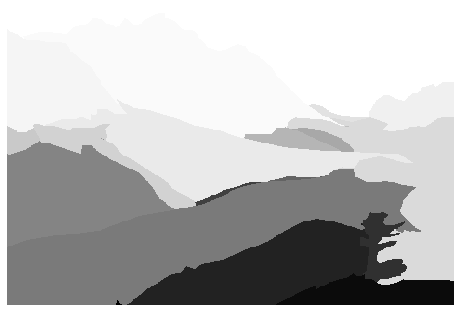

1.3838013860519265
for seg5


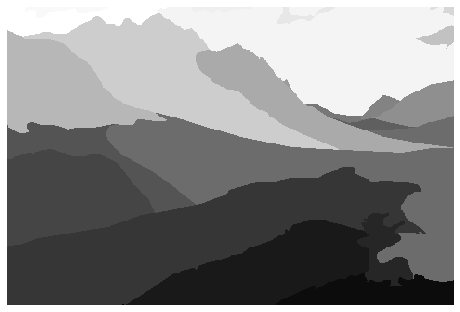

1.3792851783315099
averagee of image 60= 1.0803298560204395
for image61
for seg0


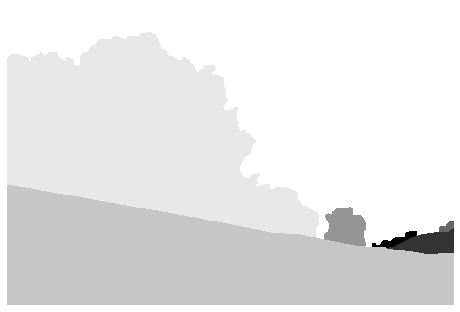

0.4911209635381955
for seg1


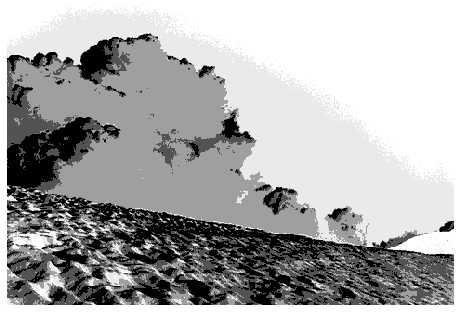

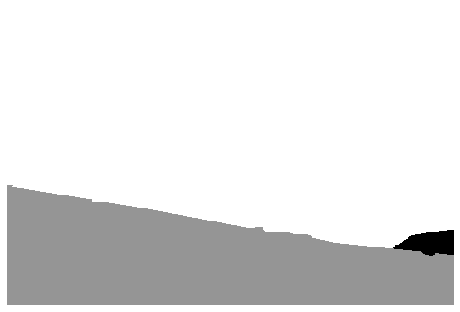

0.4049987208671612
for seg2


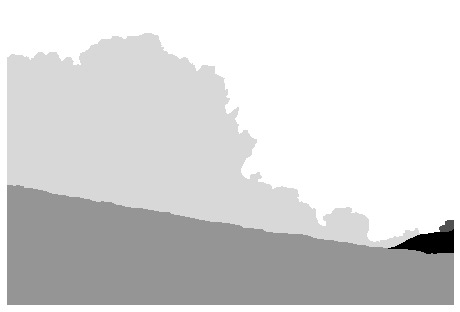

0.4436973742516409
for seg3


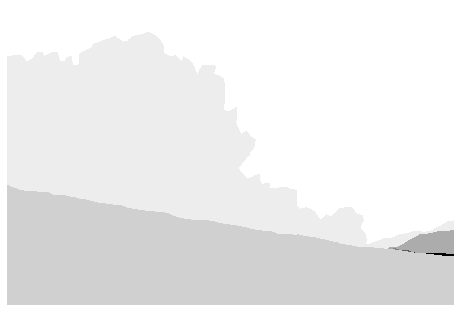

0.4489990738244118
for seg4


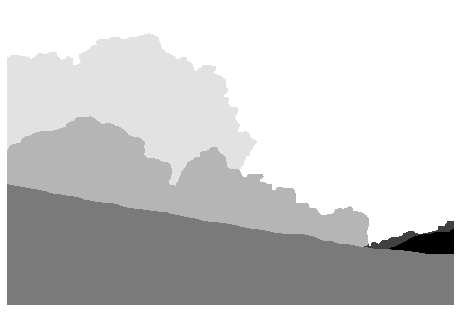

0.6559720126949407
averagee of image 61= 0.48895762903527
for image62
for seg0


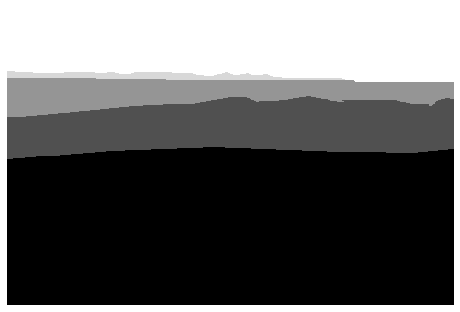

0.6162130219496866
for seg1


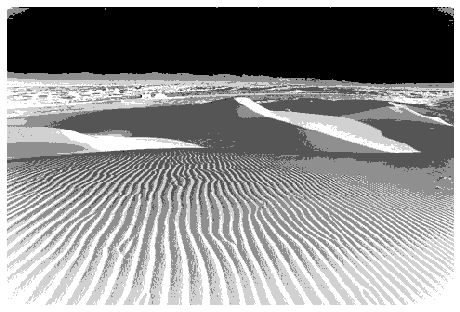

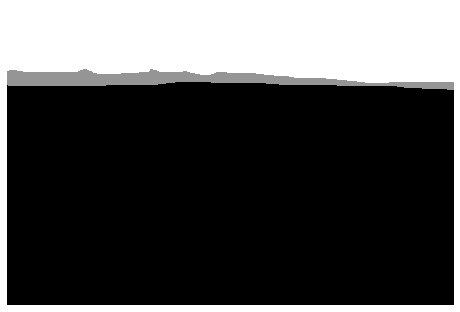

0.13513943728994934
for seg2


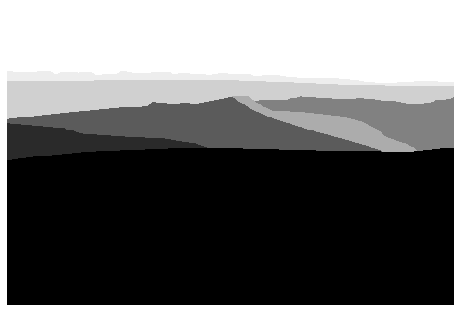

0.7515800048360681
for seg3


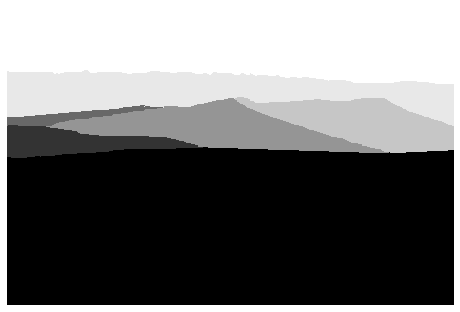

0.730942954791181
for seg4


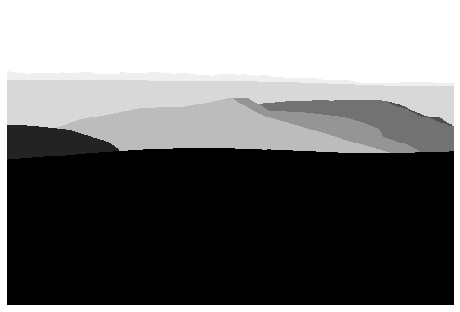

0.7498332461408386
averagee of image 62= 0.5967417330015448
for image63
for seg0


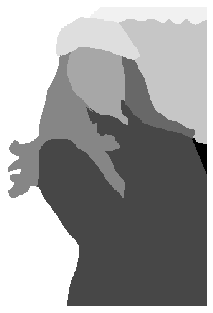

2.7940057815212684
for seg1


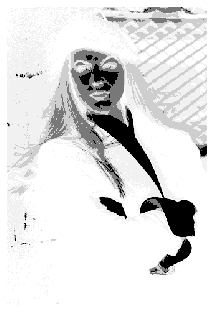

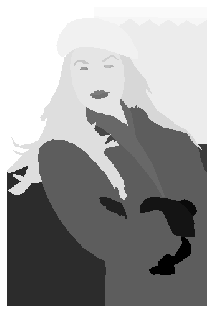

3.352262579309035
for seg2


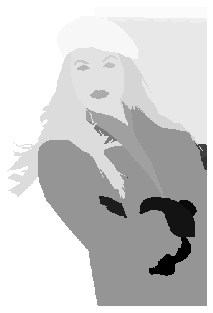

3.0165282771062176
for seg3


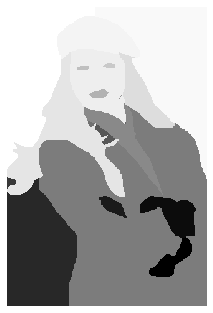

3.190231666679126
for seg4


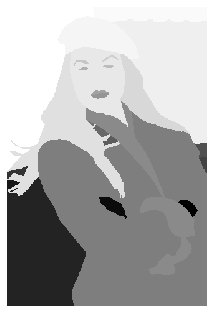

3.1906149631433167
averagee of image 63= 3.108728653551793
for image64
for seg0


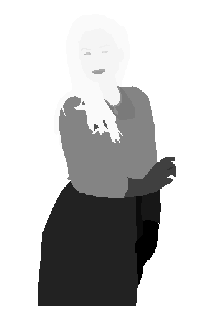

2.224793778686765
for seg1


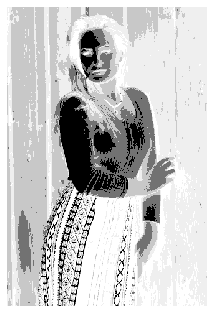

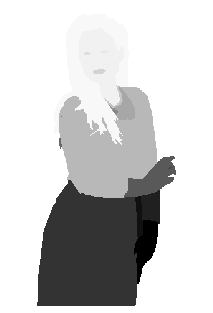

2.215896597428071
for seg2


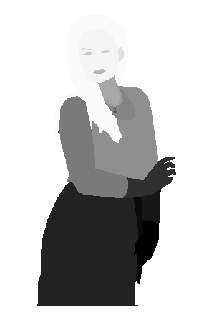

2.3769199128743668
for seg3


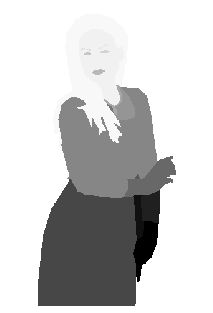

2.2031210558356524
for seg4


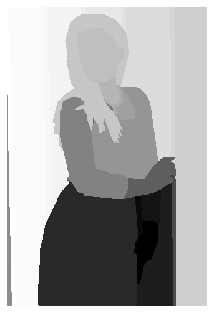

4.161121321612828
for seg5


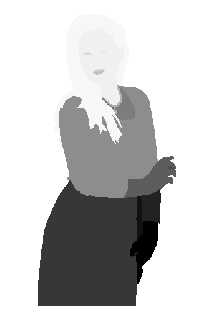

2.2094115686937053
averagee of image 64= 2.565210705855231
for image65
for seg0


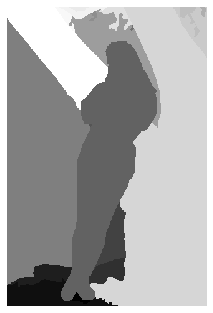

2.5628328945327423
for seg1


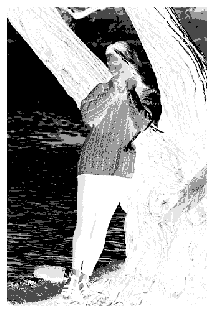

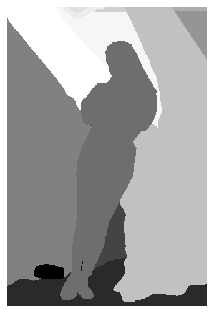

2.585199356502622
for seg2


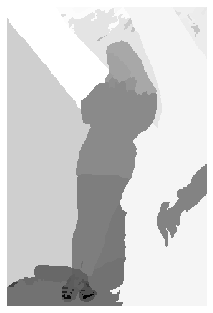

3.1046808402175587
for seg3


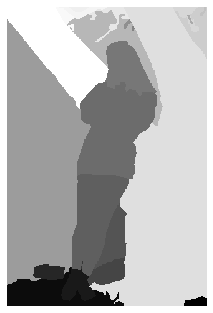

2.912559926438164
for seg4


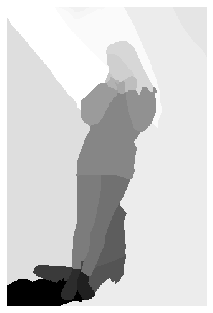

3.0863779976722068
averagee of image 65= 2.8503302030726583
for image66
for seg0


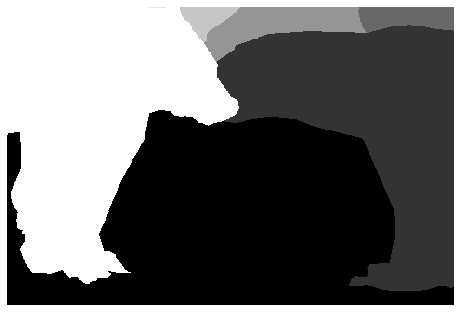

0.7163136175244382
for seg1


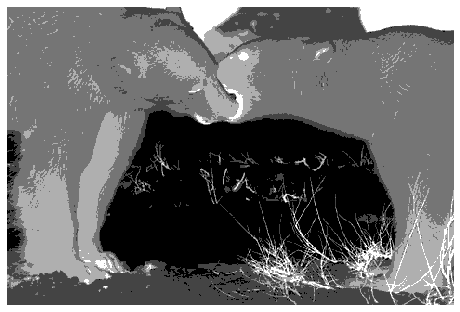

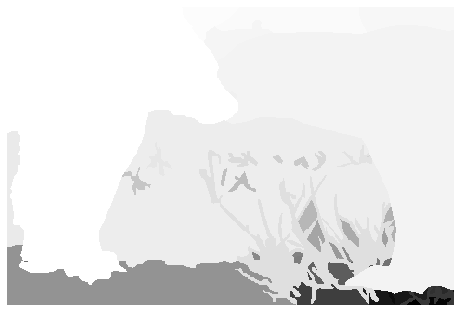

1.148105203389043
for seg2


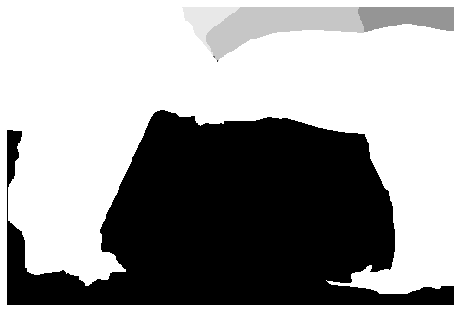

0.36887826949143415
for seg3


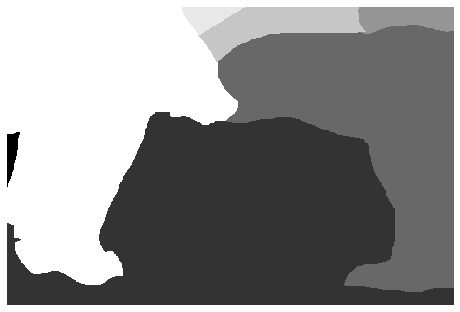

0.7474357070720928
for seg4


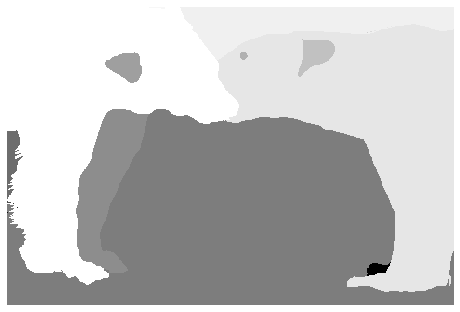

0.8914268796167478
averagee of image 66= 0.7744319354187512
for image67
for seg0


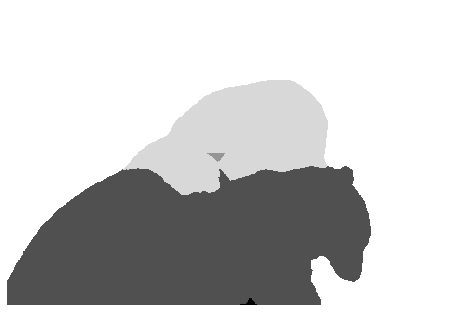

0.7523320799409972
for seg1


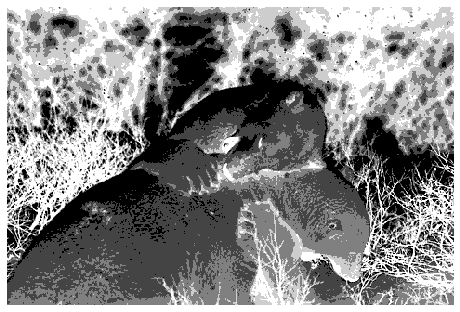

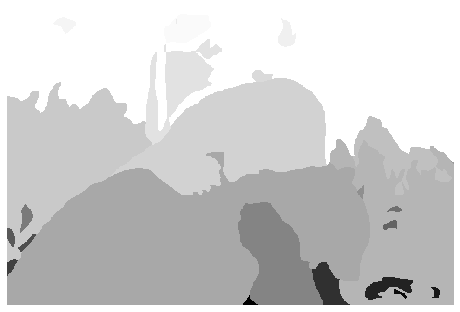

1.526699993089068
for seg2


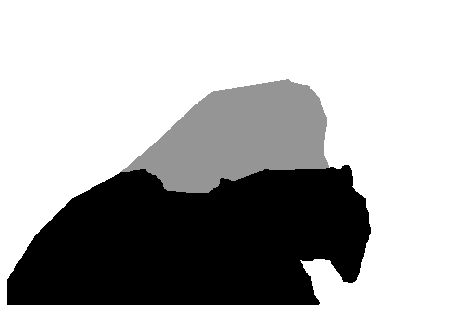

0.7437190713548936
for seg3


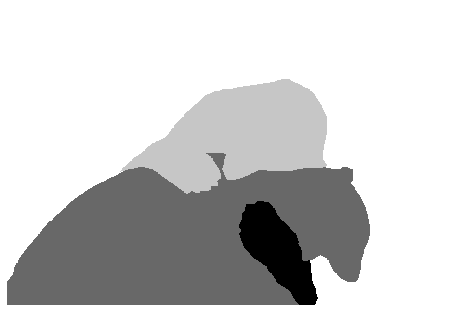

0.8115375138956911
for seg4


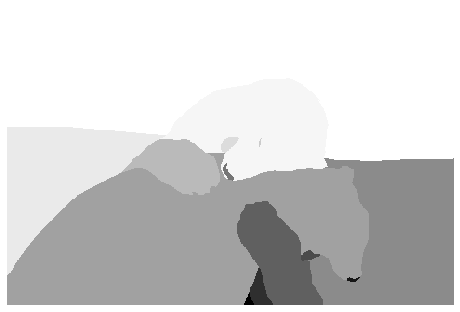

1.3627406778629254
for seg5


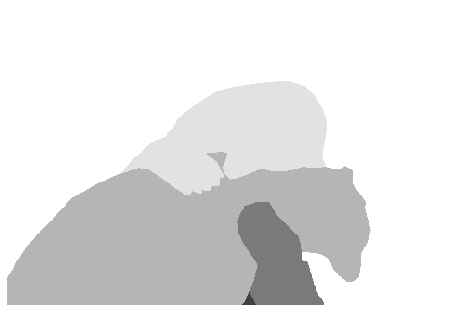

0.8155635567602816
averagee of image 67= 1.002098815483976
for image68
for seg0


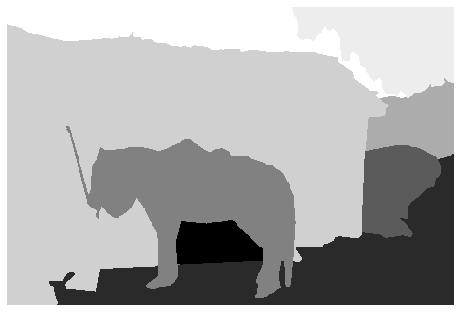

1.247091836917453
for seg1


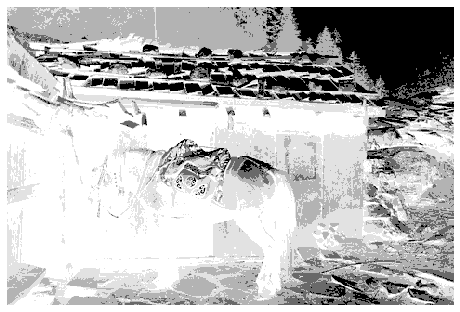

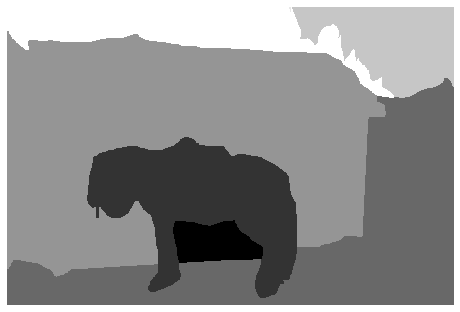

1.0886245437311532
for seg2


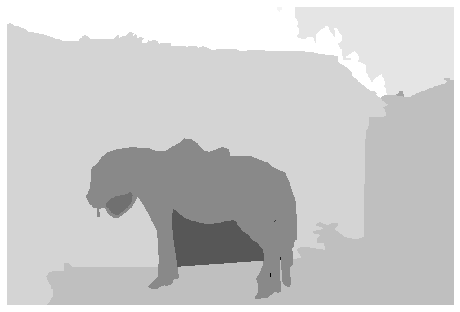

1.0930303918999191
for seg3


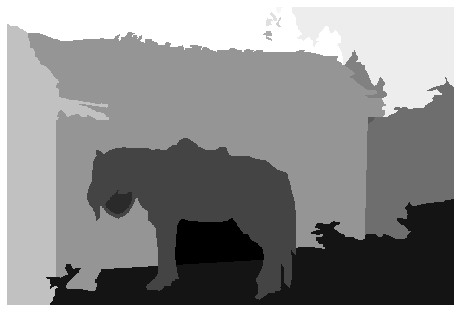

1.4633767723009319
for seg4


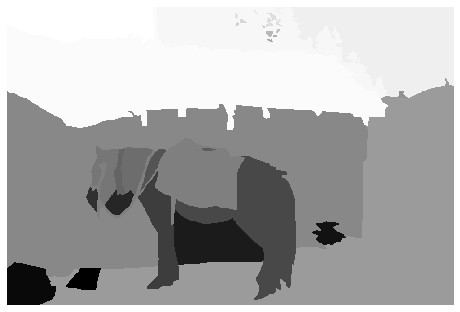

1.6065699053071811
averagee of image 68= 1.2997386900313277
for image69
for seg0


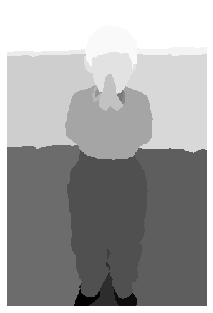

3.287001898211256
for seg1


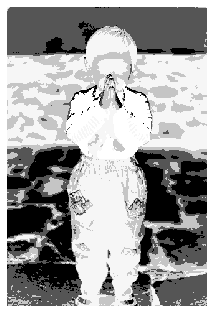

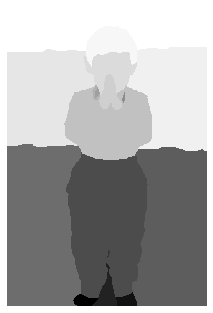

3.243128995471168
for seg2


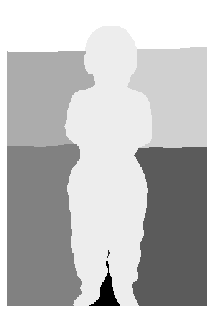

2.648308497578369
for seg3


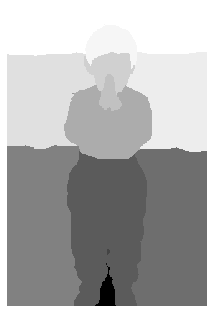

3.0927164124454674
for seg4


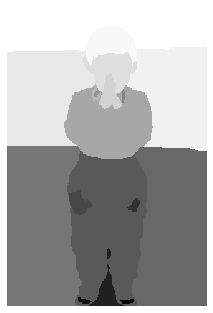

3.2673747564552538
for seg5


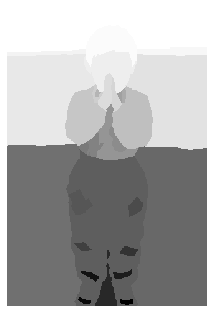

3.6065035219248074
for seg6


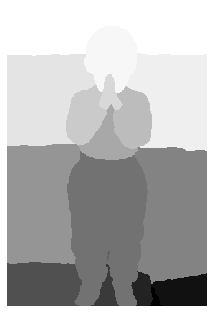

3.5990010518792457
averagee of image 69= 3.249147876280795
for image70
for seg0


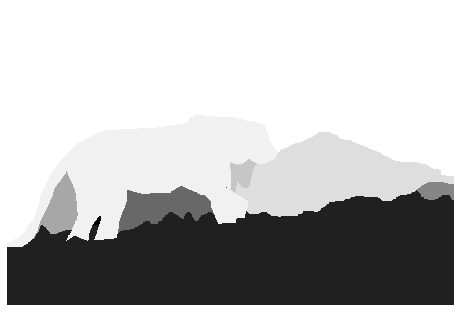

0.9386417724799146
for seg1


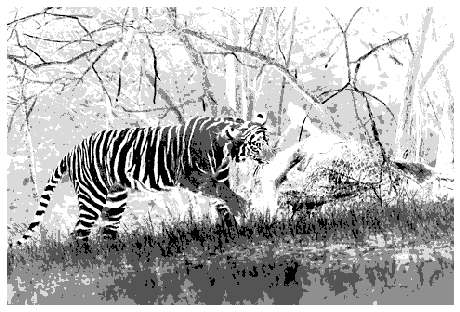

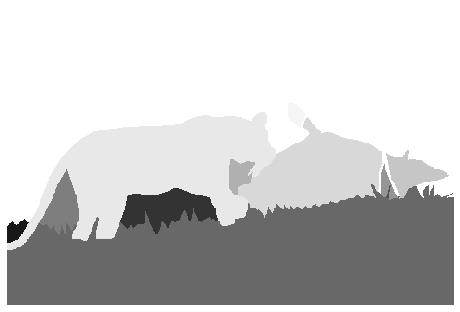

0.989310456764782
for seg2


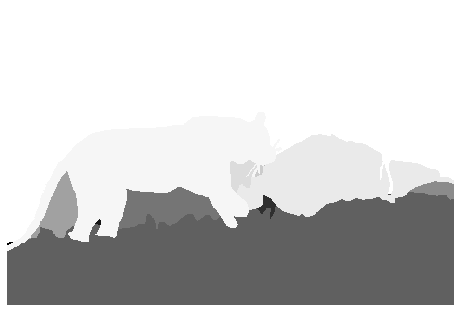

0.9473691851716574
for seg3


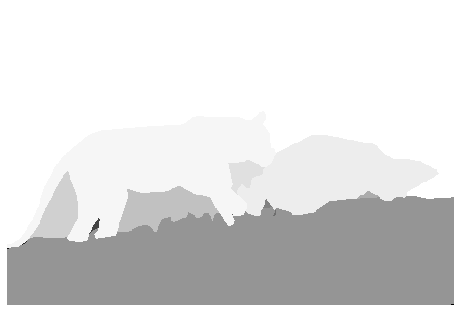

0.9354003245278688
for seg4


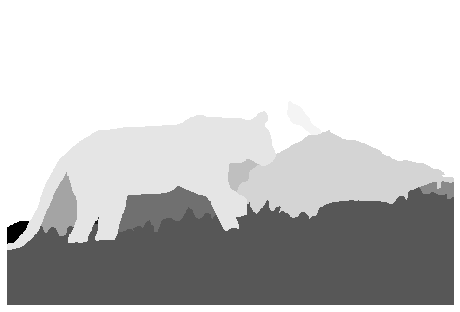

0.9748409015449931
averagee of image 70= 0.9571125280978432
for image71
for seg0


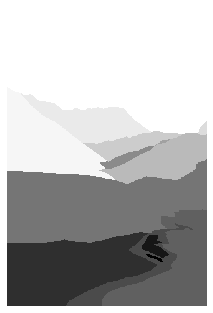

2.5564876936015306
for seg1


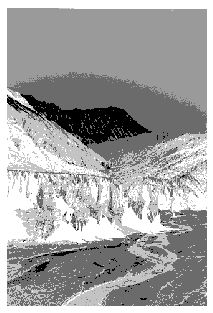

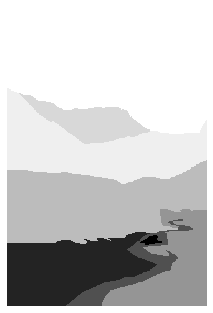

2.219665444318141
for seg2


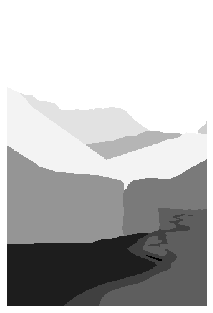

2.558085295694014
for seg3


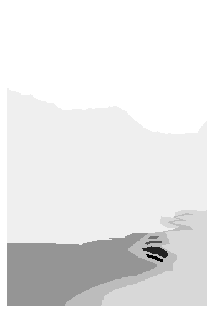

1.6721549143171361
for seg4


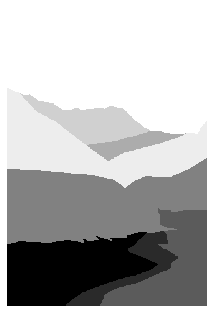

2.281803858212764
for seg5


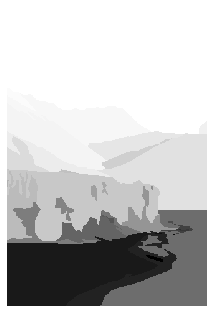

3.1459954330852953
averagee of image 71= 2.4056987732048136
for image72
for seg0


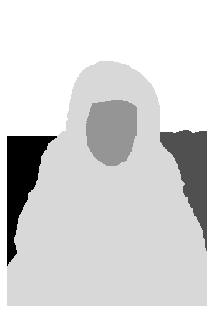

2.14616463266763
for seg1


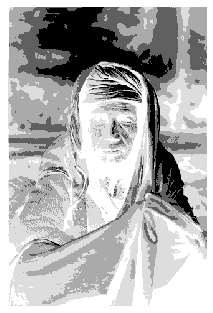

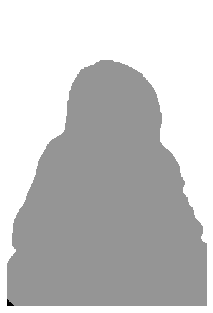

1.267654195261299
for seg2


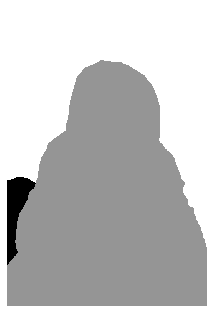

1.4176957981039597
for seg3


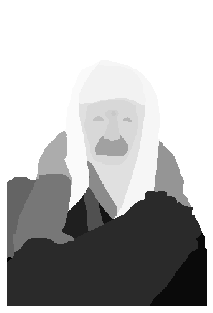

3.7157444014933376
for seg4


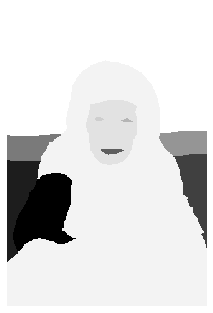

2.5735135500942743
averagee of image 72= 2.2241545155241003
for image73
for seg0


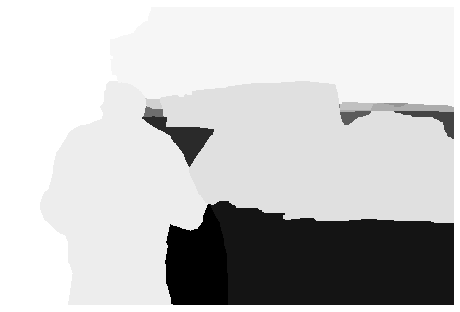

1.2387464482292256
for seg1


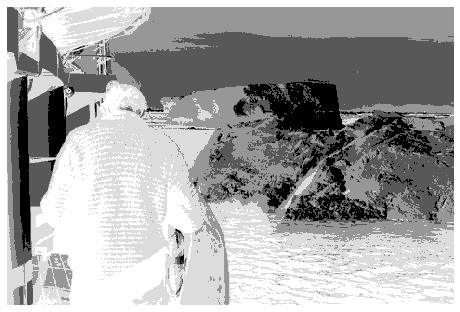

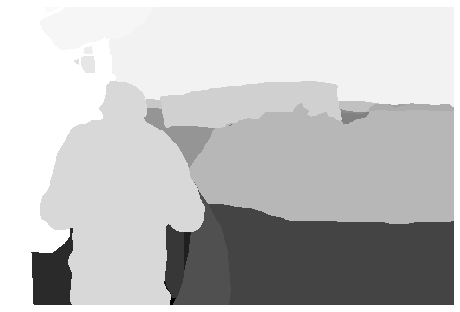

1.430685467276187
for seg2


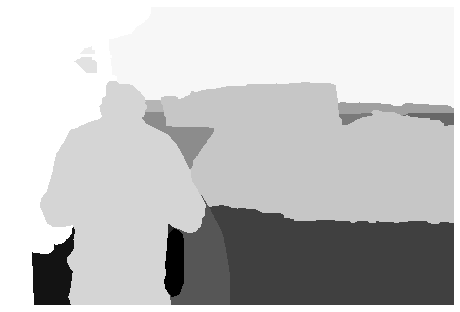

1.2977202703935795
for seg3


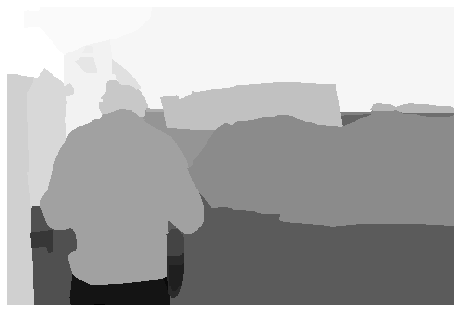

1.5928955765427142
for seg4


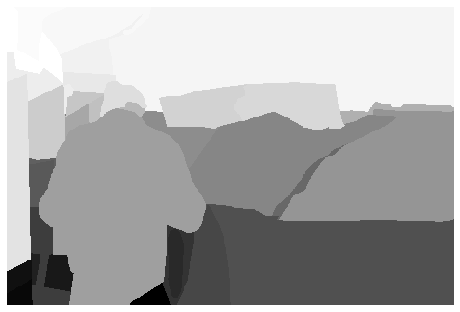

1.811623953616071
for seg5


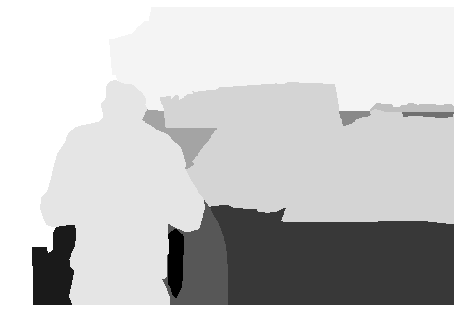

1.2650225912957827
averagee of image 73= 1.4394490512255933
for image74
for seg0


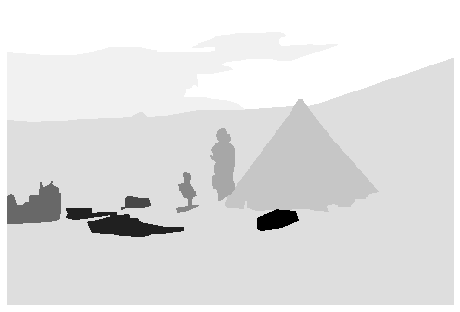

0.9302336662087912
for seg1


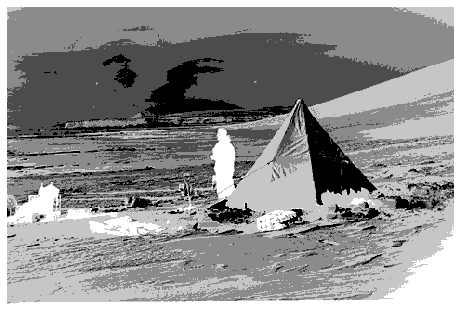

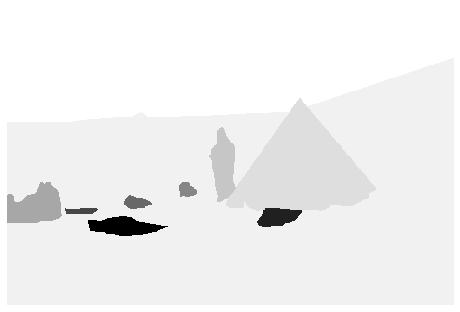

0.7934613292835608
for seg2


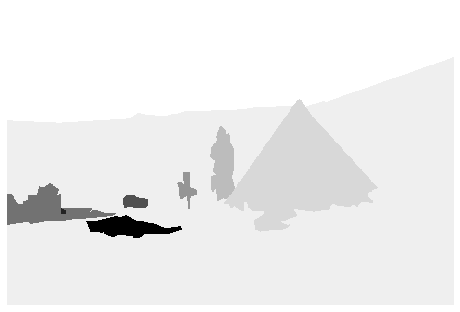

0.7984550650644284
for seg3


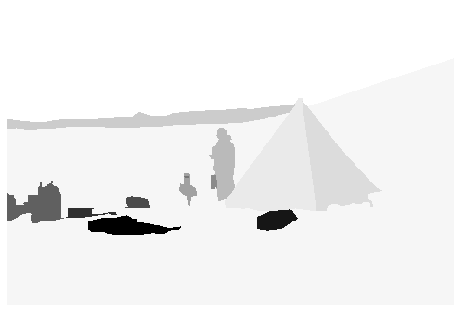

0.8931178715640471
for seg4


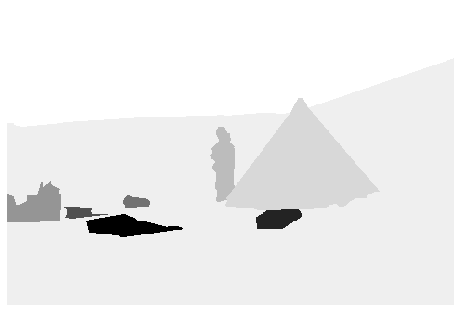

0.7933803243956403
averagee of image 74= 0.8417296513032936
for image75
for seg0


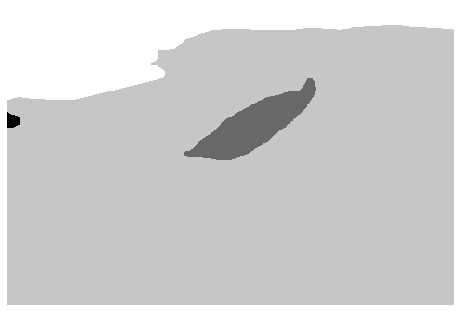

0.3356593010773819
for seg1


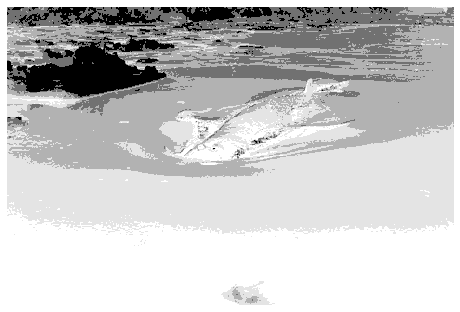

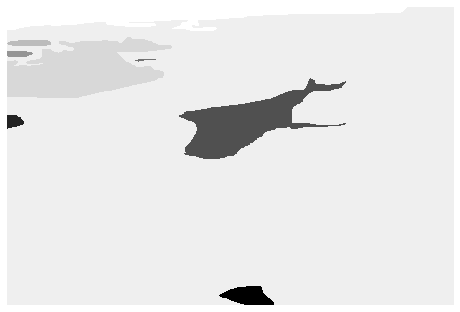

0.3727258021879256
for seg2


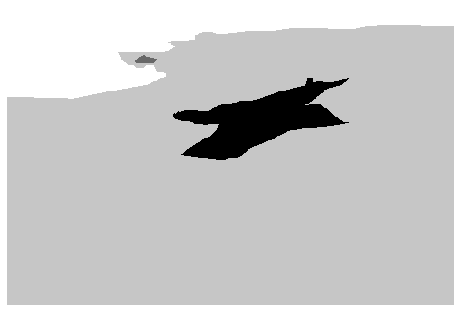

0.3697234995345419
for seg3


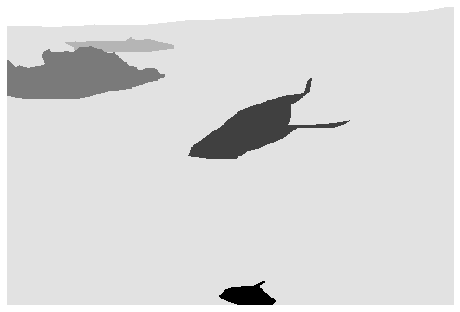

0.346963188520842
for seg4


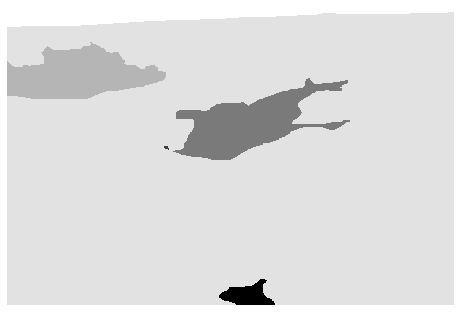

0.3831059899246845
averagee of image 75= 0.3616355562490752
for image76
for seg0


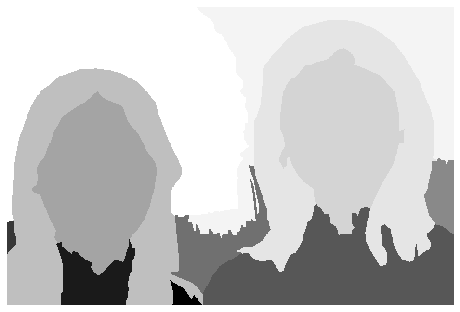

1.6035334786905466
for seg1


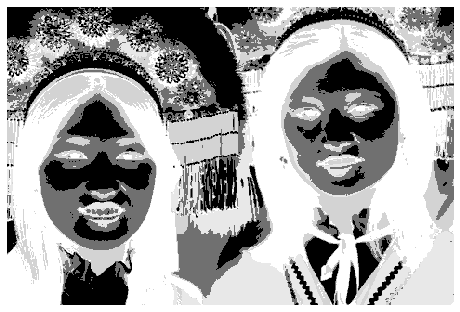

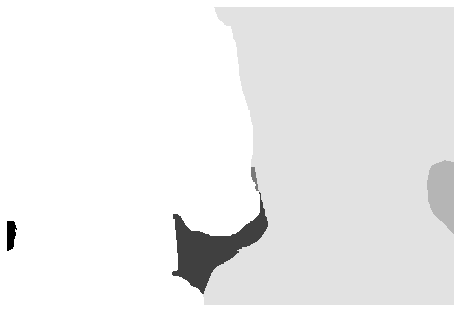

0.7844273720046675
for seg2


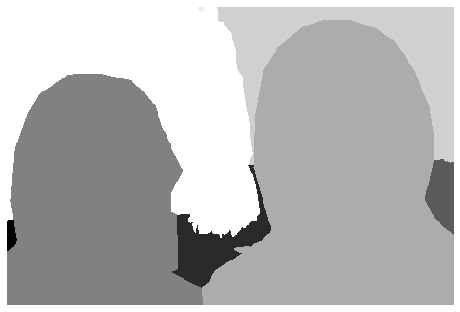

1.2578915744135535
for seg3


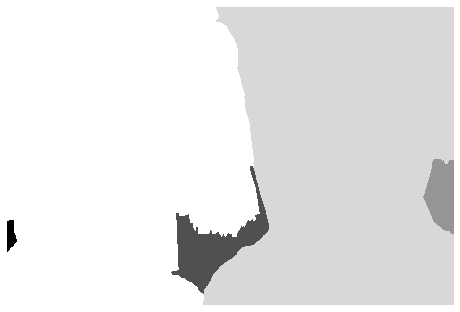

0.7875616587862195
for seg4


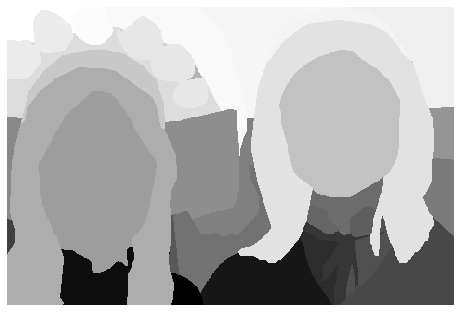

2.270956779700588
averagee of image 76= 1.3408741727191154
for image77
for seg0


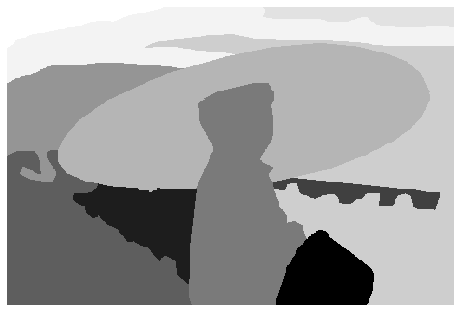

1.4898069235379736
for seg1


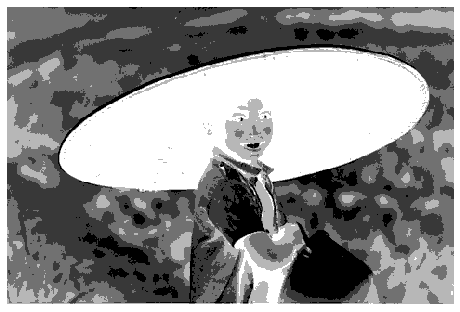

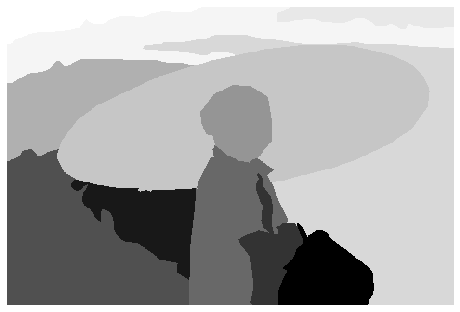

1.5154182964602765
for seg2


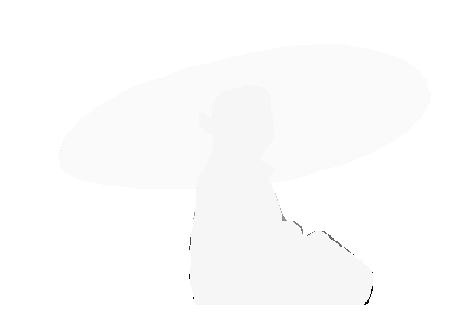

0.4806874532832845
for seg3


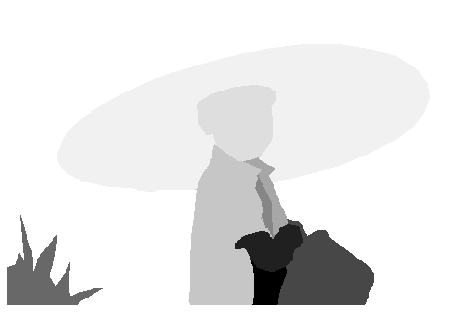

0.7425040634691318
for seg4


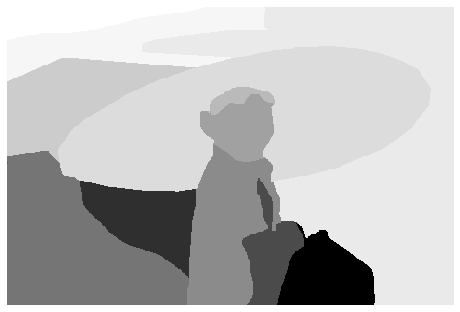

1.4516342559903588
averagee of image 77= 1.136010198548205
for image78
for seg0


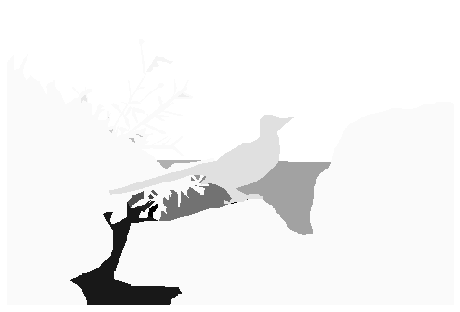

0.8857278768920355
for seg1


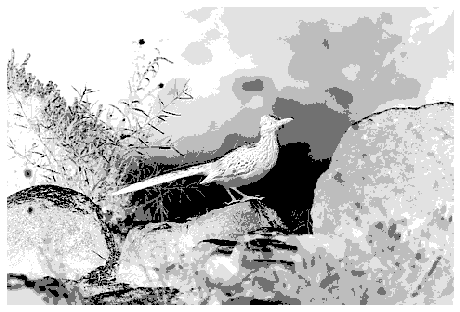

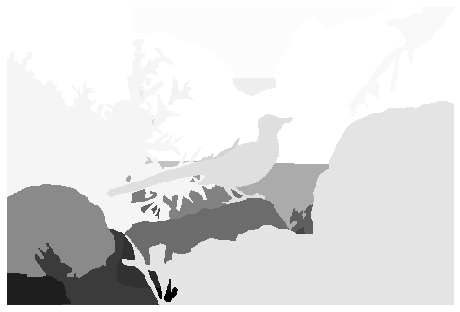

1.7444250767098224
for seg2


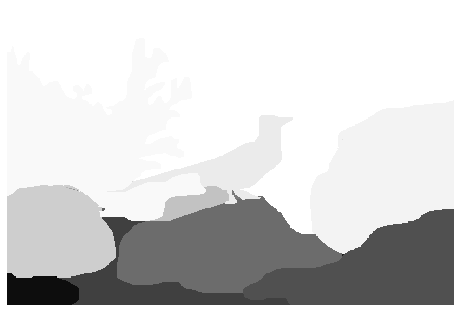

1.6589506386622026
for seg3


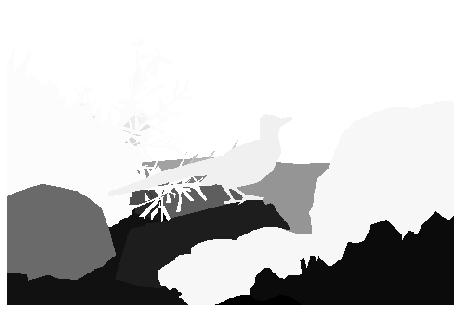

1.6543272801077693
for seg4


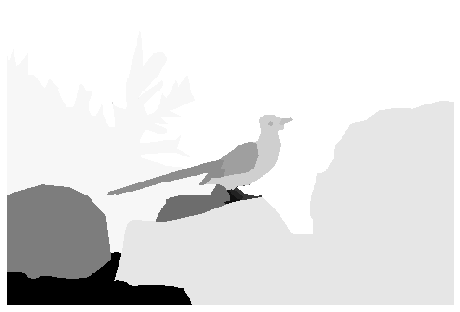

1.3366751136800112
averagee of image 78= 1.4560211972103683
for image79
for seg0


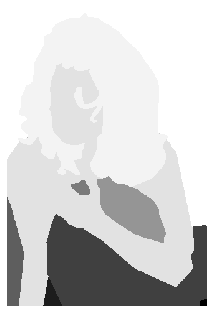

2.307525924289469
for seg1


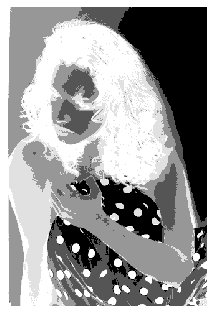

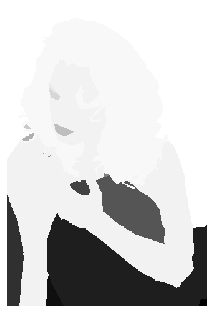

2.2948814581954453
for seg2


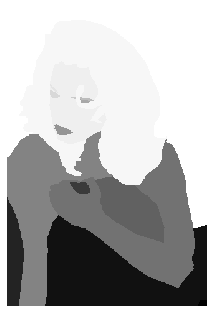

2.7875159616798495
for seg3


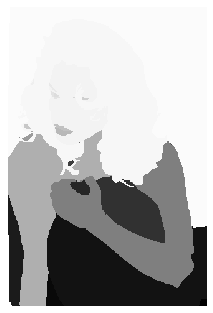

2.8229561794610687
for seg4


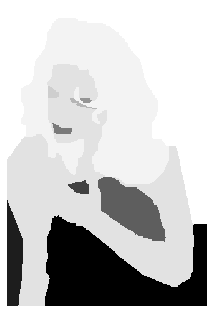

2.3250943411817255
averagee of image 79= 2.507594772961512
for image80
for seg0


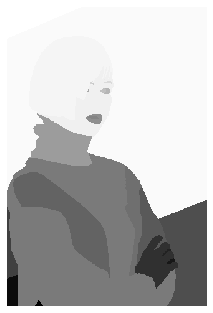

2.549308007839362
for seg1


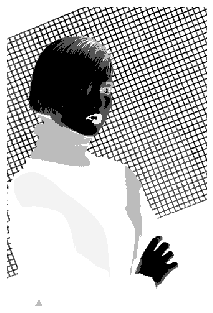

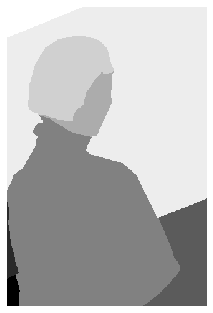

2.257067596135485
for seg2


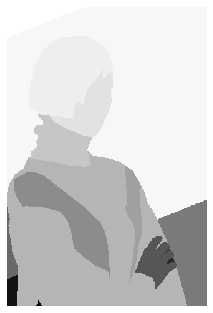

2.3699859823753697
for seg3


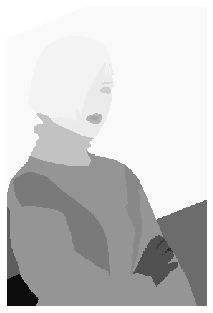

2.466225626064388
for seg4


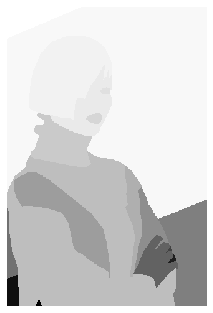

2.533221412650984
for seg5


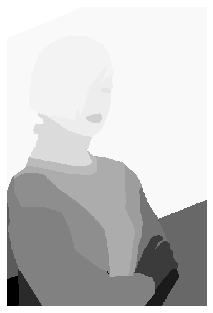

3.11061807335005
averagee of image 80= 2.547737783069273
for image81
for seg0


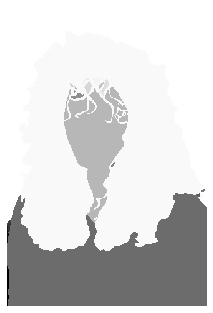

1.3993006235802845
for seg1


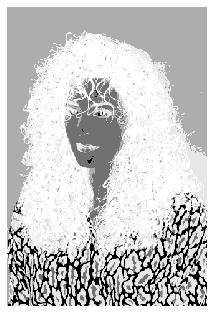

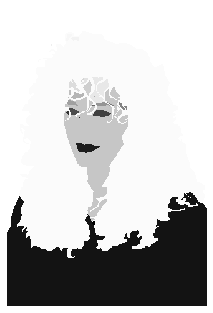

1.4490765305371274
for seg2


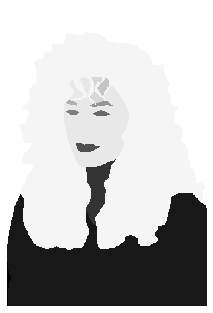

1.5586866799388344
for seg3


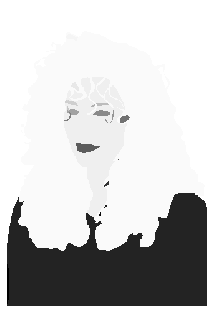

1.4347401873345025
for seg4


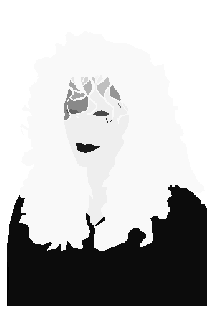

1.5338115055171901
averagee of image 81= 1.4751231053815876
for image82
for seg0


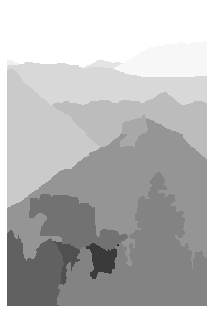

2.7269495593889164
for seg1


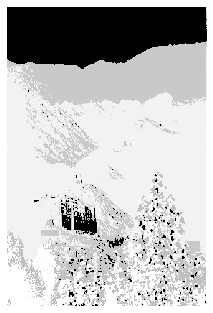

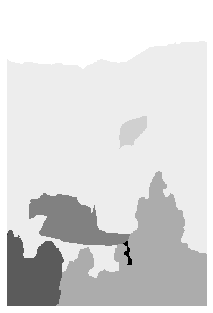

1.2382881520316984
for seg2


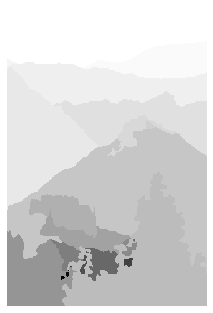

2.8268441868789256
for seg3


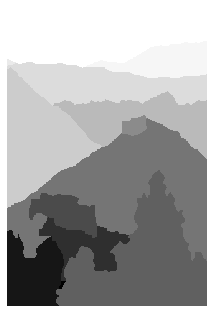

2.657849002578625
for seg4


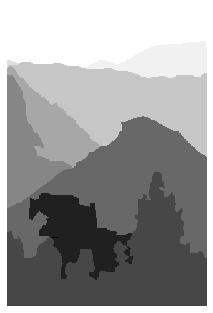

2.3585784531379765
averagee of image 82= 2.3617018708032282
for image83
for seg0


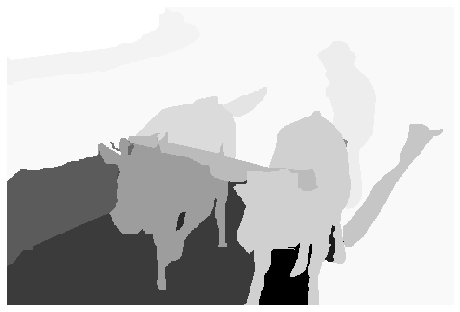

1.6764256264961321
for seg1


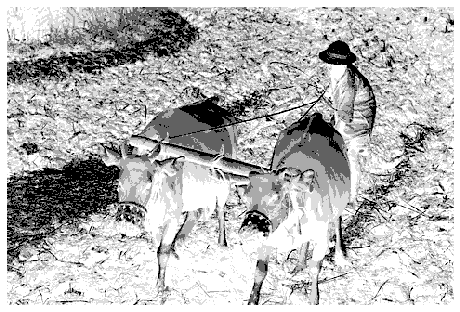

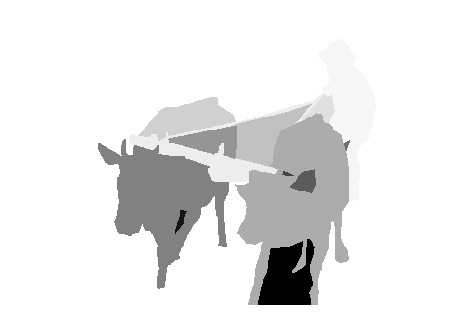

1.03921558720712
for seg2


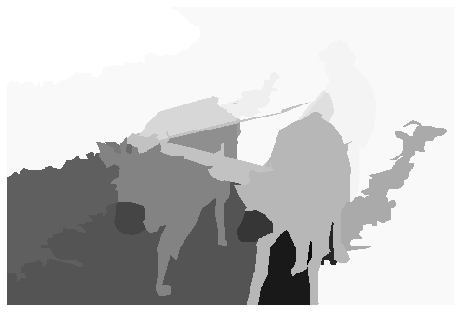

1.7575288326800382
for seg3


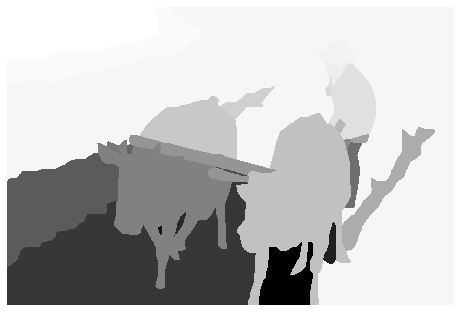

1.6989908302851964
for seg4


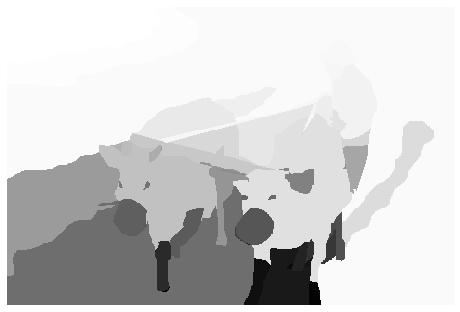

2.026197358871357
averagee of image 83= 1.6396716471079689
for image84
for seg0


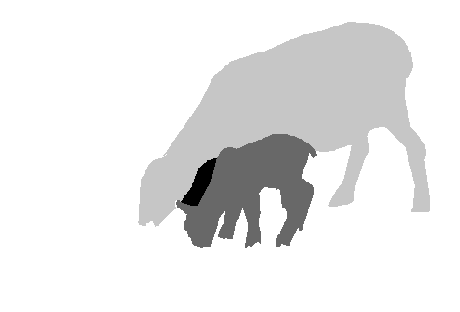

0.5418181699875098
for seg1


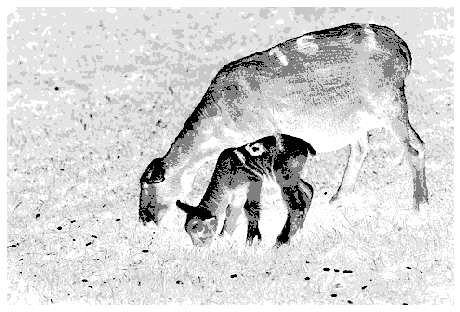

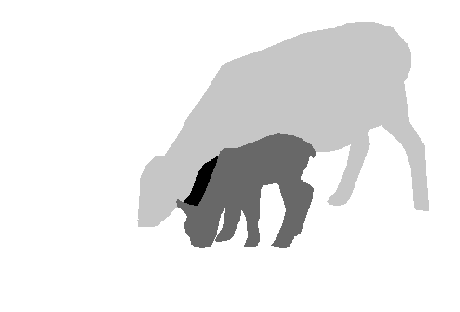

0.5430703391120372
for seg2


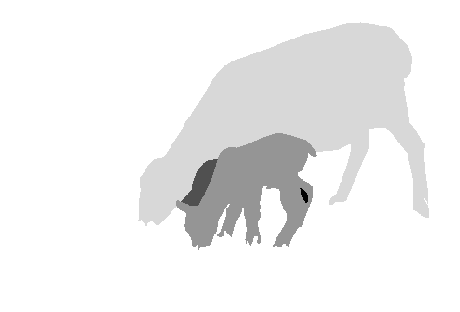

0.5343742136971862
for seg3


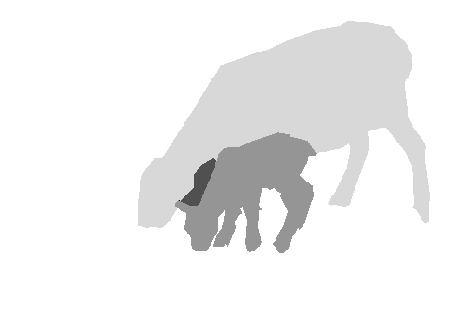

0.5530709199521566
for seg4


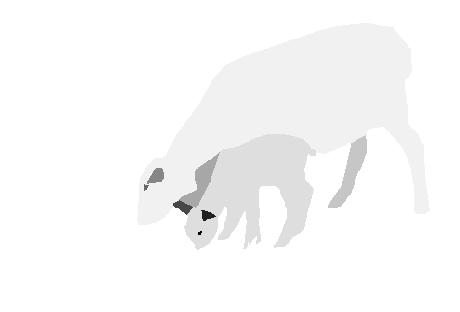

0.5839874994811496
averagee of image 84= 0.5512642284460079
for image85
for seg0


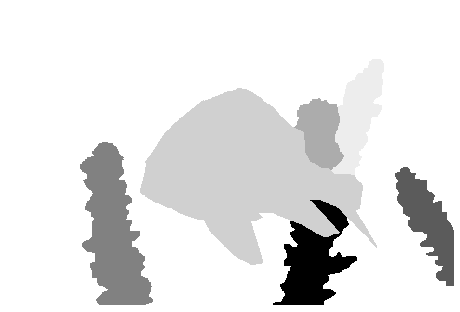

0.9330063569268191
for seg1


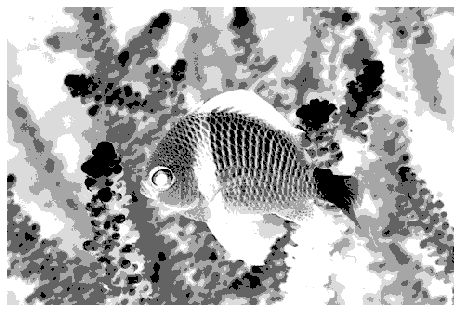

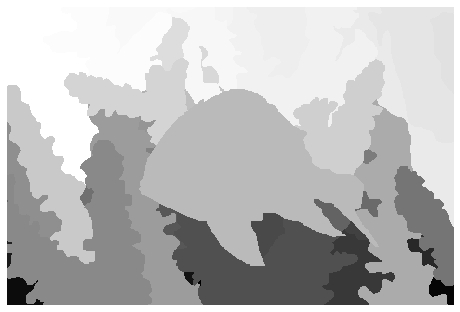

2.470288000978181
for seg2


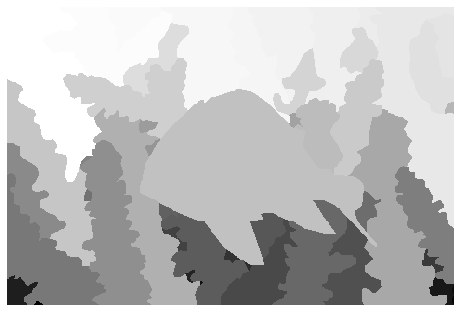

2.6575685129696414
for seg3


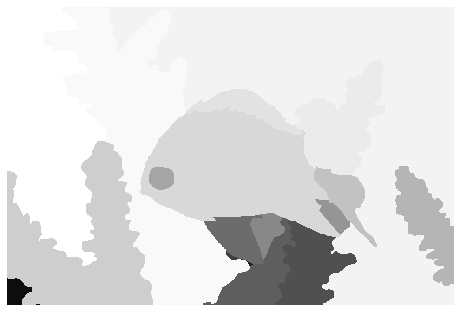

1.7429306890923821
for seg4


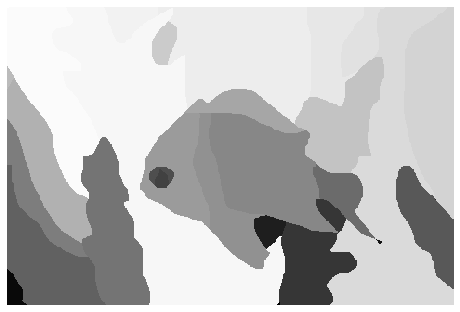

2.3612552382927605
averagee of image 85= 2.033009759651957
for image86
for seg0


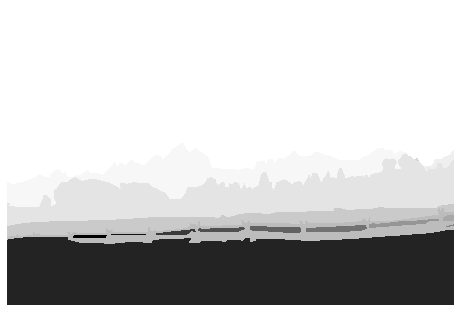

0.6676631284411065
for seg1


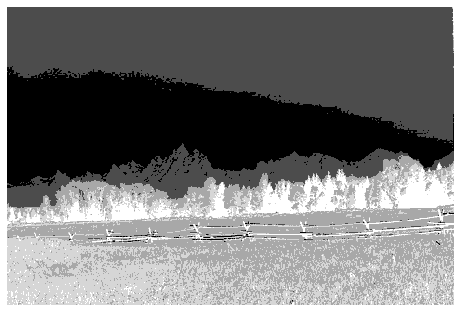

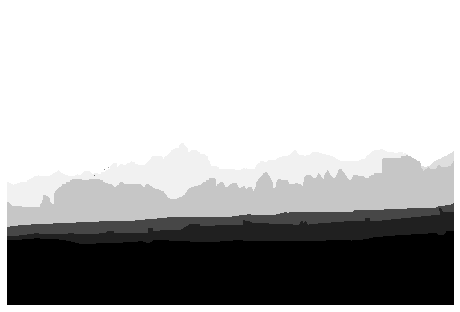

0.6315245392536235
for seg2


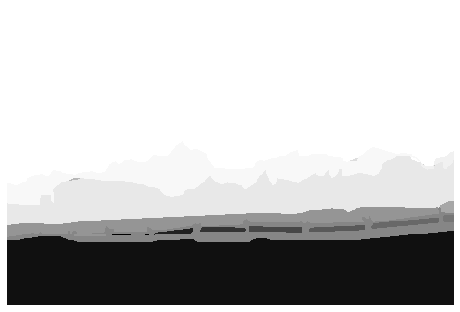

0.6948326983626912
for seg3


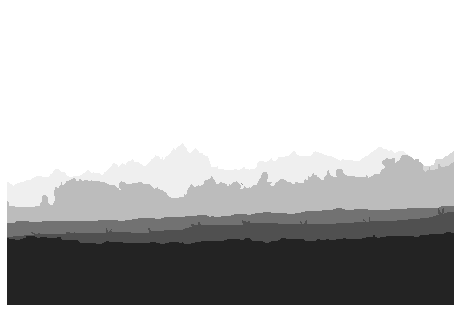

0.6307486273023852
for seg4


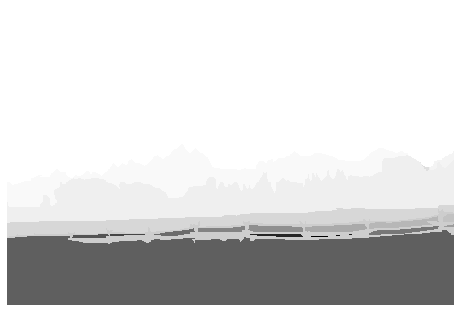

0.6766970087799319
for seg5


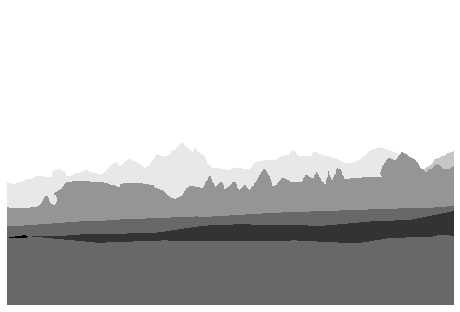

0.551217319237146
for seg6


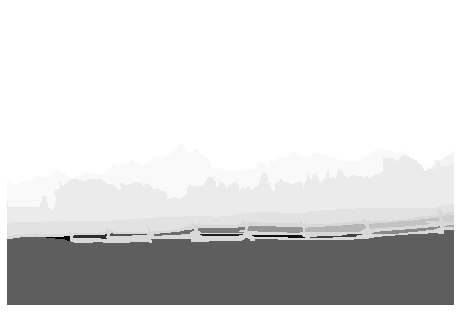

0.6824941733462107
averagee of image 86= 0.6478824992461564
for image87
for seg0


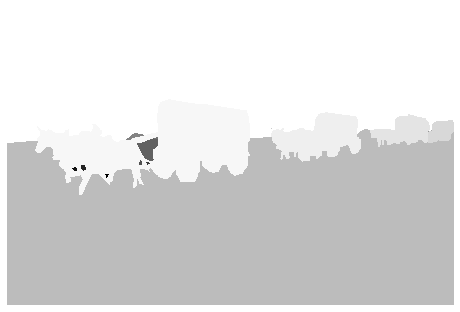

0.458158873606184
for seg1


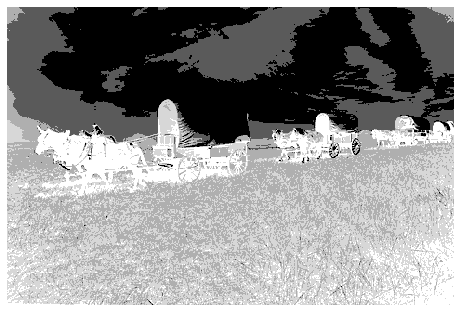

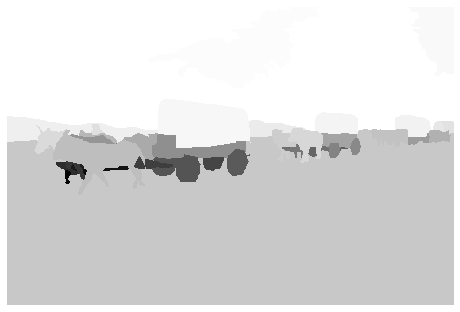

0.805618986546303
for seg2


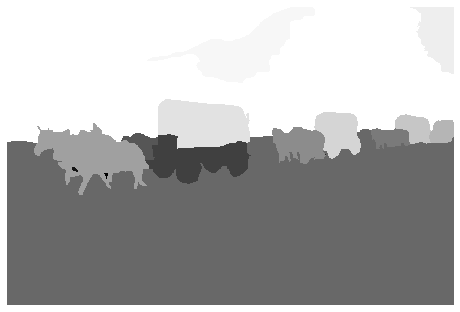

0.6699770742548733
for seg3


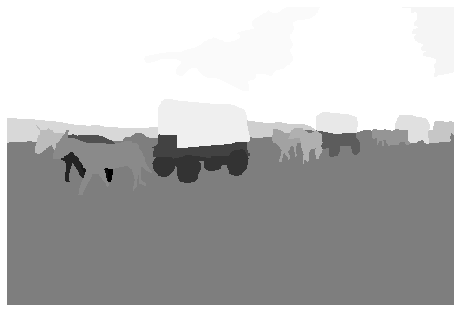

0.7544864918381906
for seg4


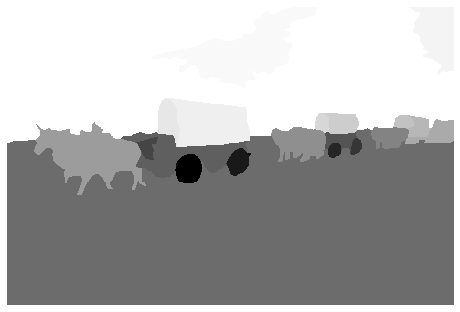

0.7269326969130923
for seg5


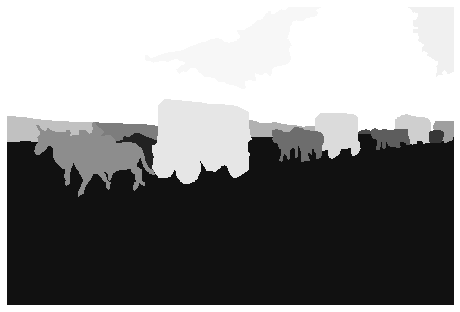

0.7289218572663916
averagee of image 87= 0.6906826634041724
for image88
for seg0


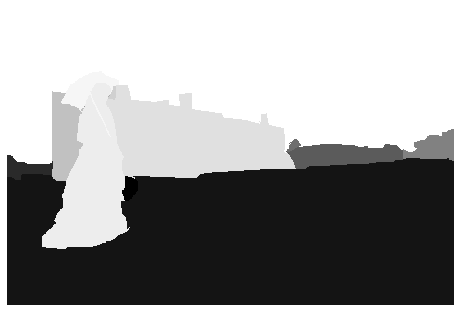

0.6654580865240363
for seg1


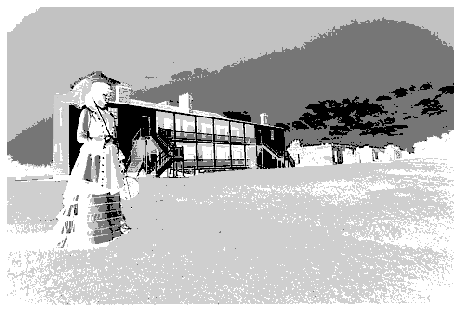

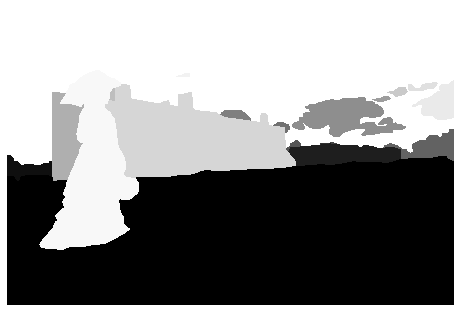

0.7185822418752392
for seg2


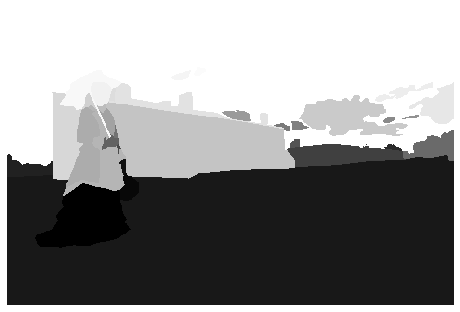

0.8489493418564972
for seg3


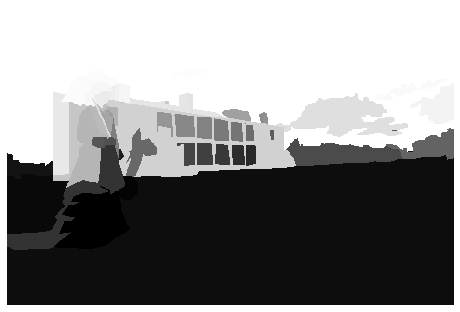

1.0563211066537206
for seg4


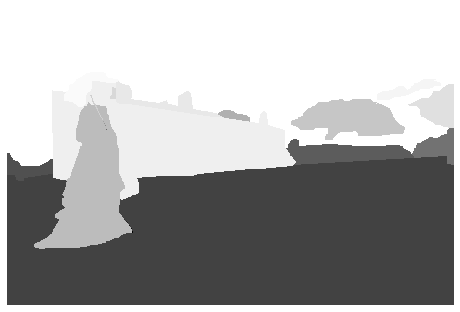

0.7275111940912288
averagee of image 88= 0.8033643942001444
for image89
for seg0


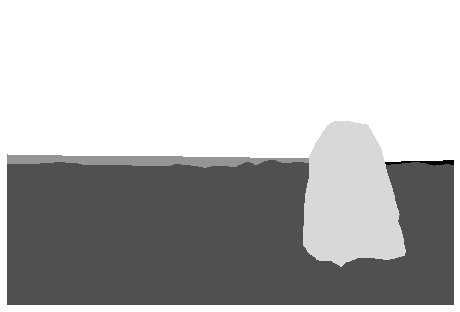

0.5303387010872663
for seg1


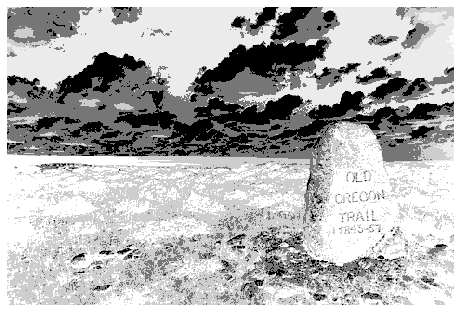

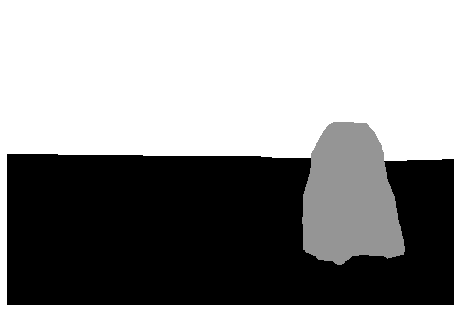

0.45514011657064
for seg2


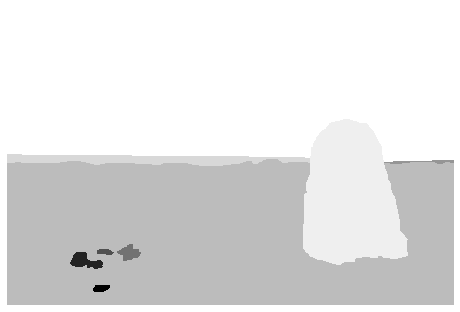

0.5634037723134123
for seg3


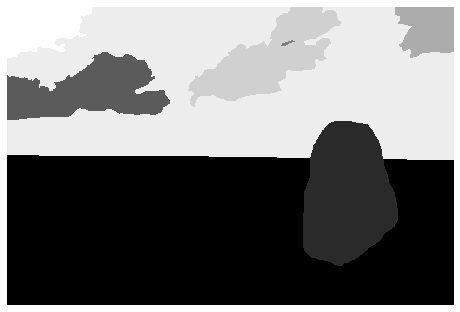

0.8407299039345024
for seg4


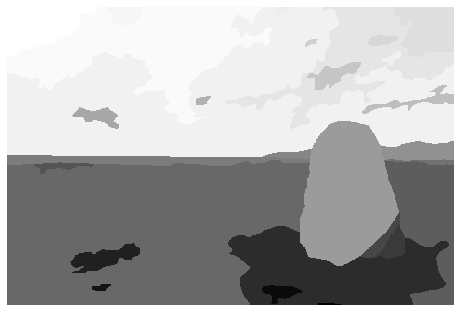

1.3697995605590592
averagee of image 89= 0.751882410892976
for image90
for seg0


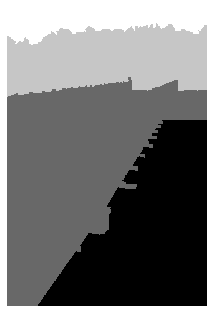

1.7339622213111205
for seg1


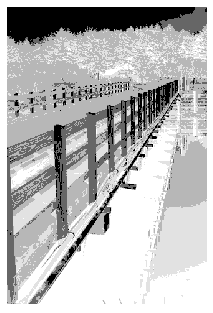

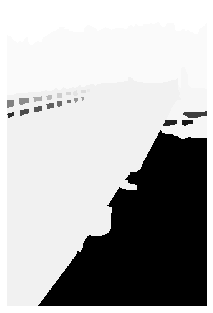

2.125703437370882
for seg2


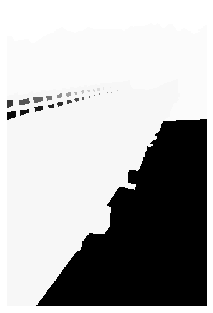

1.8904001206647392
for seg3


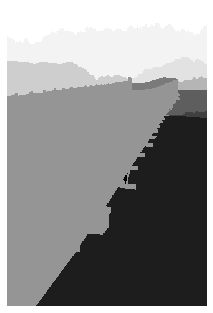

2.287087713236599
for seg4


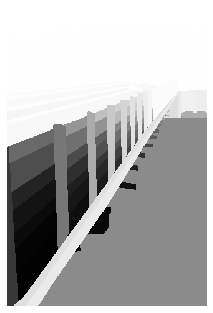

4.499989872267895
averagee of image 90= 2.5074286729702466
for image91
for seg0


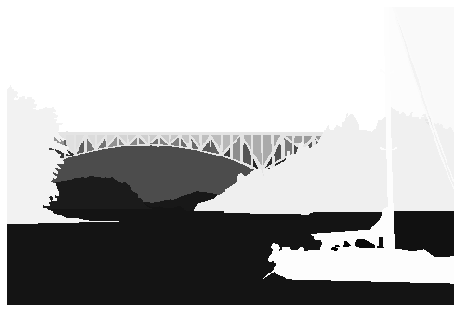

1.3066013684373008
for seg1


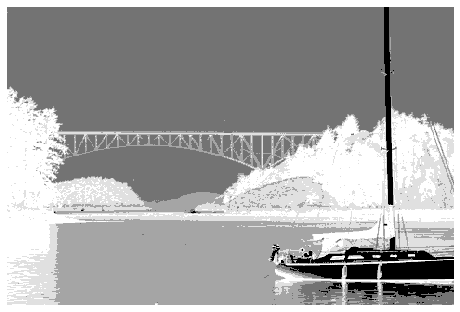

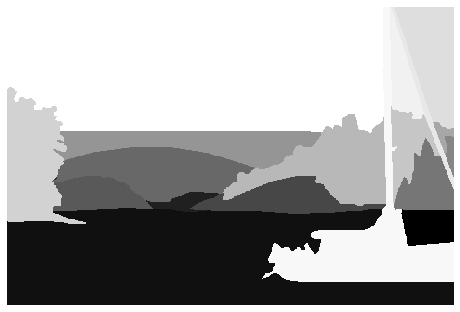

1.295017594012632
for seg2


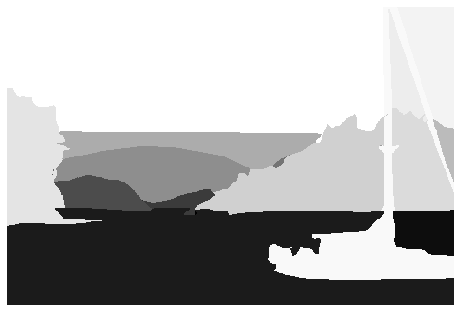

1.237315598800467
for seg3


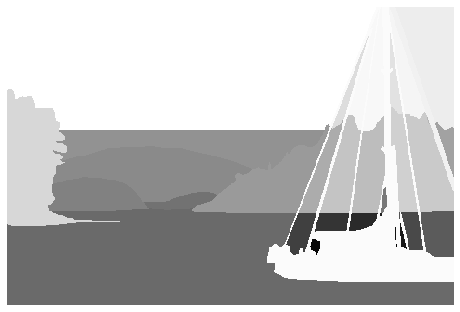

1.5503992437796181
for seg4


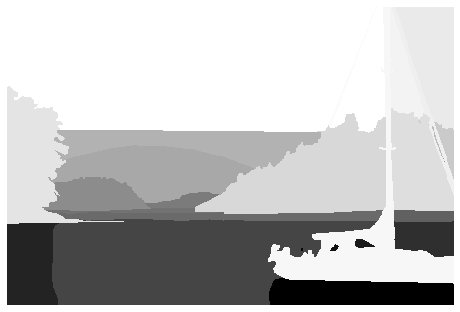

1.3657201961426237
for seg5


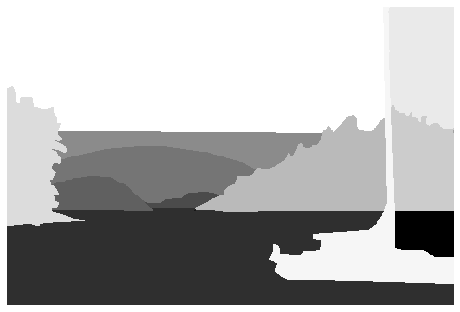

1.1715302670802248
averagee of image 91= 1.3210973780421444
for image92
for seg0


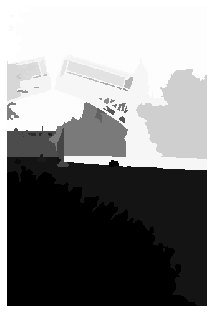

2.721604504968199
for seg1


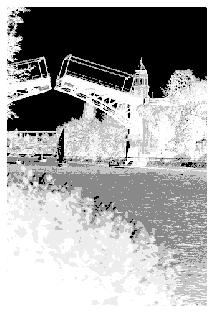

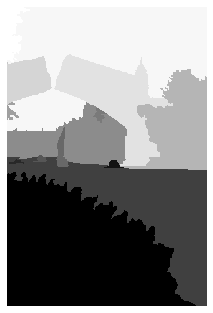

2.48994622095437
for seg2


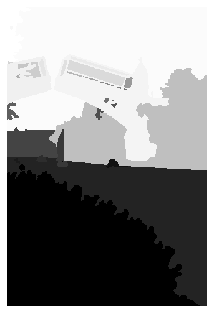

2.5446605404512517
for seg3


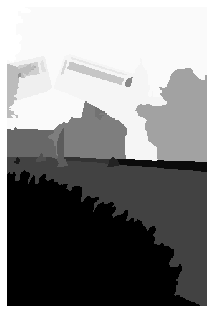

2.7818264737797453
for seg4


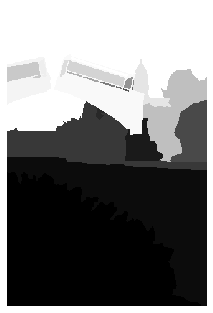

2.7015566076904958
for seg5


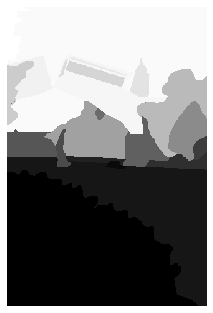

3.035399065117873
averagee of image 92= 2.712498902160322
for image93
for seg0


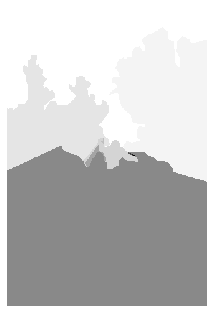

1.813181786223804
for seg1


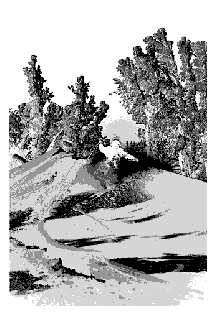

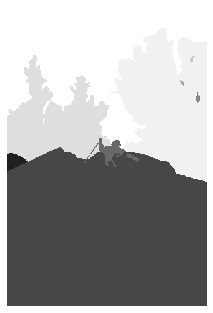

1.770191040820041
for seg2


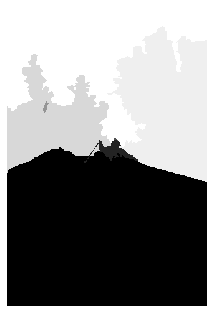

1.7347771883265781
for seg3


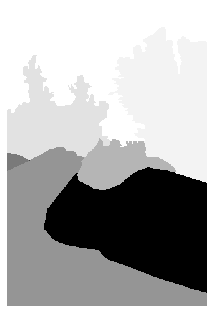

2.598509776405089
for seg4


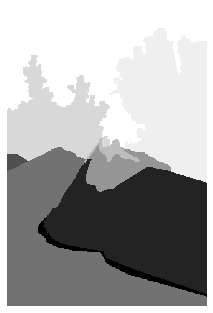

2.6825731549045564
averagee of image 93= 2.1198465893360137
for image94
for seg0


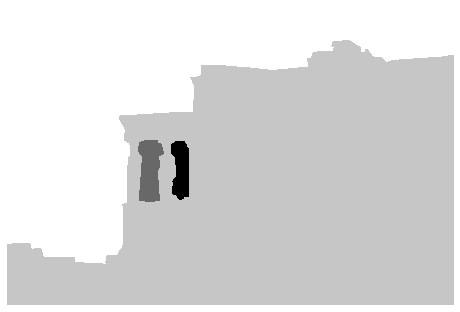

0.21682193004951794
for seg1


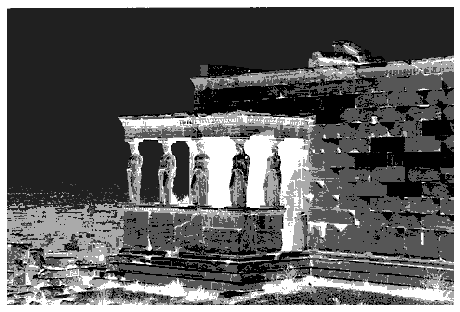

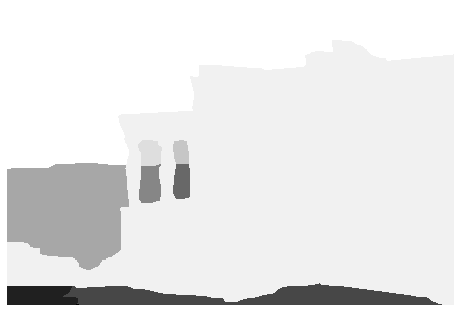

0.5337671125368462
for seg2


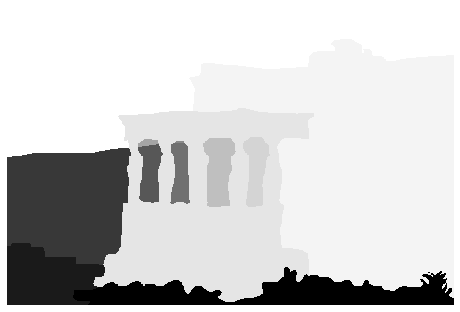

1.0166514904957848
for seg3


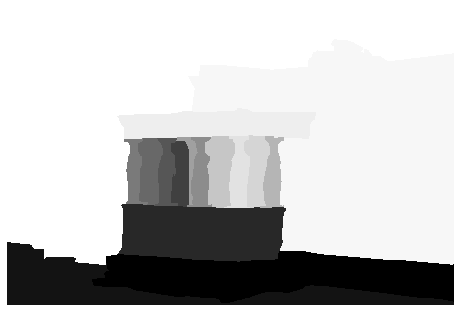

1.1549002611485617
for seg4


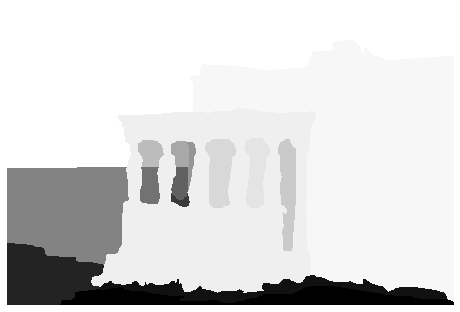

1.0356531539424079
averagee of image 94= 0.7915587896346237
for image95
for seg0


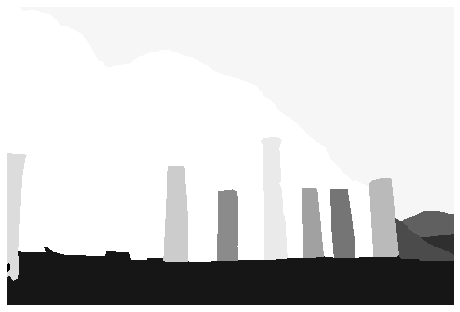

0.8515331239183195
for seg1


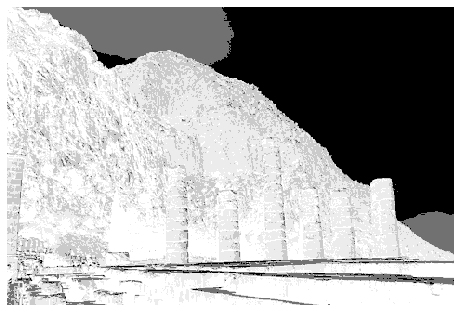

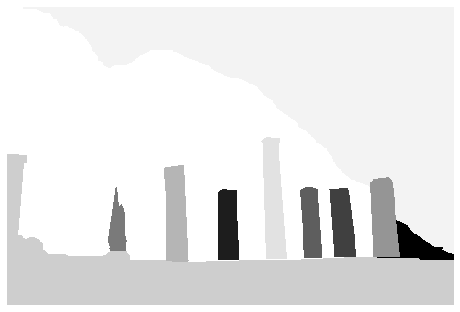

0.7925560162162176
for seg2


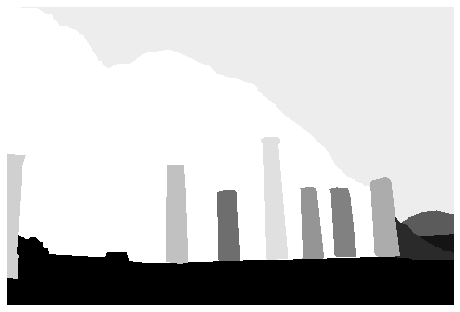

0.8437270672297452
for seg3


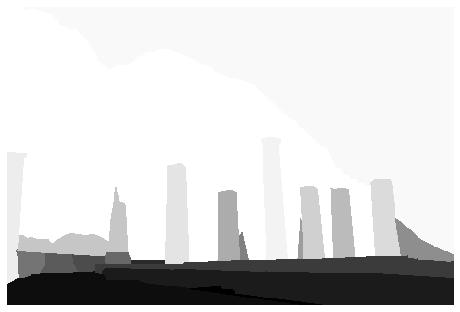

1.1073315833592874
for seg4


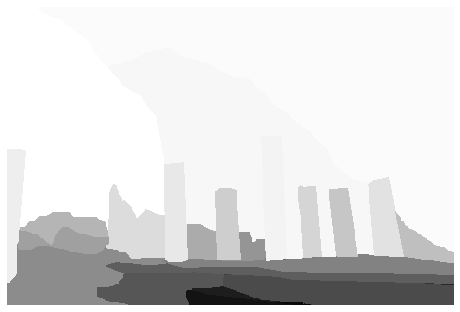

1.5141750190026757
averagee of image 95= 1.021864561945249
for image96
for seg0


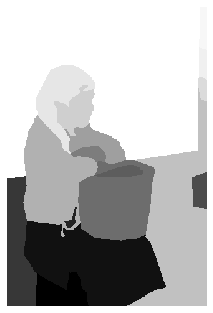

2.9709820592646263
for seg1


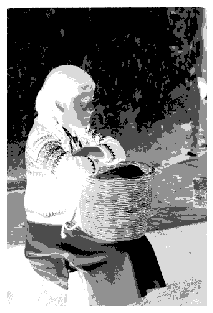

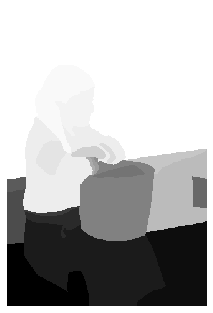

3.0410026236577297
for seg2


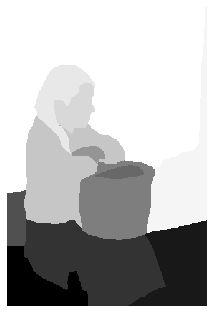

2.7141469890297083
for seg3


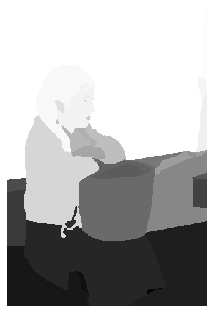

3.1637758341884683
for seg4


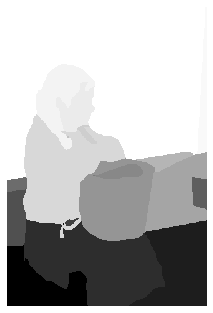

2.934308013551739
averagee of image 96= 2.9648431039384544
for image97
for seg0


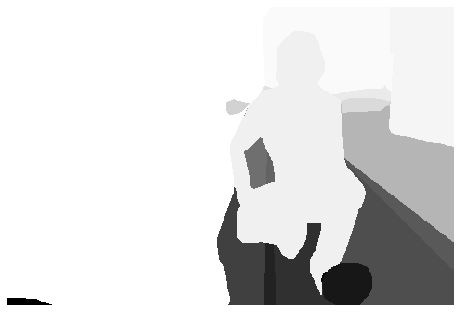

1.3476802455290005
for seg1


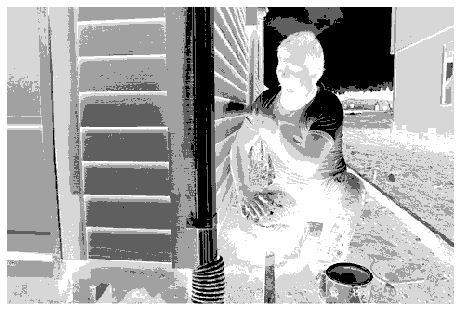

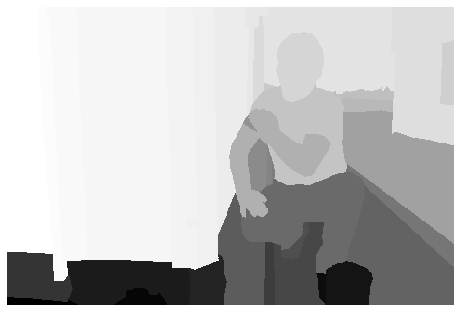

2.395311706572121
for seg2


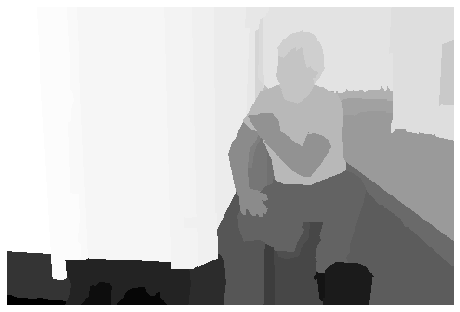

2.4377663507287175
for seg3


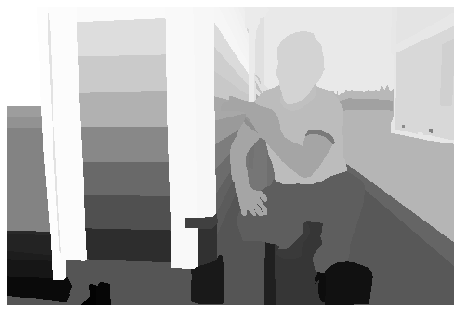

2.862516205947361
for seg4


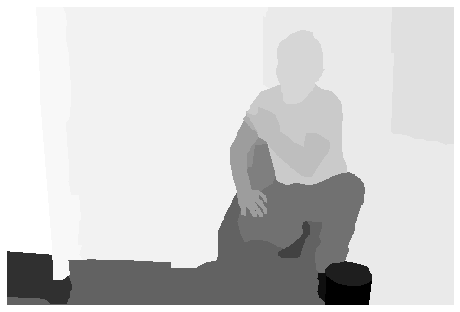

1.7672672077205265
averagee of image 97= 2.1621083432995447
for image98
for seg0


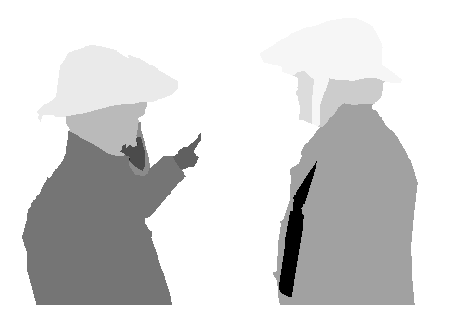

1.0985833799643803
for seg1


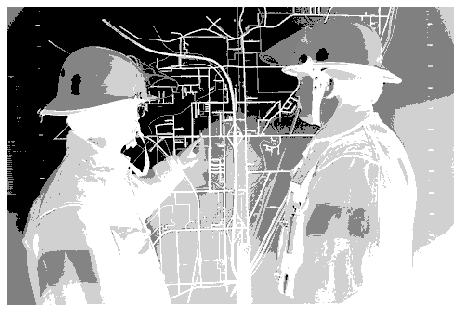

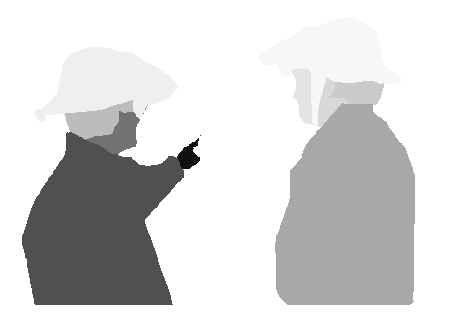

1.0534528699333803
for seg2


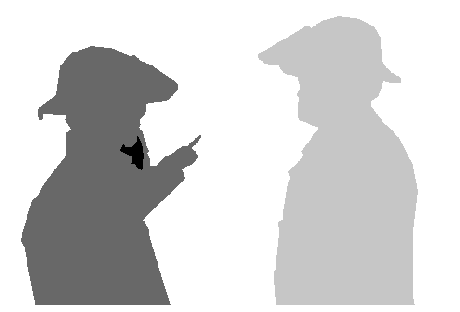

0.7754291632732896
for seg3


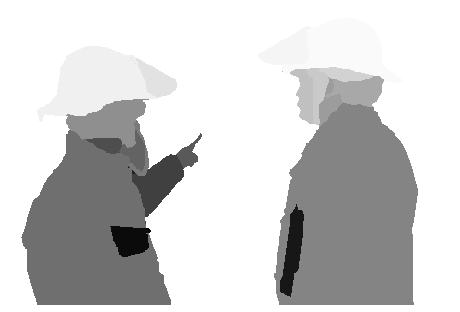

1.1880339926950163
for seg4


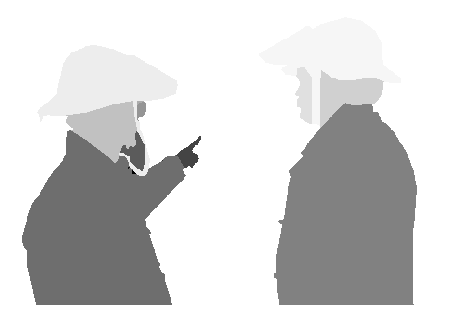

1.046474522290173
for seg5


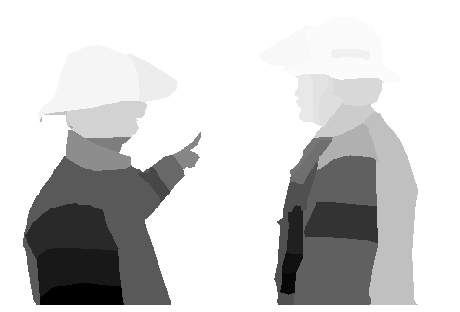

1.504689656365097
for seg6


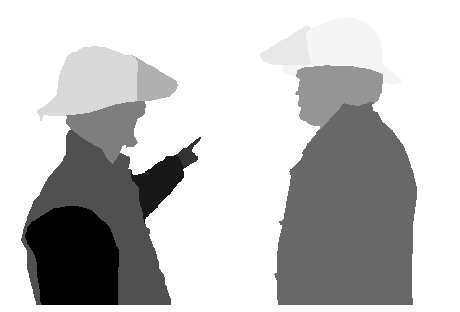

1.1442597241306844
averagee of image 98= 1.1158461869502887
for image99
for seg0


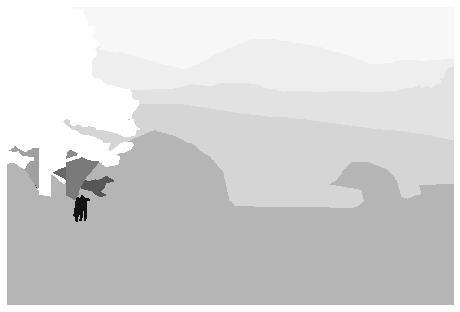

1.1330731645997871
for seg1


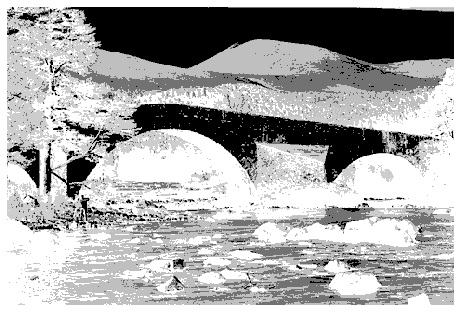

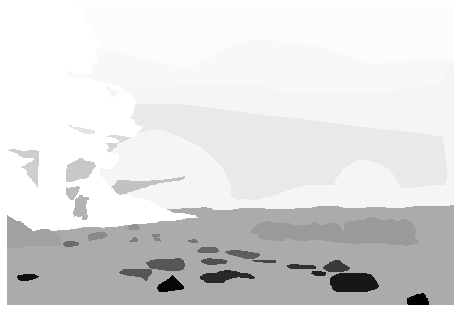

1.4341097715475757
for seg2


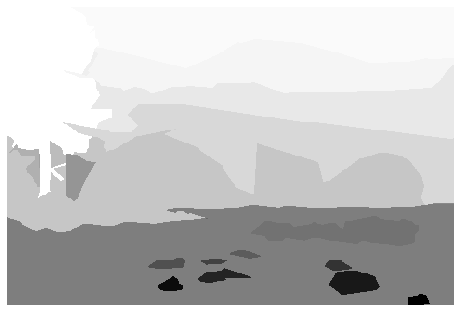

1.443926597288604
for seg3


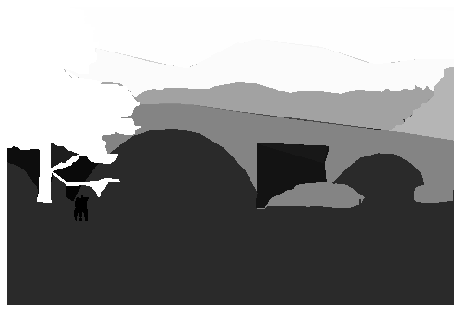

1.214311304662398
for seg4


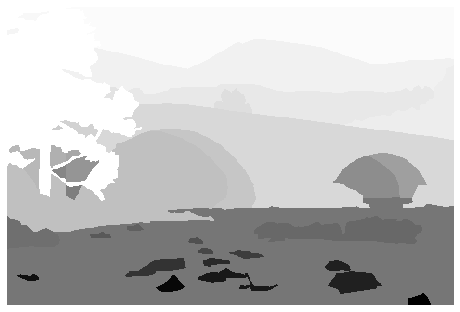

1.6610526140550108
averagee of image 99= 1.377294690430675
for image100
for seg0


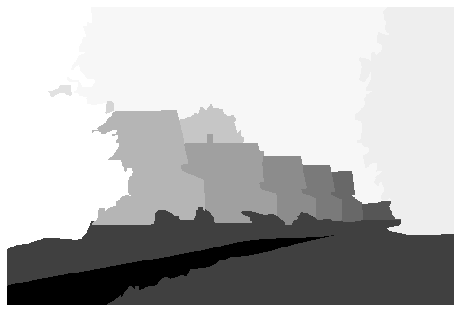

1.0572151719273473
for seg1


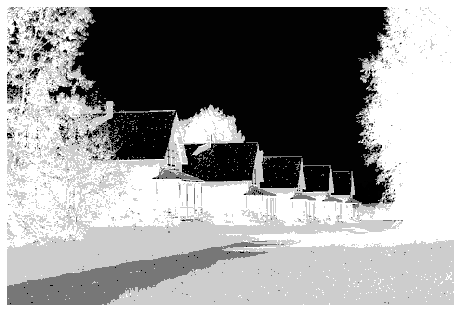

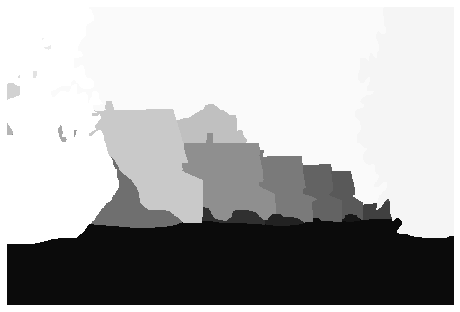

1.1119866760187467
for seg2


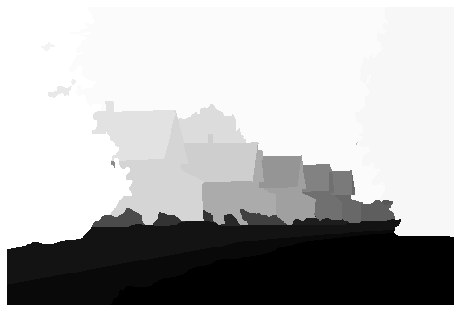

1.2754497883752565
for seg3


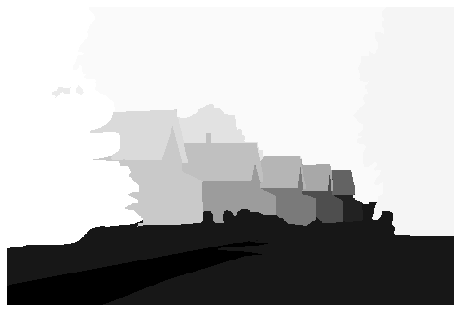

1.0746566203438626
for seg4


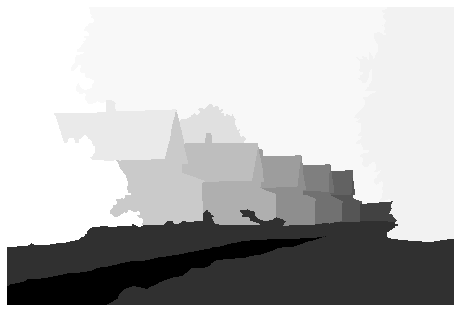

1.1060163894790074
averagee of image 100= 1.1250649292288442
for image101
for seg0


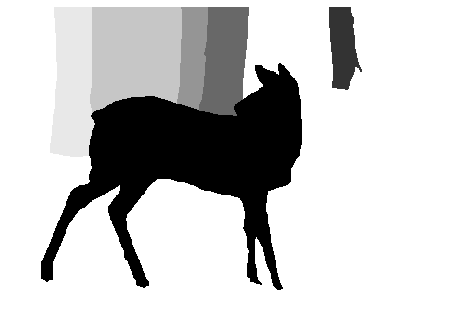

1.0237983573949263
for seg1


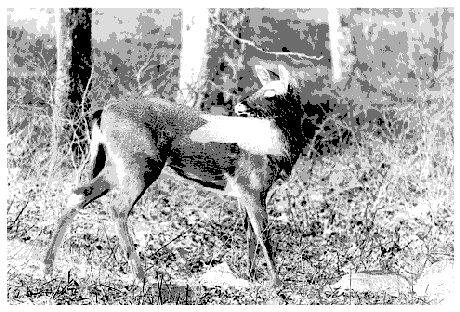

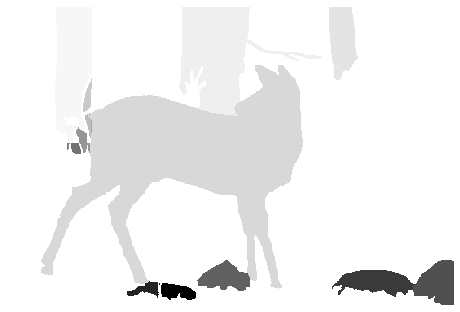

0.9385787529039566
for seg2


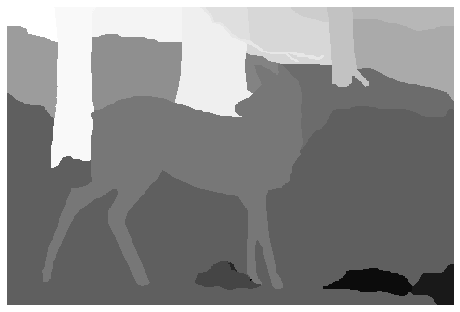

1.7856622388352386
for seg3


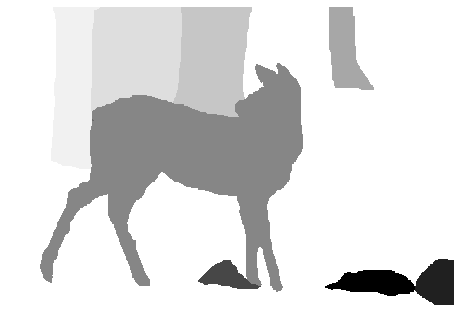

1.163339171267726
for seg4


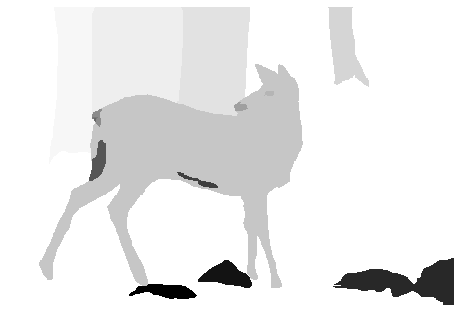

1.1608995784237102
for seg5


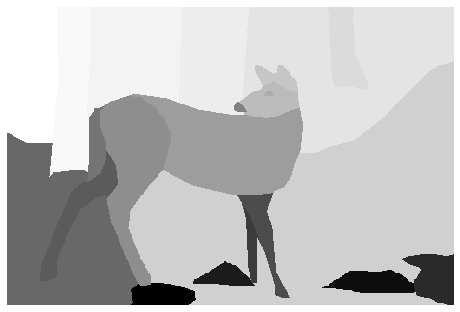

2.144206964305611
for seg6


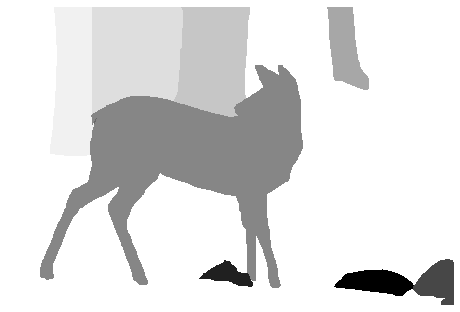

1.126416013461475
averagee of image 101= 1.334700153798949
for image102
for seg0


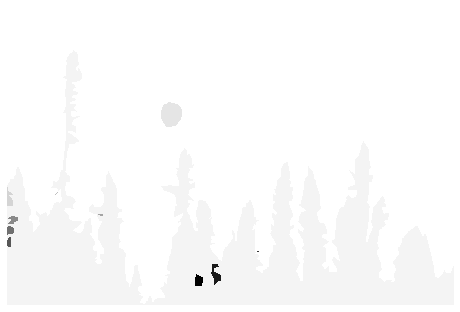

0.10523902420169452
for seg1


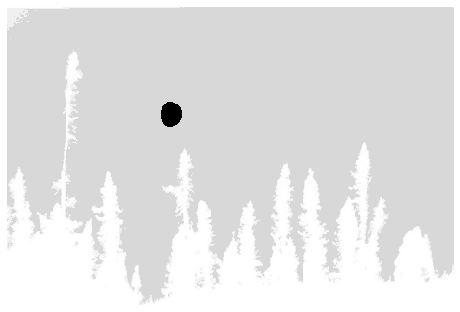

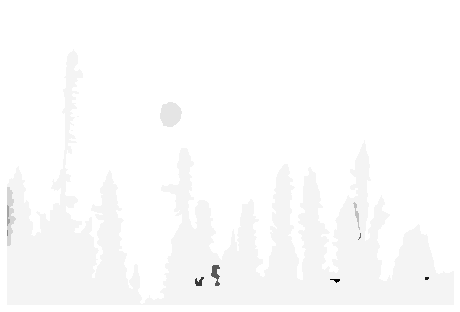

0.12319184604945999
for seg2


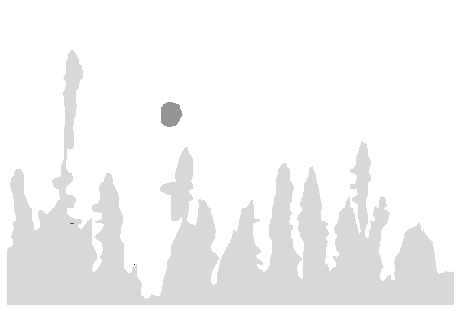

0.1362384548843154
for seg3


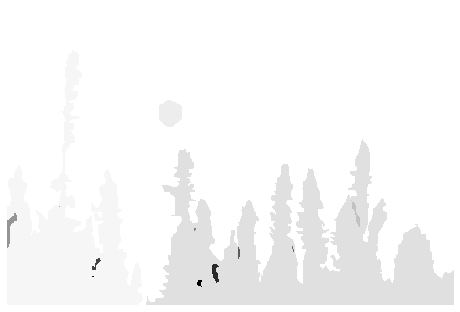

0.30733139023254274
for seg4


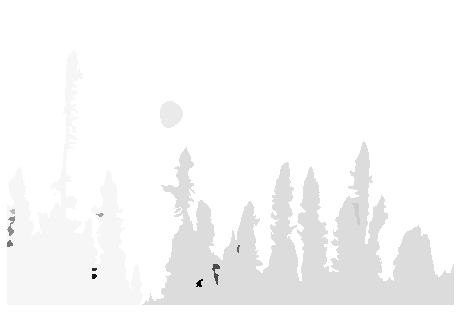

0.2742015395865075
for seg5


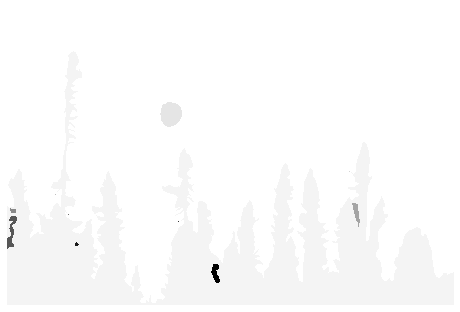

0.0798187117490247
averagee of image 102= 0.17100349445059082
for image103
for seg0


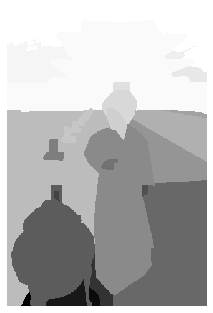

3.429191467322067
for seg1


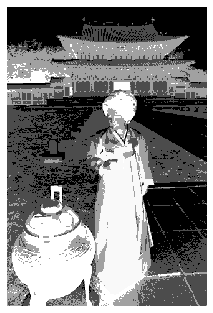

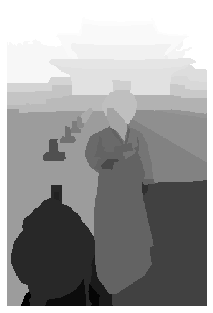

4.372904538894355
for seg2


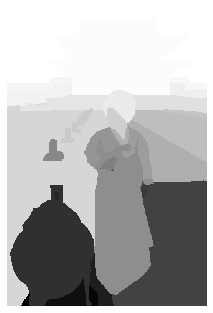

3.920704008175512
for seg3


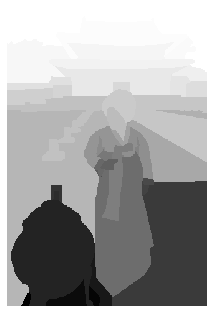

4.463736930875003
for seg4


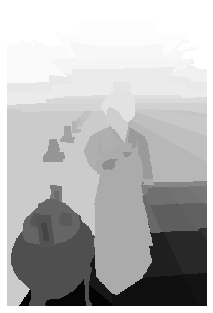

5.187792127426217
averagee of image 103= 4.2748658145386305
for image104
for seg0


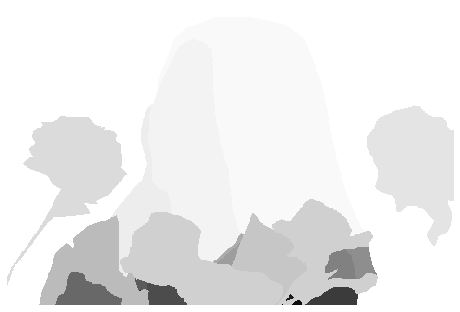

1.4738451216620492
for seg1


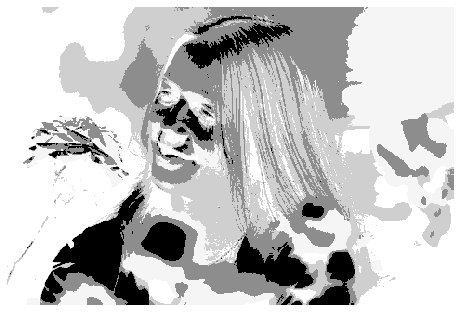

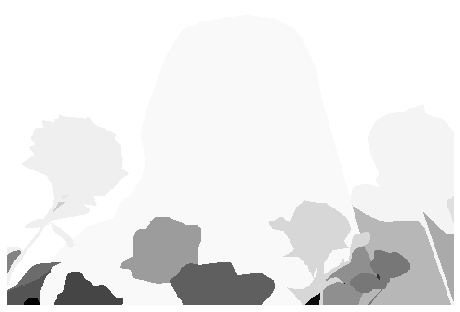

1.4088986663033716
for seg2


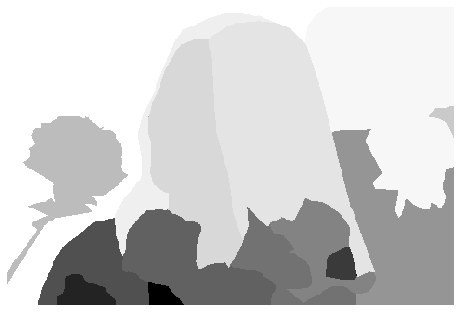

1.6427793577423917
for seg3


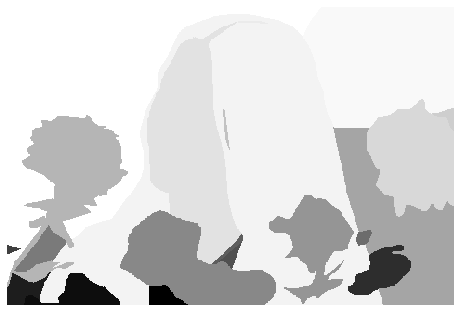

1.6349242400961717
for seg4


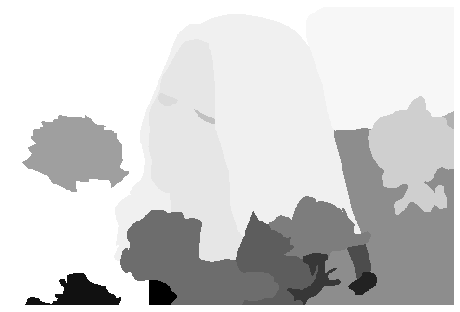

1.6359596618562893
averagee of image 104= 1.5592814095320546
for image105
for seg0


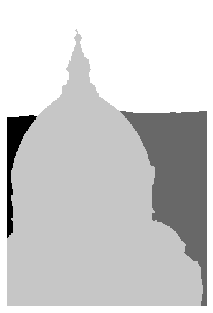

1.018887173697084
for seg1


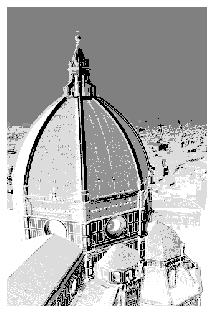

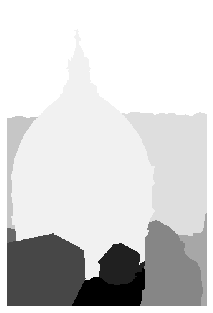

2.307923379361172
for seg2


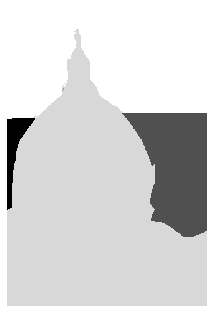

0.9513722560223962
for seg3


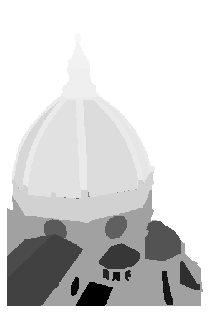

2.9591859757797256
for seg4


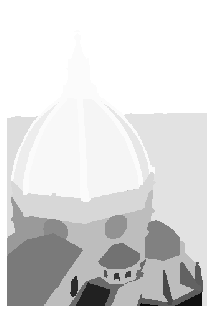

3.3732955765619357
averagee of image 105= 2.1221328722844626
for image106
for seg0


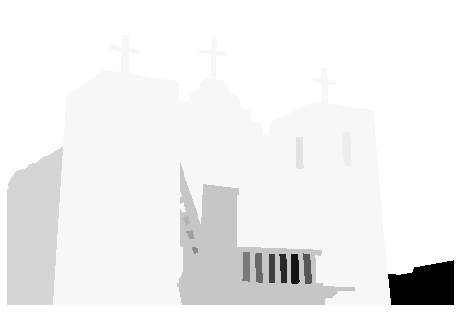

0.3337316481198222
for seg1


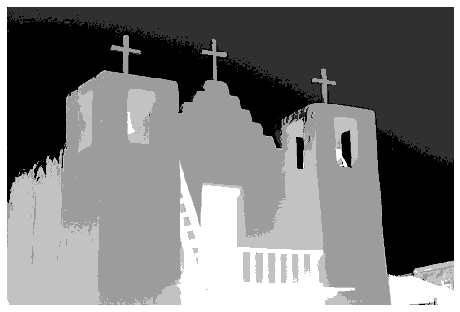

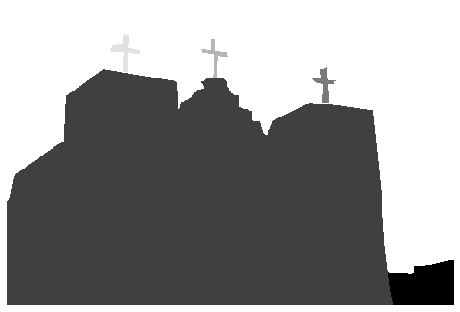

0.17528600310091802
for seg2


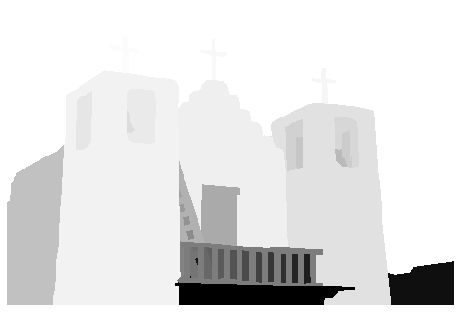

0.98391336959747
for seg3


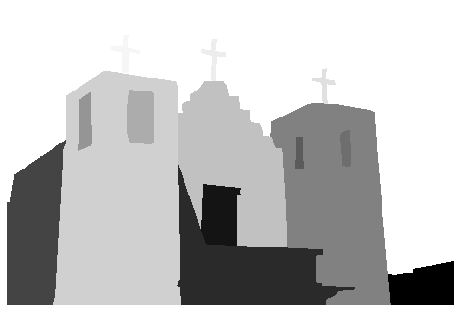

0.8401281865605652
for seg4


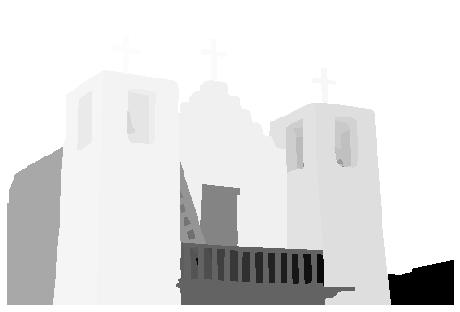

1.0823725791218868
averagee of image 106= 0.6830863573001325
for image107
for seg0


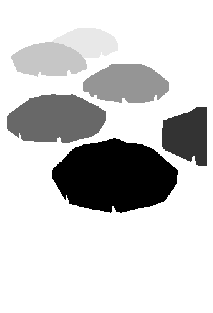

1.5383891793215492
for seg1


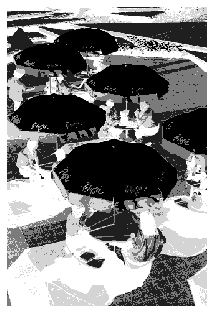

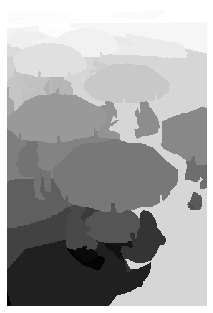

4.9473251174755175
for seg2


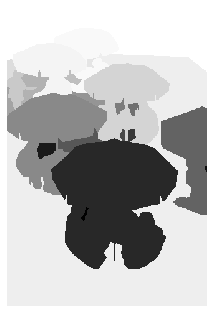

3.6768311893039445
for seg3


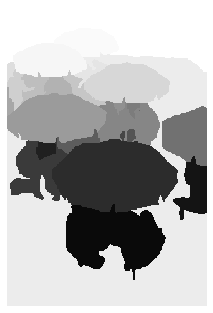

3.9121133354418984
for seg4


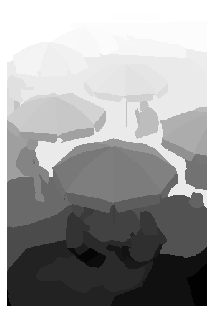

6.149719013851396
for seg5


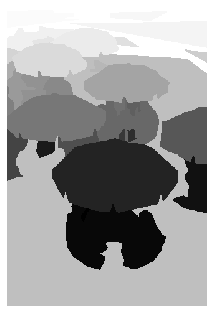

3.9957444473737493
averagee of image 107= 4.03668704712801
for image108
for seg0


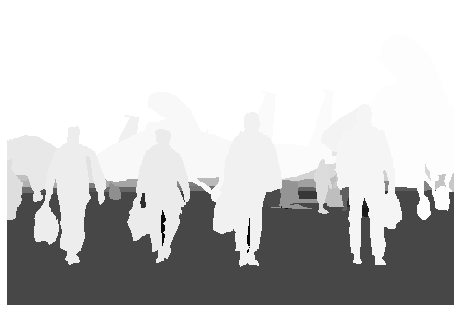

1.0975514531587116
for seg1


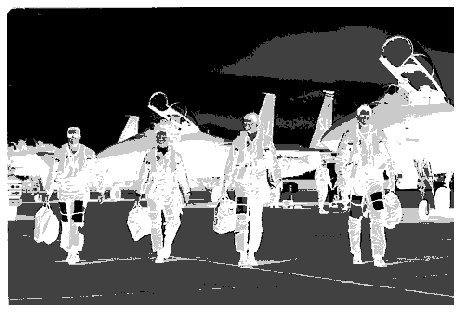

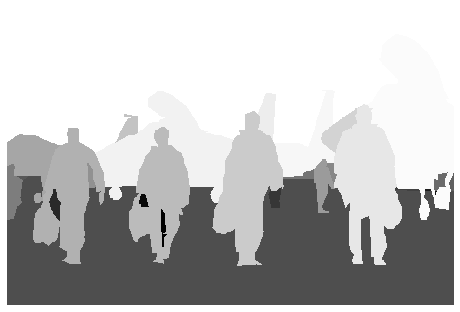

1.0182949505433814
for seg2


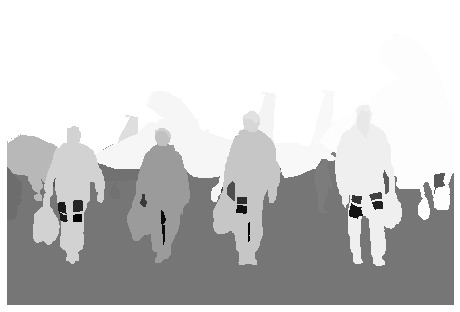

1.0262968437236206
for seg3


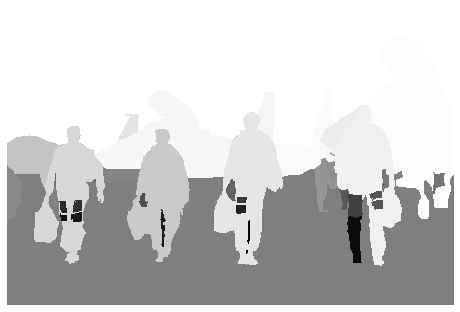

1.036184296663377
for seg4


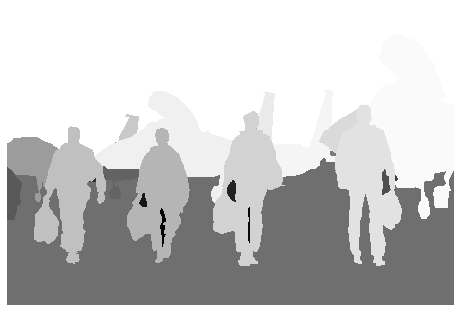

0.9760718203690643
averagee of image 108= 1.030879872891631
for image109
for seg0


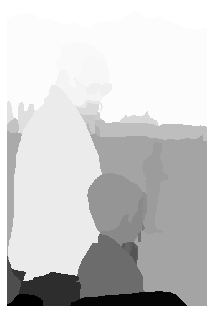

2.851485737698459
for seg1


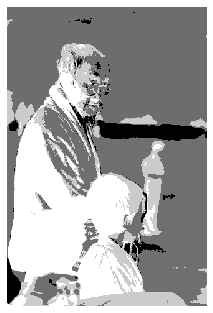

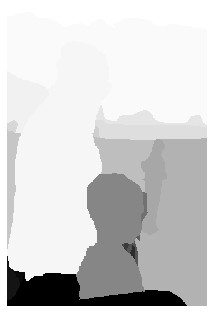

2.561022642631381
for seg2


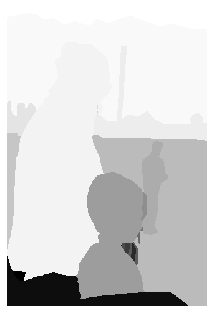

2.2691444217794823
for seg3


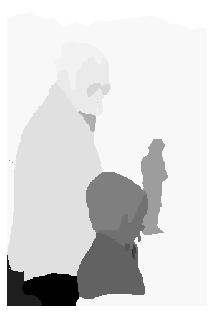

2.4481512542513553
for seg4


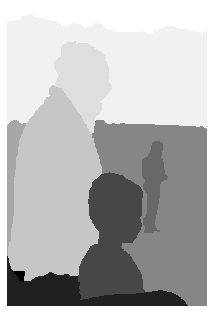

2.2922078906518455
for seg5


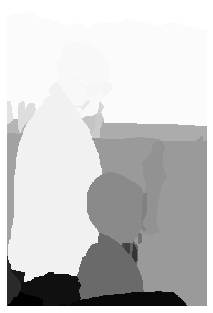

2.7304012475676864
averagee of image 109= 2.525402199096701
for image110
for seg0


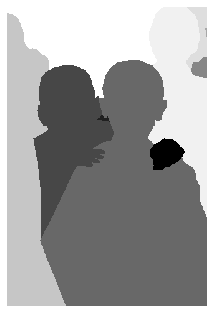

2.920668382418933
for seg1


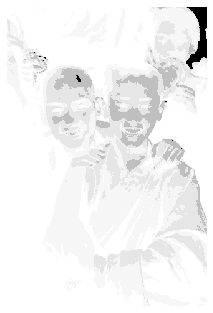

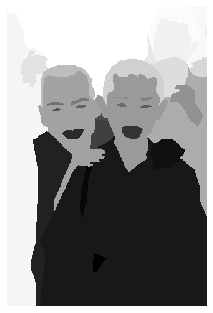

3.9951156308271765
for seg2


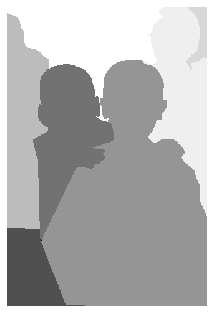

2.9770696487409327
for seg3


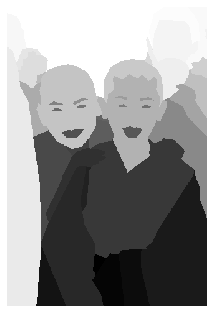

5.211338314852681
for seg4


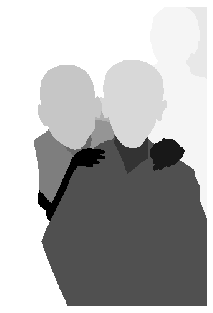

3.088850698457436
averagee of image 110= 3.6386085350594315
for image111
for seg0


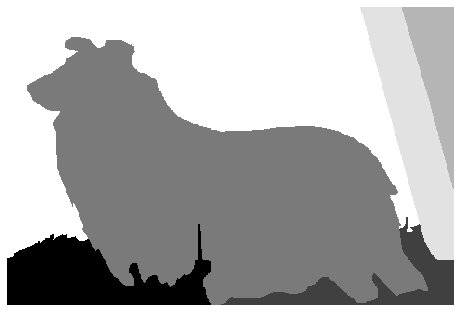

0.7921767113379066
for seg1


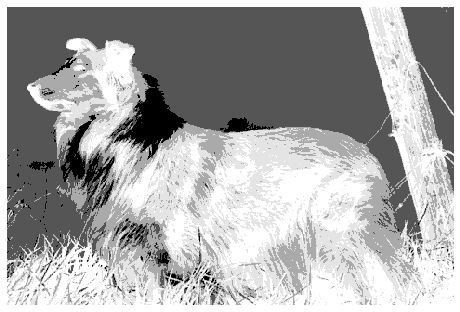

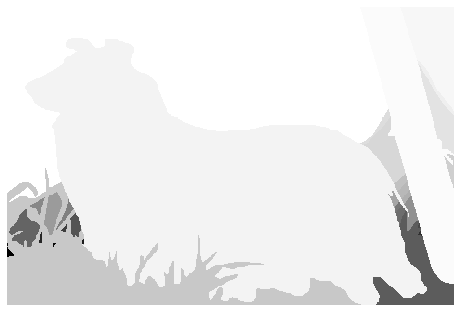

1.0082424180817902
for seg2


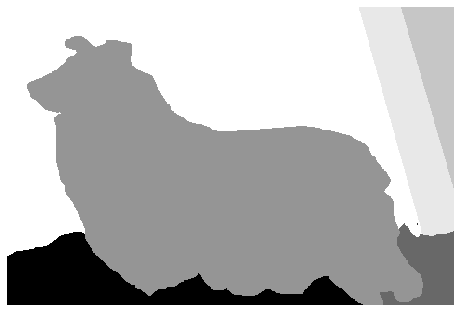

0.7827412292202763
for seg3


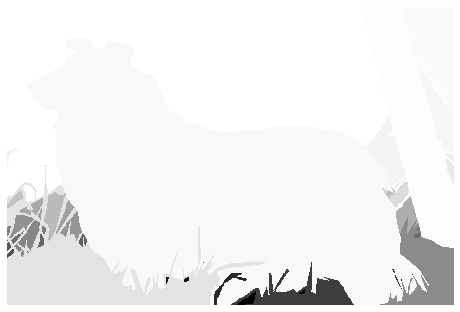

1.0624997348703642
for seg4


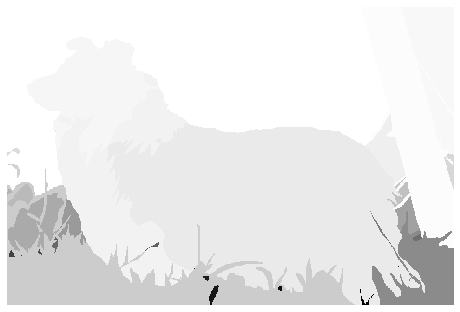

1.2852707456197894
for seg5


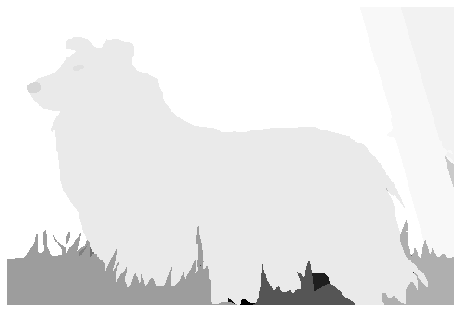

0.8292287875340363
averagee of image 111= 0.9600266044440273
for image112
for seg0


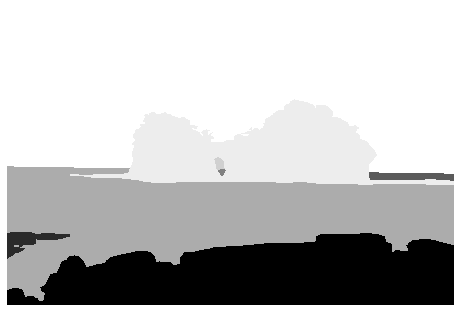

0.34865193120704197
for seg1


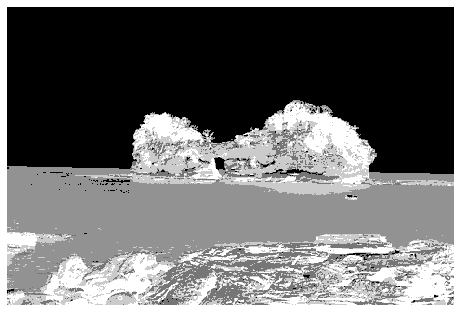

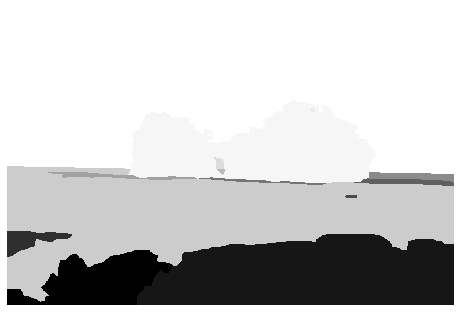

0.4832030612596755
for seg2


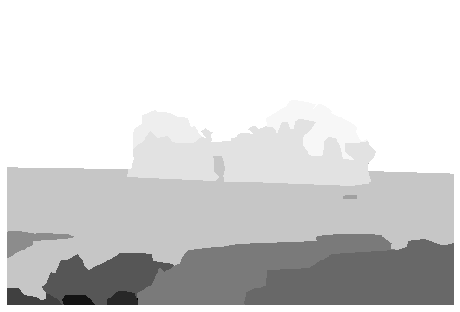

0.6094035809748735
for seg3


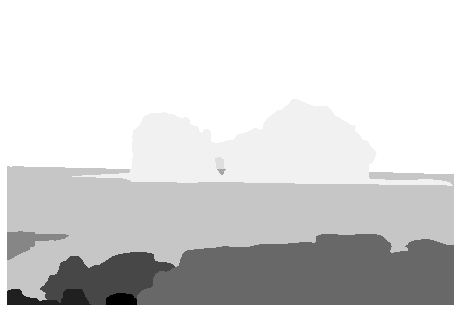

0.4402778957178046
for seg4


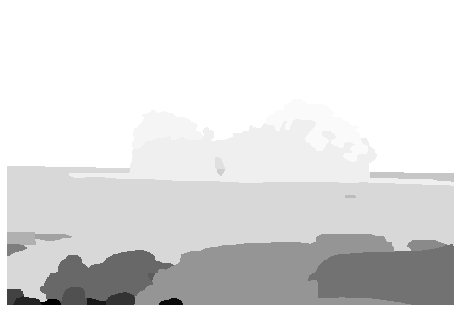

0.6557242489981883
averagee of image 112= 0.5074521436315168
for image113
for seg0


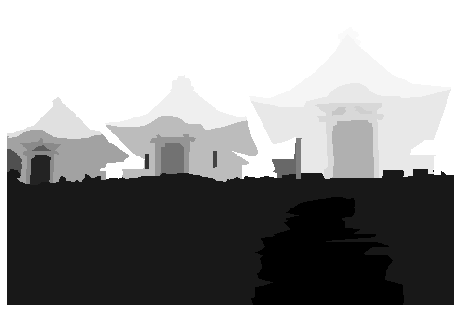

1.603566251091635
for seg1


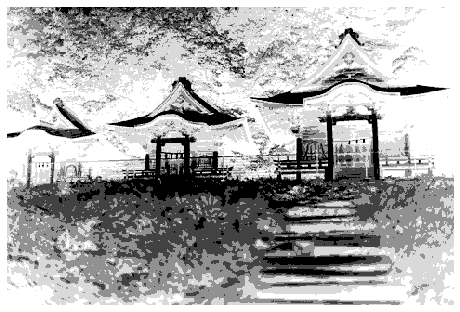

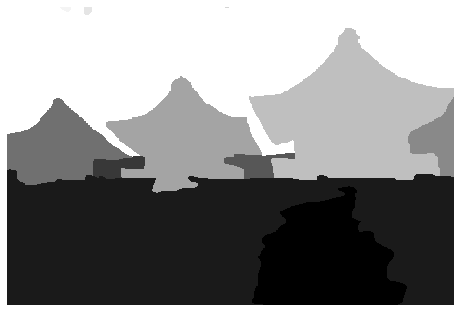

1.449238158753406
for seg2


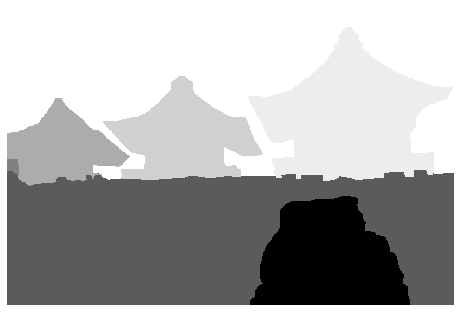

1.3514261526157474
for seg3


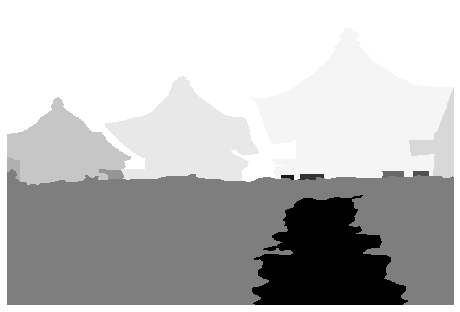

1.405742075775221
for seg4


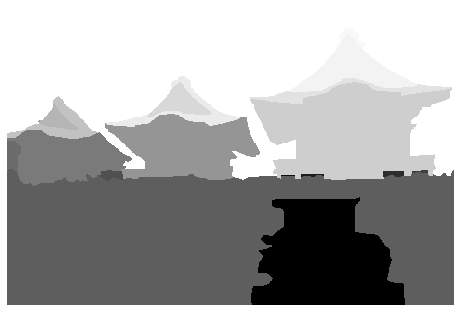

1.4966207267447942
for seg5


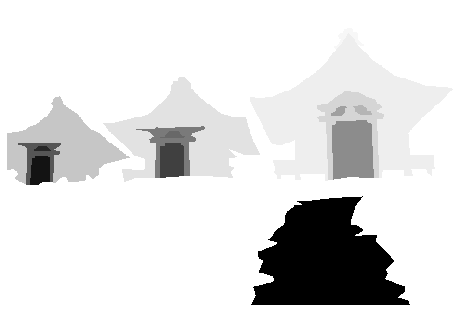

1.137326986170519
averagee of image 113= 1.4073200585252204
for image114
for seg0


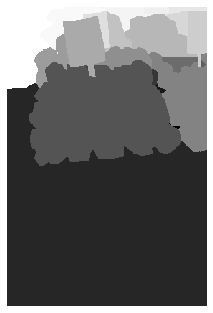

2.3391042933465345
for seg1


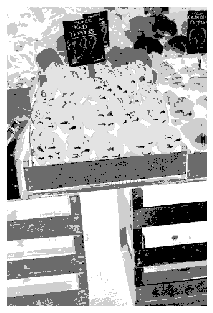

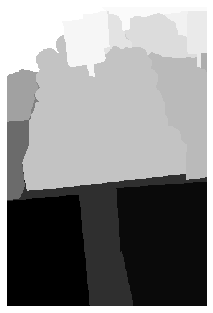

3.439612333620633
for seg2


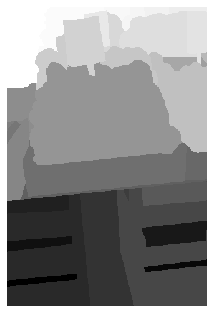

4.214768097645995
for seg3


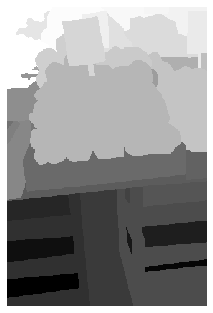

4.39607825425806
for seg4


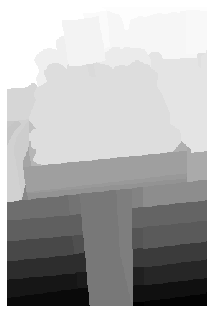

4.870272193830501
for seg5


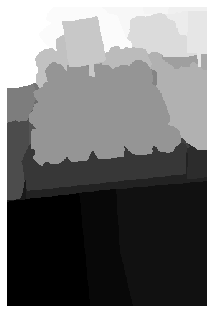

3.952758011785057
for seg6


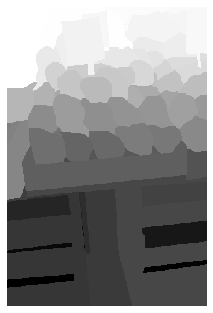

5.852365634422923
averagee of image 114= 4.152136974129958
for image115
for seg0


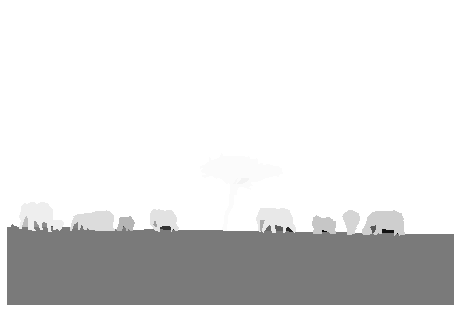

0.2461677056227534
for seg1


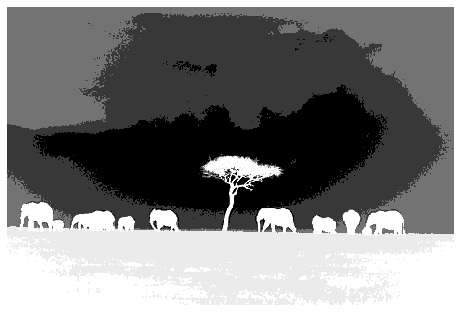

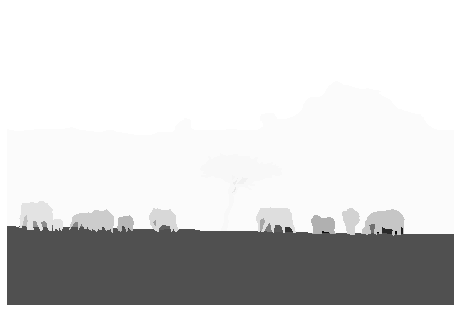

0.6047157558060383
for seg2


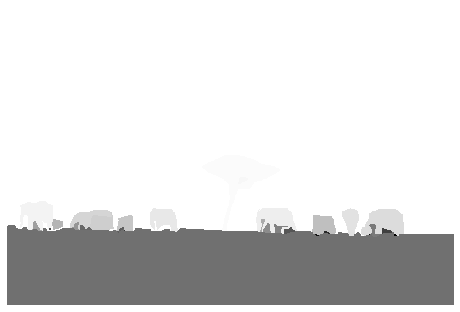

0.2701359468771599
for seg3


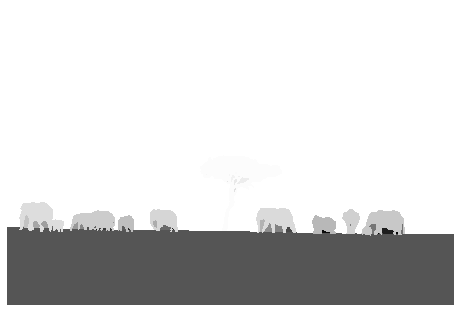

0.2521933845781404
for seg4


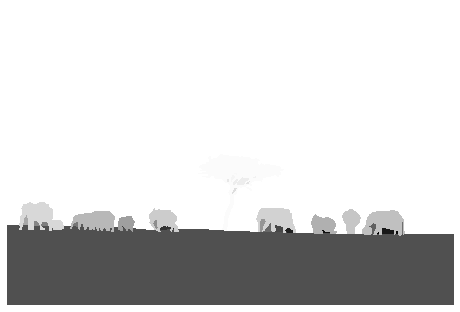

0.25250429757485027
for seg5


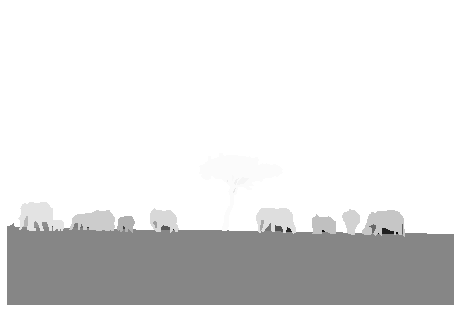

0.2568089075877407
averagee of image 115= 0.3137543330077805
for image116
for seg0


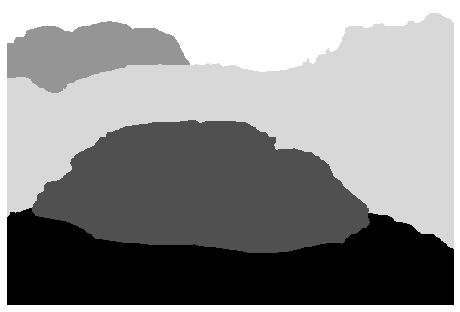

1.0255559451326404
for seg1


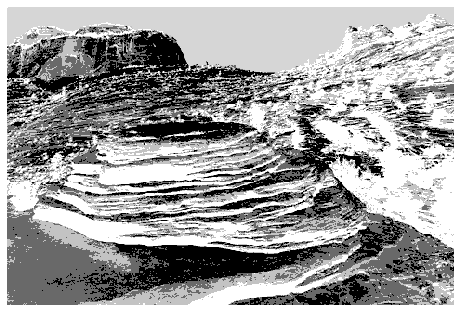

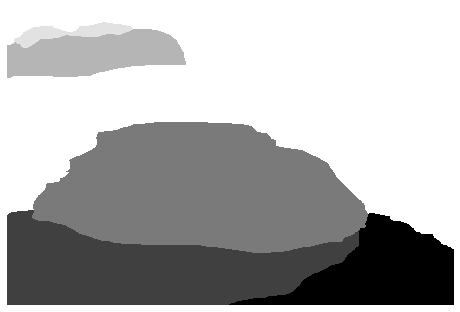

1.1549143314227976
for seg2


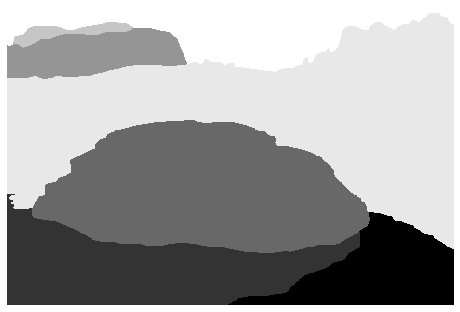

1.1840989353409896
for seg3


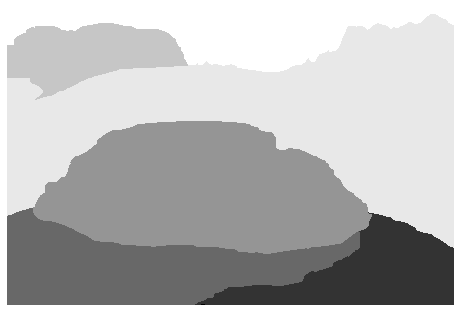

1.1598168219737484
for seg4


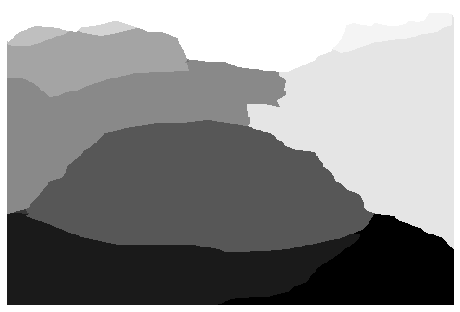

1.4473520376255573
averagee of image 116= 1.1943476142991467
for image117
for seg0


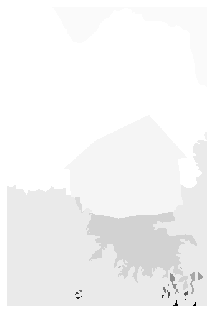

2.457972969458747
for seg1


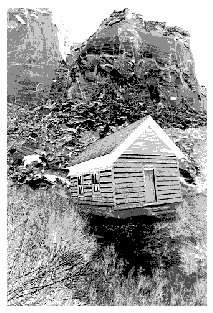

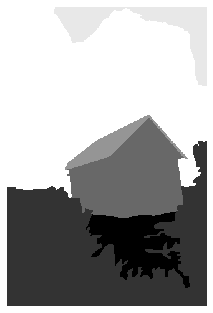

2.4910304788663886
for seg2


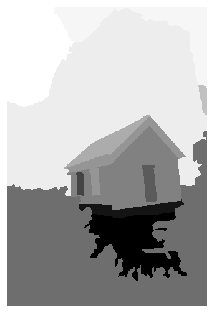

3.0977713168379983
for seg3


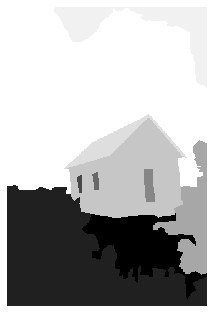

2.876538612404382
averagee of image 117= 2.730828344391879
for image118
for seg0


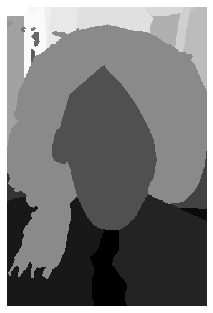

3.4082049989003185
for seg1


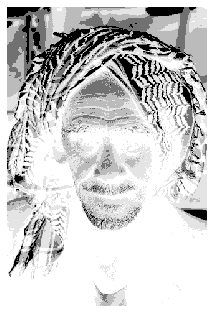

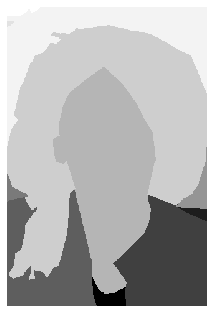

2.859099433890558
for seg2


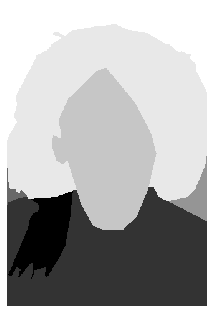

2.6792652943582054
for seg3


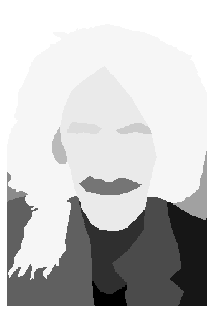

3.3769107797421487
for seg4


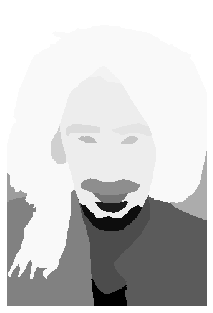

3.4491902177445852
for seg5


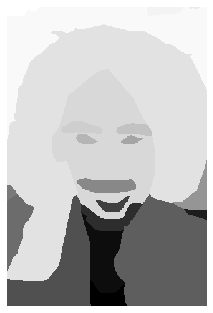

3.3870960275316415
averagee of image 118= 3.193294458694576
for image119
for seg0


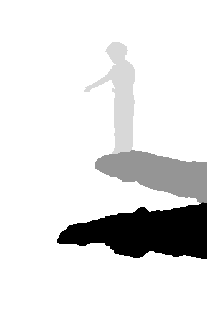

1.046669461183524
for seg1


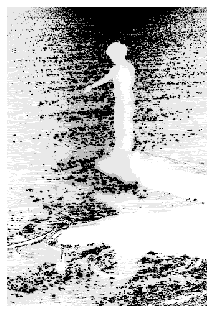

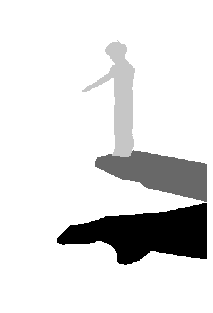

1.0276476936098995
for seg2


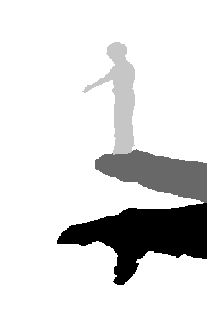

1.080091159292932
for seg3


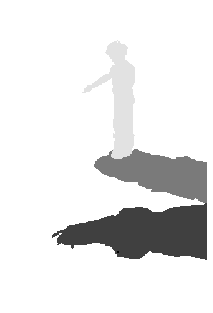

1.0835357202374298
for seg4


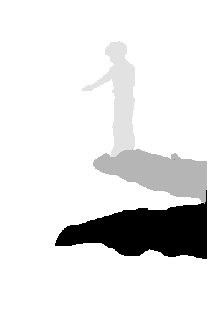

1.0978436003262826
for seg5


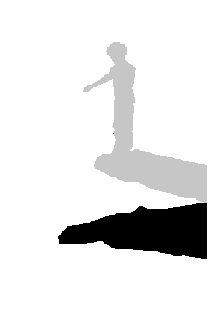

0.9210908399863954
averagee of image 119= 1.0428130791060772
for image120
for seg0


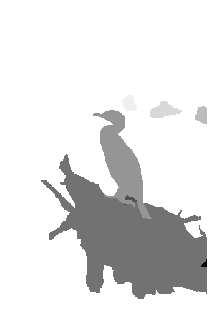

1.051881938183565
for seg1


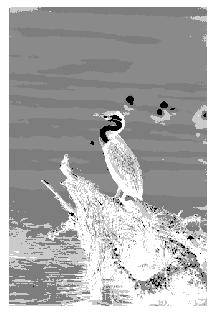

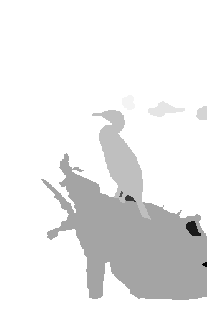

1.0620321013122362
for seg2


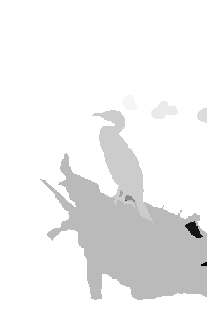

1.0625519780235275
for seg3


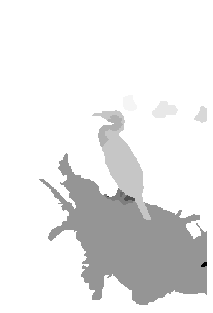

1.0751493654954265
for seg4


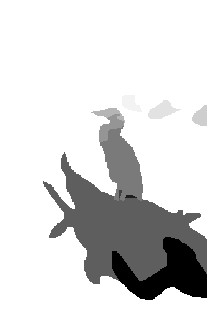

1.3938409113983345
averagee of image 120= 1.1290912588826179
for image121
for seg0


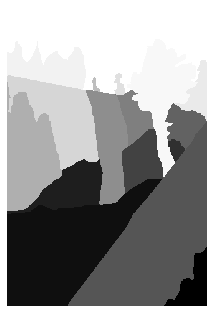

3.3365090614159483
for seg1


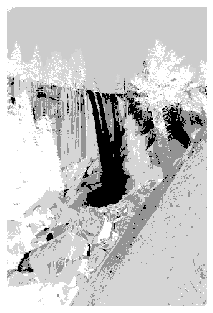

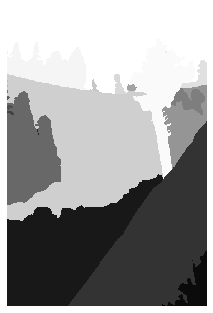

2.7686642264304964
for seg2


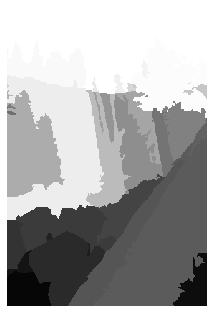

3.866348707357604
for seg3


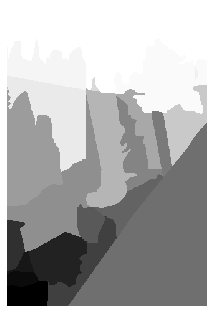

3.685616435607611
for seg4


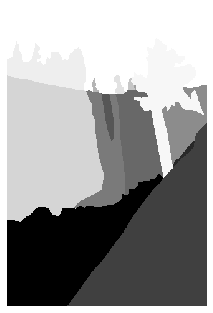

2.8468044862817528
averagee of image 121= 3.300788583418682
for image122
for seg0


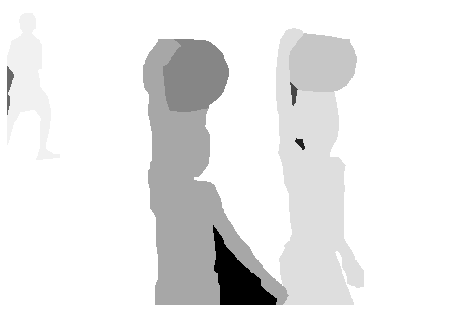

0.8080308019135853
for seg1


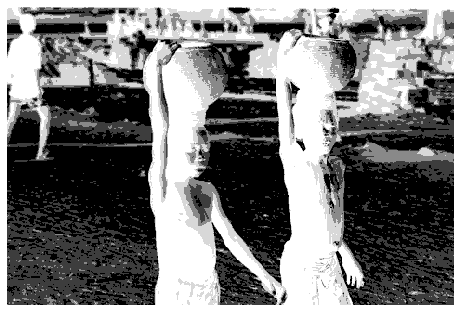

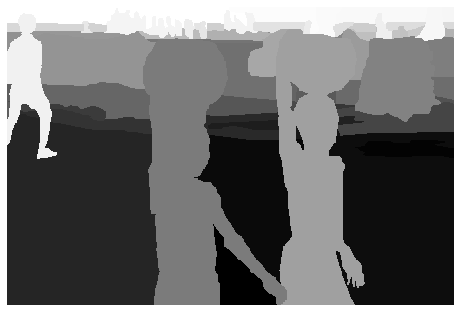

2.2046129382653903
for seg2


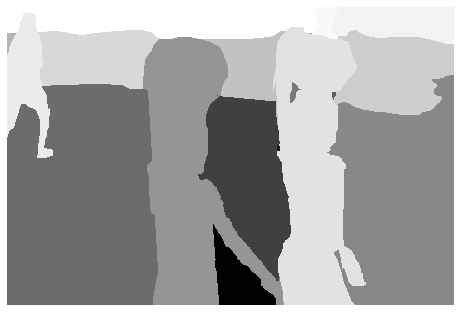

1.7085097970584338
for seg3


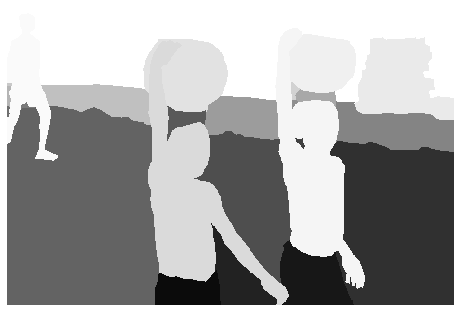

1.895249445062544
for seg4


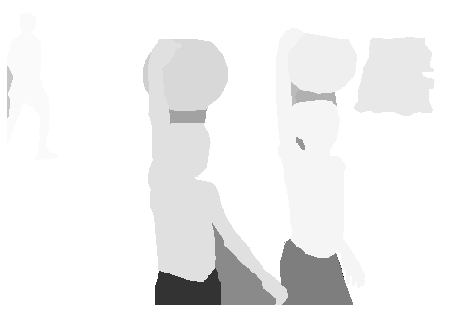

1.0374341718746394
averagee of image 122= 1.5307674308349184
for image123
for seg0


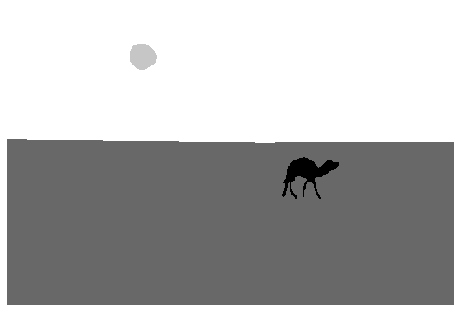

0.07672986133349798
for seg1


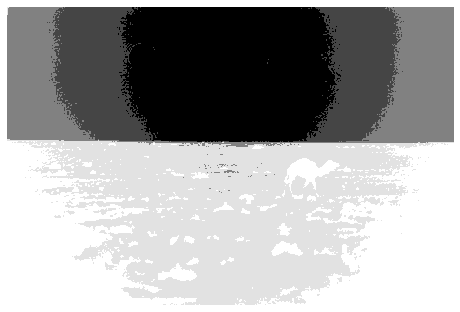

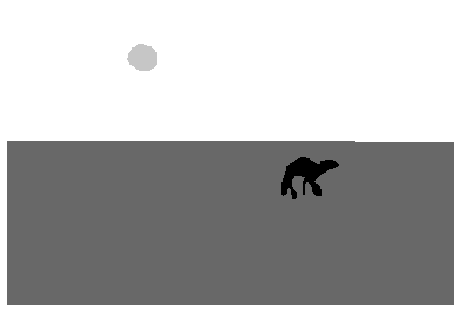

0.09550424644676714
for seg2


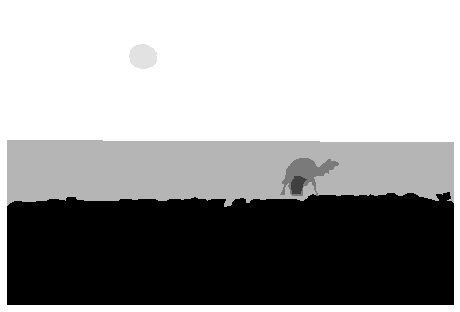

0.40690945078441876
for seg3


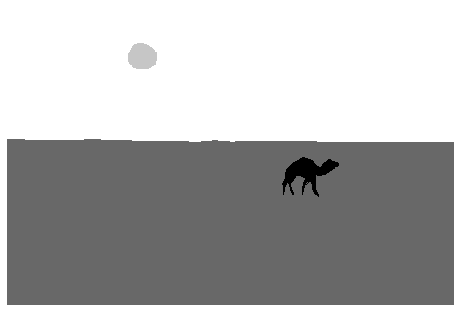

0.08697780543352962
for seg4


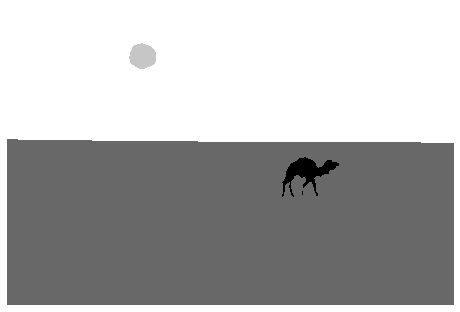

0.07615539347584119
averagee of image 123= 0.14845535149481093
for image124
for seg0


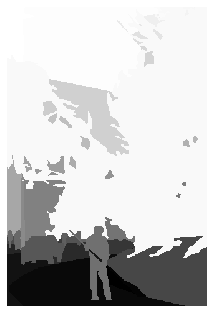

3.348988266025449
for seg1


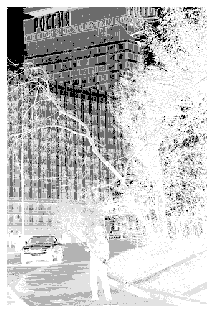

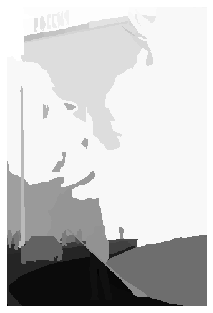

3.640151338730763
for seg2


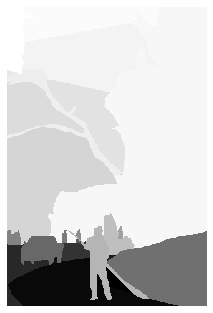

3.8317084433215127
for seg3


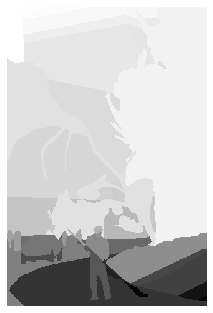

4.723324361439858
for seg4


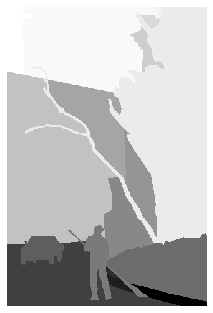

3.6892375548645853
averagee of image 124= 3.8466819928764338
for image125
for seg0


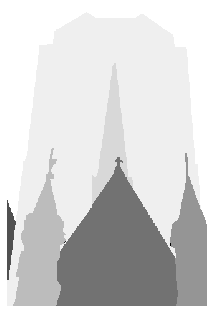

2.0109038439010782
for seg1


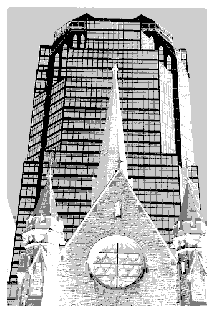

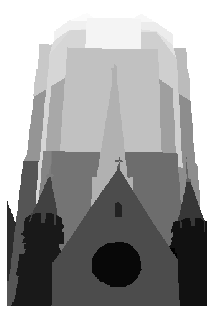

4.444252730062911
for seg2


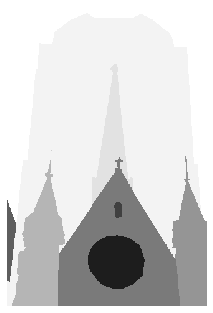

2.2077775505112336
for seg3


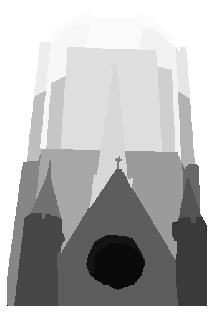

4.431544360005185
for seg4


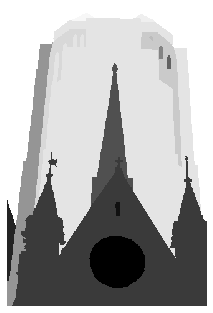

2.291958003538753
averagee of image 125= 3.0772872976038324
for image126
for seg0


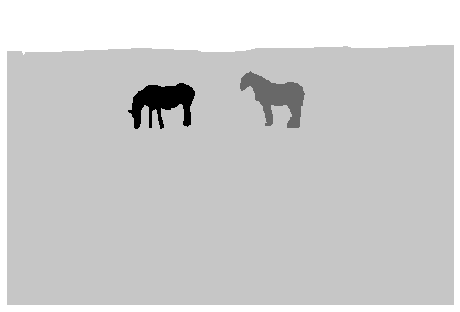

0.40767199226190404
for seg1


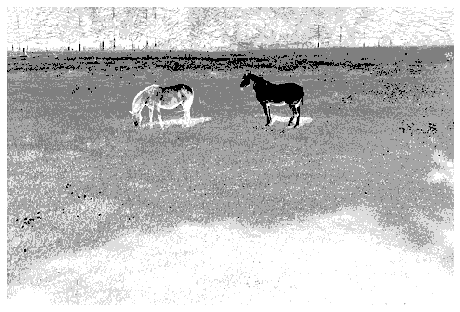

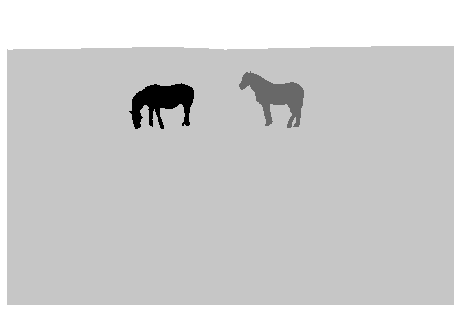

0.3963078056565397
for seg2


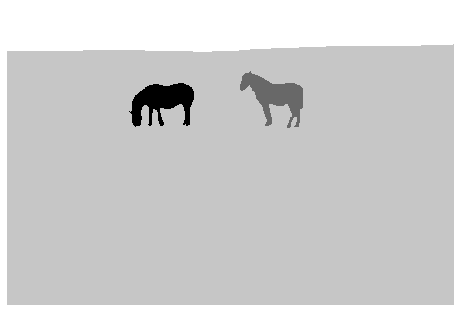

0.39861156954459903
for seg3


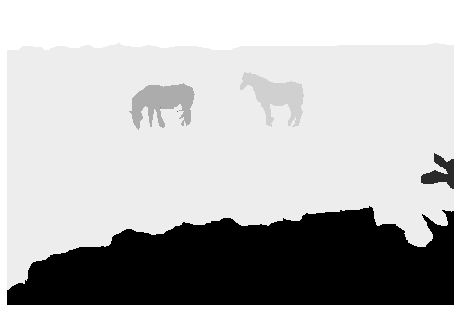

0.5238712210433599
for seg4


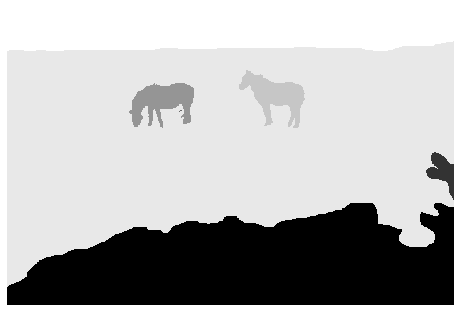

0.5441011480186287
for seg5


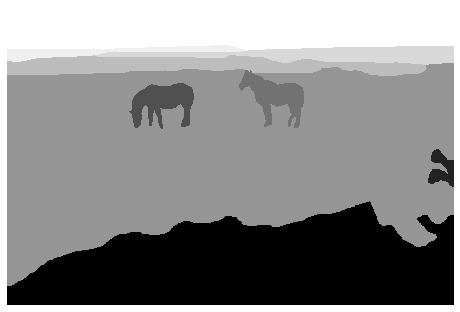

0.7628904064351075
averagee of image 126= 0.5055756904933565
for image127
for seg0


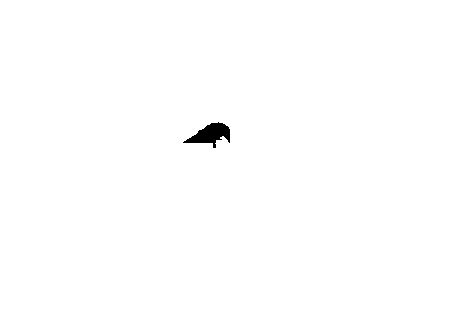

0.025725777322812084
for seg1


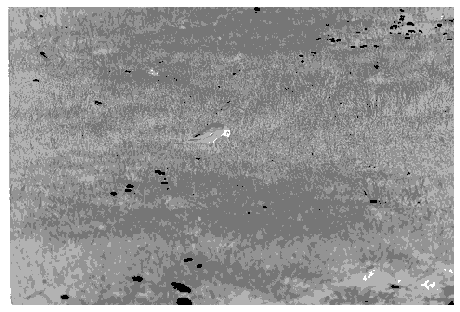

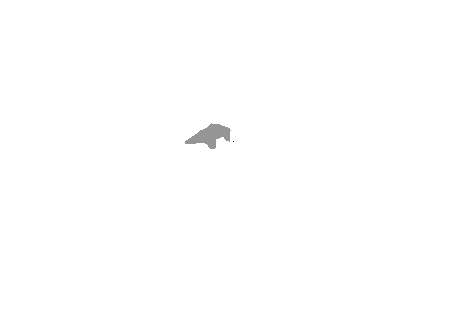

0.026423223429299203
for seg2


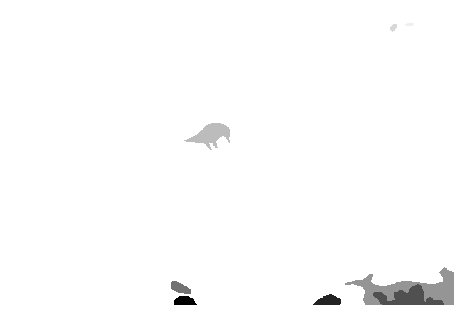

0.14000098771396094
for seg3


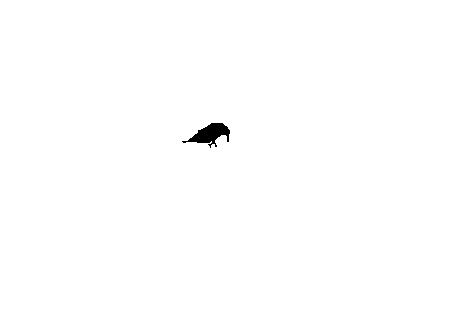

0.02376196397721414
for seg4


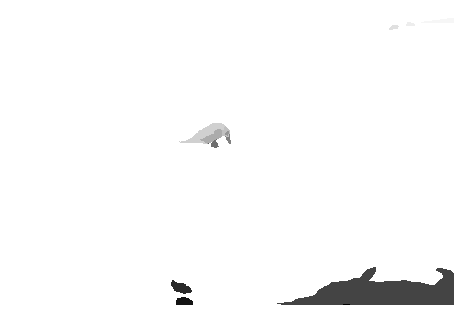

0.1635061550974229
averagee of image 127= 0.07588362150814185
for image128
for seg0


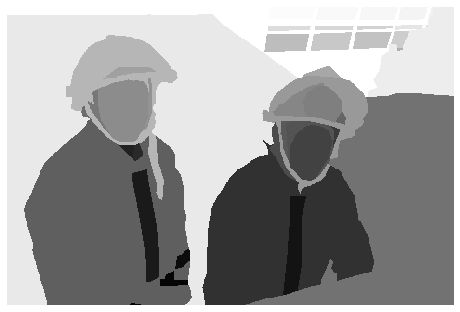

1.6643495294052721
for seg1


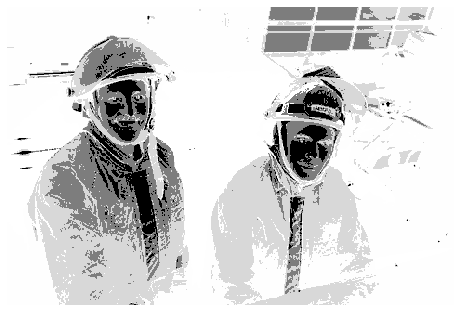

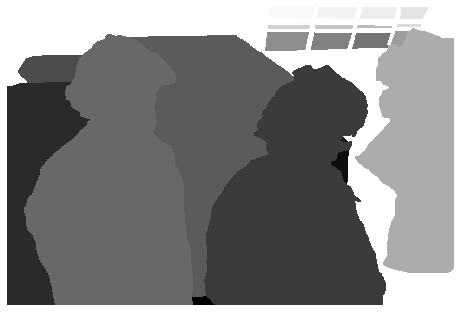

1.3481949980733785
for seg2


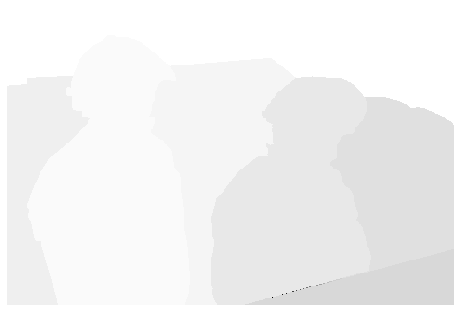

1.2635403317862395
for seg3


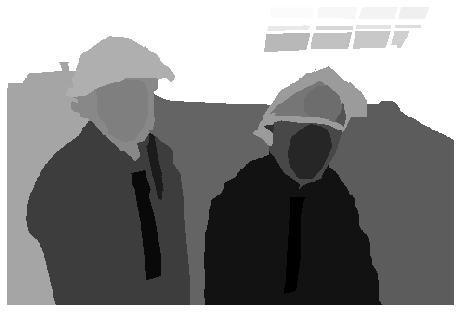

1.6704616857570618
for seg4


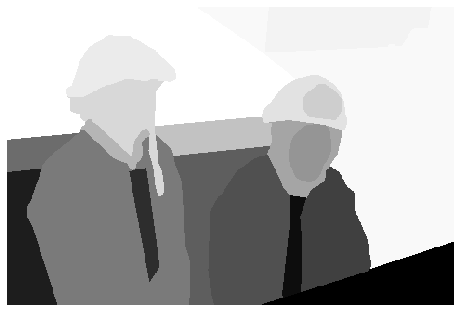

1.83878314625052
for seg5


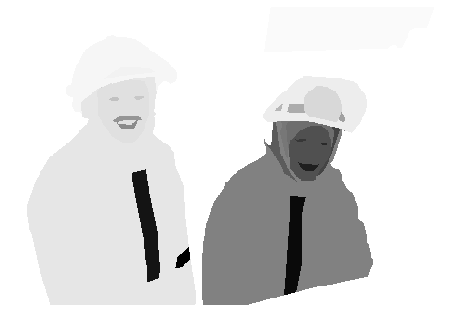

1.0808969569865614
averagee of image 128= 1.477704441376506
for image129
for seg0


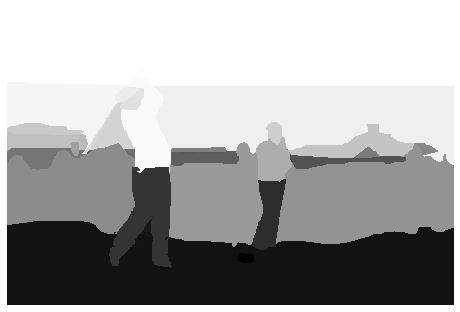

1.1583540090109326
for seg1


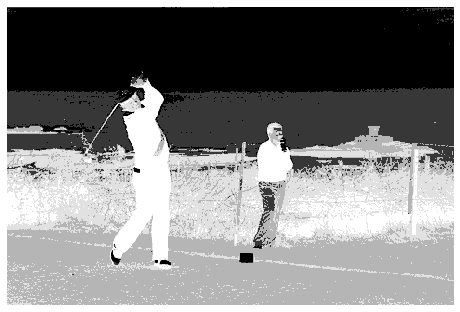

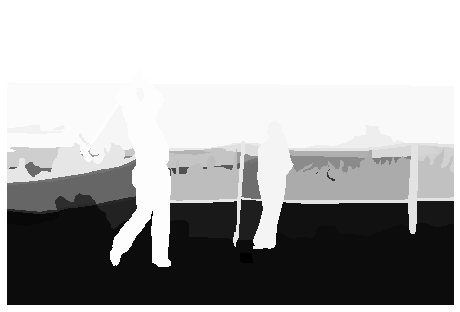

1.3594104812175696
for seg2


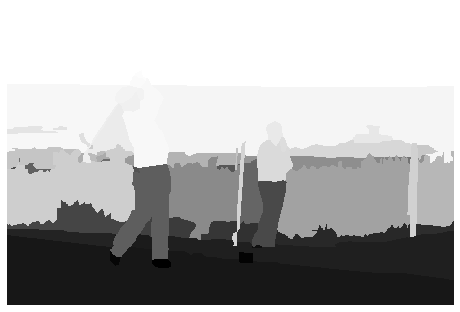

1.4882762702291892
for seg3


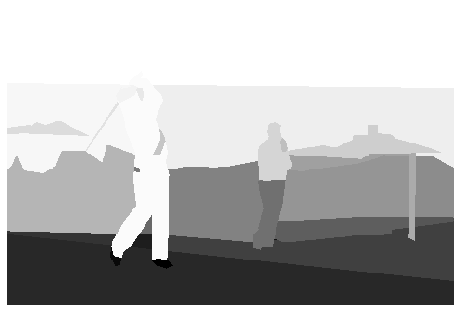

1.3071008629224097
for seg4


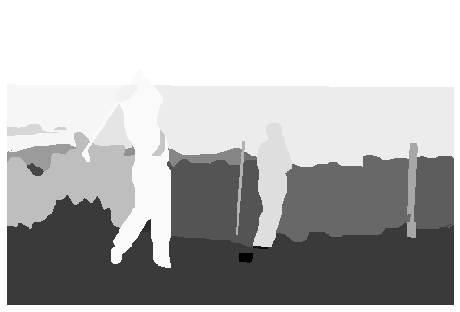

1.1005544503663411
averagee of image 129= 1.2827392147492884
for image130
for seg0


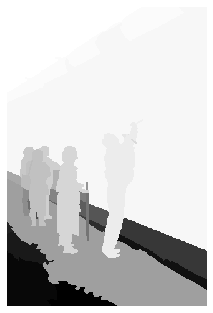

3.2044295178833635
for seg1


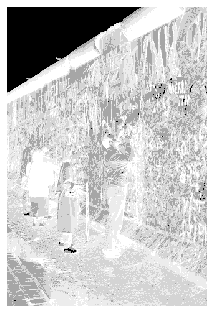

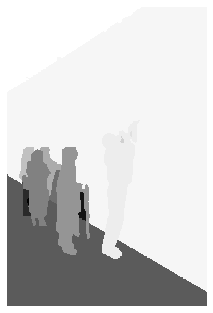

2.1245359611596784
for seg2


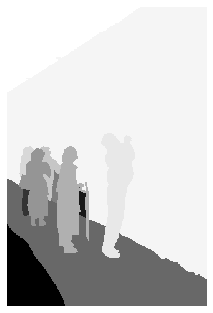

2.301113594701356
for seg3


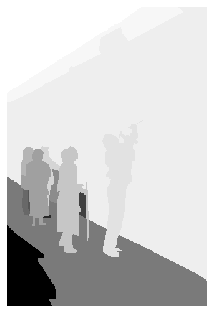

2.5516417318614266
for seg4


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 7.5K of output have been discarded. 

3.5394388334125146
averagee of image 130= 2.7442319278036678
for image131
for seg0


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 5.7K of output have been discarded. 

1.075208380332274
for seg1


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 77.8K of output have been discarded. 

1.072683161382637
for seg2


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 7K of output have been discarded. 

1.335937815346307
for seg3


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 5.9K of output have been discarded. 

1.0661307601188155
for seg4


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 6.7K of output have been discarded. 

1.3026999540477662
for seg5


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 8.2K of output have been discarded. 

1.466761324776282
for seg6


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 9.2K of output have been discarded. 

1.5470090367996148
for seg7


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 7.1K of output have been discarded. 

1.3637420099592408
averagee of image 131= 1.2787715553453671
for image132
for seg0


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 4.9K of output have been discarded. 

0.4604897784039162
for seg1


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 19.3K of output have been discarded. 

0.3728857808496916
for seg2


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 3.7K of output have been discarded. 

0.36658541814763324
for seg3


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 5.7K of output have been discarded. 

0.8373054133691685
for seg4


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 6.5K of output have been discarded. 

1.1141739700634383
averagee of image 132= 0.6302880721667696
for image133
for seg0


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 5.7K of output have been discarded. 

3.2293771954391524
for seg1


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 30.3K of output have been discarded. 

2.6470467856040067
for seg2


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 4.9M of output have been discarded. 

In [55]:
#conditional entropy
average_dataset=0
average=0
x=0
K=[5]
for k in K:
  print("for K =" + str(k))
  for image_name in sorted_img_files:
    print("for image"+str(x))
    path="BSR/BSDS500/data/images/train/"+image_name
    
    image_matrix=cv2.imread(path)
    imgs_clust_gre=images_to_seg([image_matrix],k)

    for j in range(len(images[x])):
      print("for seg"+str(j))
      if j==1:
        plt.imshow(imgs_clust_gre[0])  # the segmented i ouputed
        plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        plt.show()

      #do sth with ground truth
      groundTruth=images[x][j]
      plt.imshow(groundTruth)
      plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
      plt.show()

      total=0
      HC=0

      for i in range(len(np.unique(imgs_clust_gre[0]))):
        q=(np.where((imgs_clust_gre[0]==np.unique(imgs_clust_gre[0])[i])))
        s=[groundTruth[i,j] for i,j in zip(q[0],q[1])]
        unique_elements, counts_elements = np.unique(s, return_counts=True)
        count=np.sum(counts_elements)
        total=0
        for f in range (len(counts_elements)):
          C= -1*np.log2(counts_elements[f]/(count))*(counts_elements[f]/(count))
          total +=C

        HCi= total*(count/(len(groundTruth[0])*len(groundTruth[1])))
        HC+=HCi
      print(HC)
      average+=HC
    print("averagee of image "+str(x) + "= "+str(average/len(images[x]) ))
    average_dataset+=(average/len(images[x]))
    average=0
    x+= 1
  print("average per dataset = " + str(average_dataset/200))
  
  


# Using Normalized Cut

In [0]:
def norm_cut_seg(img,K):
  from skimage import segmentation, color
  from skimage.future import graph
  # 5 segments correspond to 5 clusters
  labels1 = segmentation.slic(img, compactness=30, n_segments=K)
  # Compute the Adjacency Graph
  g = graph.rag_mean_color(img, labels1, mode='similarity')
  labels2 = graph.cut_normalized(labels1, g)
  # reconstruct image using given clusters
  out2 = color.label2rgb(labels2, img, kind='avg')
  img_gray = rgb2gray(out2)
  return [img_gray]

In [29]:
'''Loop on every image and do f-measure for it with each of its ground truths for every K'''
i=0
K_number_=[5]

for image_name in sorted_img_files:
  path="BSR/BSDS500/data/images/train/"+image_name
  #the real image that you want:
  if i==5:
    break
  image_matrix=img.imread(path)
  
  print("For image number ",i)
  for j in range(len(images[i])):
    print("For segmentation number ",j)
    for k in K_number_: 
      print("For K == ",k)
      groundTruth=images[i][j]
      f_measure(image_matrix,groundTruth,k,False) # flag if true: use kmeans segmentation; else: use normalized cut segmentation
   
  i+=1

For image number  0
For segmentation number  0
For K ==  5
f-measure: 0.517889426154622
For segmentation number  1
For K ==  5
f-measure: 0.6130584077912961
For segmentation number  2
For K ==  5
f-measure: 0.5284018258309464
For segmentation number  3
For K ==  5
f-measure: 0.5184979115002982
For segmentation number  4
For K ==  5
f-measure: 0.4919713502340988
For segmentation number  5
For K ==  5
f-measure: 0.5044157979401248
For image number  1
For segmentation number  0
For K ==  5
f-measure: 0.7209100698733781
For segmentation number  1
For K ==  5
f-measure: 0.6278369901211566
For segmentation number  2
For K ==  5
f-measure: 0.631325254014439
For segmentation number  3
For K ==  5
f-measure: 0.6415868887790829
For segmentation number  4
For K ==  5
f-measure: 0.7413129766658312
For image number  2
For segmentation number  0
For K ==  5
f-measure: 0.6008508067533681
For segmentation number  1
For K ==  5
f-measure: 0.5959682693674688
For segmentation number  2
For K ==  5
f-meas